In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import pickle
import numpy
import re

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Data Understanding

## Загрузка и верхнеуровневое изучение


In [2]:
df = pd.read_csv('data/vehicles_dataset.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,NaN,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,NaN,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,NaN,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


In [3]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'price_category'],
      dtype='object')

In [4]:
df.describe()

,id,price,year,odometer,county,lat,long
count,1.005000e+04,1.005000e+04,10014.000000,1.000700e+04,0.0,9951.000000,9951.000000
mean,7.311544e+09,2.068429e+04,2010.917815,9.565719e+04,NaN,38.590164,-94.161564
std,4.475414e+06,1.243216e+05,9.697849,8.657948e+04,NaN,5.844756,18.123096
min,7.208550e+09,5.000000e+02,1915.000000,0.000000e+00,NaN,-67.144243,-158.069300
25%,7.308193e+09,7.900000e+03,2008.000000,3.899450e+04,NaN,34.830000,-110.447150
50%,7.312756e+09,1.574950e+04,2013.000000,8.837700e+04,NaN,39.285100,-87.999100
75%,7.315275e+09,2.799000e+04,2017.000000,1.370000e+05,NaN,42.427590,-80.830000
max,7.317090e+09,1.234568e+07,2022.000000,3.245000e+06,NaN,64.947500,173.885502


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10050 non-null  int64  
 1   url             10050 non-null  object 
 2   region          10050 non-null  object 
 3   region_url      10050 non-null  object 
 4   price           10050 non-null  int64  
 5   year            10014 non-null  float64
 6   manufacturer    9665 non-null   object 
 7   model           9921 non-null   object 
 8   condition       6268 non-null   object 
 9   cylinders       5953 non-null   object 
 10  fuel            9987 non-null   object 
 11  odometer        10007 non-null  float64
 12  title_status    9884 non-null   object 
 13  transmission    10005 non-null  object 
 14  VIN             6086 non-null   object 
 15  drive           7026 non-null   object 
 16  size            2825 non-null   object 
 17  type            7845 non-null  

In [6]:
df.shape

(10050, 27)

## Комментарии

Видим, что данные не готовы к моделированию:
 - многие столбцы содержат пропуски
 - многие столбцы имеют тип object, часть из них можно привести к более определенным типам или преобразовать в новые фичи
 - данные надо изучить детальнее и подготовить

# Data Preparation: EDA (explorary data analysis)

Посмотрим отдельные столбцы, в которых предполагаем качественные переменные с небольшим числом вариантов.

In [7]:
df.price_category.unique()  # целевая переменная, пустых значений нет.

array(['high', 'medium', 'low'], dtype=object)

In [8]:
df.transmission.unique()    # Здесь явно надо nan на other заменить. Или в дескрипшене найти данные.

array(['other', 'automatic', 'manual', nan], dtype=object)

In [9]:
df.title_status.unique()

array(['clean', nan, 'rebuilt', 'salvage', 'lien', 'missing',
       'parts only'], dtype=object)

In [10]:
df.fuel.unique()           # И здесь надо nan заменить на что-то. Как минимум на other, а лучше более конкретно.

array(['diesel', nan, 'gas', 'other', 'electric', 'hybrid'], dtype=object)

In [11]:
df.paint_color.unique() 

array(['silver', 'black', nan, 'white', 'blue', 'red', 'green', 'grey',
       'custom', 'orange', 'yellow', 'brown', 'purple'], dtype=object)

In [12]:
df.county.unique() 

array([nan])

In [13]:
df.drive.unique() 

array(['4wd', nan, 'fwd', 'rwd'], dtype=object)

In [14]:
df.VIN.nunique() 

5429

In [15]:
df.cylinders.unique() 

array([nan, '6 cylinders', '4 cylinders', '8 cylinders', '3 cylinders',
       '5 cylinders', 'other', '10 cylinders', '12 cylinders'],
      dtype=object)

In [16]:
df.condition.unique() 

array(['good', nan, 'new', 'excellent', 'like new', 'fair', 'salvage'],
      dtype=object)

In [17]:
df['size'].unique() 

array([nan, 'full-size', 'mid-size', 'sub-compact', 'compact'],
      dtype=object)

## Исследование переменных датасета

In [19]:
for col in df.columns:
    print("Характеристика: ", col)
    print("Количество значений: ", df[col].count())
    print("Количество уникальных значений: ", len(df[col].unique()))
    if len(df[col].unique()) < 100:
        print('Список значений:')
        print(df[col].value_counts())
   
    print('_________________________________')
    print('\n')

Характеристика:  id
Количество значений:  10050
Количество уникальных значений:  10000
_________________________________


Характеристика:  url
Количество значений:  10050
Количество уникальных значений:  10000
_________________________________


Характеристика:  region
Количество значений:  10050
Количество уникальных значений:  393
_________________________________


Характеристика:  region_url
Количество значений:  10050
Количество уникальных значений:  405
_________________________________


Характеристика:  price
Количество значений:  10050
Количество уникальных значений:  2227
_________________________________


Характеристика:  year
Количество значений:  10014
Количество уникальных значений:  90
Список значений:
2017.0    814
2018.0    814
2016.0    748
2013.0    704
2015.0    670
         ... 
1937.0      1
1935.0      1
1954.0      1
1915.0      1
1958.0      1
Name: year, Length: 89, dtype: int64
_________________________________


Характеристика:  manufacturer
Количество зна

In [20]:
# проверим целевую переменную: как в ней делятся значения по группам

for elem in df['price_category'].value_counts().keys():
    print('доля ',elem, ' - ', int(df['price_category'].value_counts()[elem])/len(df['price_category']), "%")

доля  high  -  0.3496517412935323 %
доля  medium  -  0.32776119402985077 %
доля  low  -  0.3225870646766169 %


In [ ]:
# видим выше дискретное равномерное (почти) распределение

## Data Cleaning

### Проверка дублей

In [21]:
# выше уже можно было заметить, что скорее всего есть дубли.
# идентификаторы есть повторяющиеся, и VIN-номера.
df.duplicated().sum()

50

In [22]:
df[df.duplicated()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
1326,7312641615,https://pueblo.craigslist.org/cto/d/pueblo-196...,pueblo,https://pueblo.craigslist.org,6500,1969.0,chevrolet,c10,good,8 cylinders,...,NaN,red,https://images.craigslist.org/00f0f_kmR1TNWM4O...,"1969 C10 runs and drives clean body, needs inn...",NaN,co,38.032300,-104.716000,2021-04-25T20:15:43-0600,low
2159,7312437164,https://yakima.craigslist.org/ctd/d/parker-201...,yakima,https://yakima.craigslist.org,19995,2015.0,subaru,xv crosstrek,NaN,4 cylinders,...,SUV,white,https://images.craigslist.org/01414_cBd43F8IeC...,2015 Subaru XV Crosstrek 2.0i Limited AWD 4dr ...,NaN,wa,46.553190,-120.475680,2021-04-25T11:30:27-0700,medium
2398,7316719393,https://miami.craigslist.org/mdc/ctd/d/miami-2...,south florida,https://miami.craigslist.org,25590,2018.0,volkswagen,golf gti s hatchback,good,NaN,...,sedan,blue,https://images.craigslist.org/00y0y_7qosBCrp0z...,Carvana is the safer way to buy a car During t...,NaN,fl,25.770000,-80.200000,2021-05-04T11:01:11-0400,high
3067,7307971804,https://redding.craigslist.org/ctd/d/sacrament...,redding,https://redding.craigslist.org,8800,2008.0,honda,accord,excellent,NaN,...,sedan,silver,https://images.craigslist.org/00S0S_kT52djO80H...,2008 *** Honda Accord EX L w/Navi 4dr Sedan 5A...,NaN,ca,38.608824,-121.400837,2021-04-16T15:01:16-0700,low
3236,7307083381,https://westernmass.craigslist.org/ctd/d/sprin...,western massachusetts,https://westernmass.craigslist.org,21990,2017.0,gmc,acadia sle-1 sport utility,good,NaN,...,SUV,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,ma,42.110000,-72.530000,2021-04-15T06:10:54-0400,medium


In [23]:
# Избавимся от дублей.

df = df.drop_duplicates()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    9618 non-null   object 
 7   model           9872 non-null   object 
 8   condition       6234 non-null   object 
 9   cylinders       5920 non-null   object 
 10  fuel            9937 non-null   object 
 11  odometer        9957 non-null   float64
 12  title_status    9834 non-null   object 
 13  transmission    9955 non-null   object 
 14  VIN             6062 non-null   object 
 15  drive           6994 non-null   object 
 16  size            2809 non-null   object 
 17  type            7806 non-null  

Дублей нет

In [25]:
df.duplicated().sum()

0

### Пропуски в данных

<AxesSubplot:>

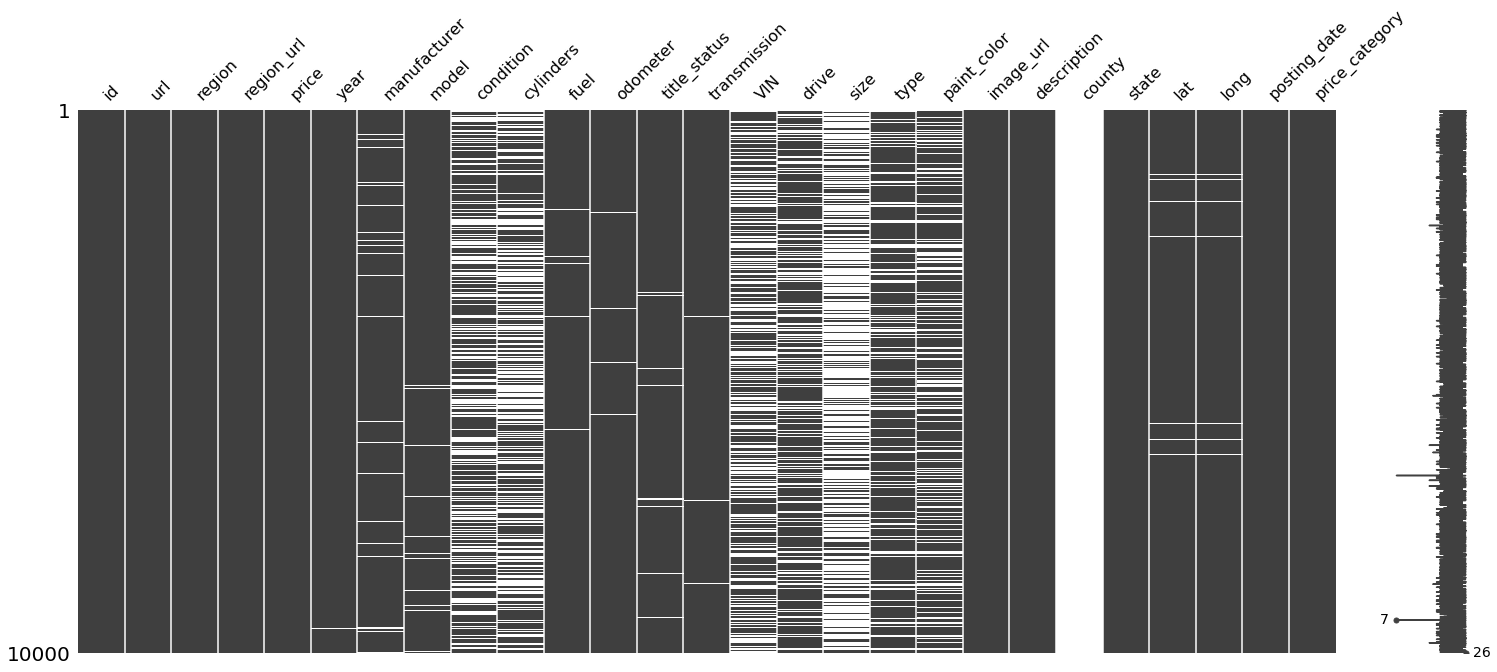

In [26]:
msno.matrix(df)

In [27]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', round(len(df.dropna()) / len(df) * 100, 2))

In [28]:
print_useful_rows_info(df)

Количество полностью заполненных объектов из всей выборки: 0
Процент полностью заполненных объектов из всей выборки: 0.0


In [29]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


county            100.00
size               71.91
cylinders          40.80
VIN                39.38
condition          37.66
drive              30.06
paint_color        29.50
type               21.94
manufacturer        3.82
title_status        1.66
model               1.28
long                0.98
lat                 0.98
fuel                0.63
transmission        0.45
odometer            0.43
year                0.36
posting_date        0.02
image_url           0.02
description         0.02
state               0.00
id                  0.00
url                 0.00
price               0.00
region_url          0.00
region              0.00
price_category      0.00
dtype: float64

In [30]:
missing_values[missing_values != 0]   # Выведем только те фичи, которые с пропусками

county          100.00
size             71.91
cylinders        40.80
VIN              39.38
condition        37.66
drive            30.06
paint_color      29.50
type             21.94
manufacturer      3.82
title_status      1.66
model             1.28
long              0.98
lat               0.98
fuel              0.63
transmission      0.45
odometer          0.43
year              0.36
posting_date      0.02
image_url         0.02
description       0.02
dtype: float64

In [31]:
df_new = df.copy()

#### Зададим полезные функции

In [32]:
# функция, которая проверяет значение на пустоту (пустое - тогда true)

def isnan(num):
    return num != num

In [33]:
# функция, которая для датафрейма и выбранного столбца проходит по пустым значениям и значениям типа other 
# и проверяет по заданному списку слов, нет ли этих слов в дескрипшене того же столбца. 

# Если найдены упоминания слов из указанного списка, то ставит в пустую ячейку (или вместо other) указанное значение.
# Если ничего не найдено - ставит other.
# На вход принимает датафрейм, название столбца, список слов для проверки их наличия в описании, значение, которое надо указать.

def find_this_param(df, column,  param_kinds, value):
    
    list_id = list(df[(df[column] == 'other')|(df[column]!=df[column])].index) #формированиe списка индексов для заполнения
    
    # print(len(list_id))
    

    count = 0
    filled = 0
    final = 'other'
    
    for i in list_id:
      
        for d in param_kinds:
            if str(df.loc[i, 'description']).lower().find(d) != -1:
                count +=1
            else:
                continue
        
        if count > 0:
            final = value #если нашлось упоминание, то значение этой строке надо будет присвоить конкретное
            filled +=1

        
        df.loc[i, column] = final
        
        count = 0
        final = 'other'
    
    return filled, len(df[df[column] == 'other']), len(df[df[column] == 'other'])/len(df)

#### Пропуски в поле county

In [34]:
df_new['county'].isna().sum()

10000

Такое поле можно просто выкинуть (еще и из эстетических соображений, т.к. в названии ошибка:))

In [35]:
df_new = df_new.drop(columns = ['county'])
df_new.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category'],
      dtype='object')

#### Пропуски в поле size

In [36]:
df_new['size'].isna().sum()

7191

In [37]:
df_new['size'].describe()

count          2809
unique            4
top       full-size
freq           1468
Name: size, dtype: object

In [38]:
df_new['size'].unique()

array([nan, 'full-size', 'mid-size', 'sub-compact', 'compact'],
      dtype=object)

In [39]:
df_new[df_new['size'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,NaN,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,NaN,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,NaN,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10043,7315504125,https://appleton.craigslist.org/ctd/d/fond-du-...,appleton-oshkosh-FDL,https://appleton.craigslist.org,8999,2013.0,dodge,grand caravan,excellent,NaN,...,NaN,mini-van,NaN,https://images.craigslist.org/00N0N_ZRZUujRLyf...,2013 Dodge Grand Caravan SE Mini-Van Drive i...,wi,43.790599,-88.446483,2021-05-01T16:01:36-0500,low
10044,7305898015,https://fayar.craigslist.org/ctd/d/lowell-2015...,fayetteville,https://fayar.craigslist.org,22900,2015.0,ram,1500,NaN,NaN,...,NaN,NaN,red,https://images.craigslist.org/00T0T_i51M7KG335...,2015 RAM Ram Pickup 1500 4X4... THIS RAM IS LO...,ar,36.255400,-94.130800,2021-04-12T17:15:35-0500,high
10047,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011.0,audi,a3 2.0t premium plus pzev,NaN,4 cylinders,...,NaN,wagon,black,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,low
10048,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015.0,porsche,cayenne,good,6 cylinders,...,NaN,wagon,brown,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,high


In [40]:
# Есть гипотеза, что возможно получится size заполнить с помощью поля Type.
# Если для одного type - всегда одинаковый size, то это может сгодиться. Проверим:

df_new[df_new['type'] == 'pickup']['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact'], dtype=object)

In [41]:
find_this_param(df_new, 'size', ['full-size', 'fullsize', 'full size', 'size:full', 'size: full'], 'full-size')

(139, 7052, 0.7052)

In [42]:
# выше указано после отработки ячейки,  удалось заполнить 139, осталось 70% пустых (other) - это 7052 элемента.
# проделаем то же самое для других значений size и если получится сильно сократить пропуски, то возможно сохраним эту фичу.

find_this_param(df_new, 
                'size', 
                ['mid-size', 'midsize', 'mid size', 'size:mid', 'size: mid', 'midle-size', 'middle-size', 'middle size',
                'midle size'], 
                'mid-size')

(169, 6883, 0.6883)

In [43]:
#  69% пустых, плохо, проверим компакт и далее решим

find_this_param(df_new, 
                'size', 
                [' compact', 'size:comp', ], 
                'compact')

(145, 6738, 0.6738)

In [44]:
# Нет, не годится такое поле. Придется удалять. Мало данных.

df_new = df_new.drop(columns = ['size'])
df_new.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'type', 'paint_color', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_date',
       'price_category'],
      dtype='object')

#### Пропуски в поле title_status

In [45]:
df_new['title_status'].isna().sum()

166

In [46]:
df_new['title_status'].describe()

count      9834
unique        6
top       clean
freq       9518
Name: title_status, dtype: object

<AxesSubplot:>

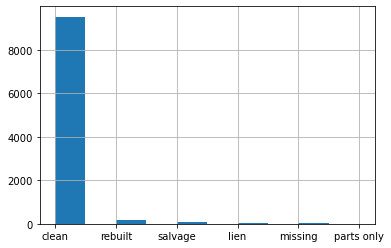

In [47]:
df_new['title_status'].hist()

In [48]:
# Посмотрим записи без статуса:

df_new[df_new['title_status'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
11,7316540706,https://cincinnati.craigslist.org/ctd/d/fairfi...,cincinnati,https://cincinnati.craigslist.org,4995,2012.0,fiat,500 pop,excellent,4 cylinders,...,NaN,hatchback,NaN,https://images.craigslist.org/00Z0Z_jbUmVcYlwR...,"2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ...",oh,39.297045,-84.563243,2021-05-03T21:03:32-0400,low
187,7313570594,https://orangecounty.craigslist.org/ctd/d/coro...,orange county,https://orangecounty.craigslist.org,17900,2013.0,ram,1500 tradesman quad cab,excellent,8 cylinders,...,NaN,truck,NaN,https://images.craigslist.org/00H0H_1JFMPCYyW8...,2013 Ram 1500 Tradesman Quad Cab PRICED TO SEL...,ca,33.873436,-117.542806,2021-04-27T15:03:47-0700,medium
245,7315211652,https://ocala.craigslist.org/ctd/d/riverview-2...,ocala,https://ocala.craigslist.org,40990,2019.0,toyota,sienna xle,excellent,6 cylinders,...,NaN,van,NaN,https://images.craigslist.org/01111_grKNF8GrXz...,2019 Toyota Sienna - Wheelchair Accessible Han...,fl,27.849760,-82.364950,2021-05-01T06:35:56-0400,high
286,7306702976,https://toledo.craigslist.org/ctd/d/chelsea-73...,toledo,https://toledo.craigslist.org,4592,2003.0,chevrolet,avalanche 1500,excellent,8 cylinders,...,4wd,truck,NaN,https://images.craigslist.org/00808_1IOMJuA4GL...,$73/mo - 2003 Chevrolet Avalanche 1500 BaseCre...,oh,42.300673,-84.024108,2021-04-14T12:03:01-0400,low
312,7307609203,https://roseburg.craigslist.org/ctd/d/eugene-2...,roseburg,https://roseburg.craigslist.org,18450,2017.0,ford,mustang,NaN,NaN,...,rwd,NaN,grey,https://images.craigslist.org/00505_4apF36sLbP...,"2017 Ford MUSTANG - $18,450 \tMayberry Motors ...",or,44.058499,-123.106176,2021-04-16T04:06:29-0700,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,7301707830,https://tricities.craigslist.org/ctd/d/bristol...,tri-cities,https://tricities.craigslist.org,8995,2013.0,honda,odyssey,NaN,6 cylinders,...,fwd,van,silver,https://images.craigslist.org/00u0u_bawW7HN8xW...,"2013 *Honda* *Odyssey* 5dr EX Van FWD - $8,995...",tn,36.541821,-82.234645,2021-04-04T13:12:27-0400,low
9851,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012.0,honda,accord,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,41.261540,-78.704520,2021-04-28T14:25:32-0400,low
9887,7314987181,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,20900,2014.0,lexus,rx 350,NaN,6 cylinders,...,fwd,SUV,NaN,https://images.craigslist.org/00Q0Q_cGablAkoYV...,2014 *Lexus* *RX 350* 2014 LEXUS RX 350 SUV 1-...,tn,36.138022,-86.732261,2021-04-30T15:00:48-0500,medium
9903,7309717260,https://savannah.craigslist.org/ctd/d/jacksonv...,savannah / hinesville,https://savannah.craigslist.org,11495,2006.0,lexus,gx 470,NaN,8 cylinders,...,NaN,SUV,white,https://images.craigslist.org/00s0s_8xg4gw6aAg...,"2006 *Lexus* *GX 470* 4dr SUV 4WD - $11,495By ...",ga,30.513566,-81.621875,2021-04-20T08:01:49-0400,medium


In [49]:
# Судя по гистограмме, можно заполнить пропуски самым популярным значением:

m = df_new.title_status.mode()[0]
m

'clean'

In [50]:
df_new.title_status = df_new.title_status.fillna(m)
df_new.title_status.describe()

count     10000
unique        6
top       clean
freq       9684
Name: title_status, dtype: object

In [51]:
print("Количество пропущенных значений в title_status:", df_new.title_status.isna().sum())

Количество пропущенных значений в title_status: 0


Пропуски заполнены самым популярным значением

#### Пропуски в поле model

In [52]:
df_new.model.value_counts(dropna = False)

f-150                        151
NaN                          128
silverado 1500               110
1500                         100
camry                         77
                            ... 
grand caravan sport            1
Nascar                         1
titan le                       1
sorrento lx v6                 1
a3 2.0t premium plus pzev      1
Name: model, Length: 3467, dtype: int64

In [53]:
df_new.model.describe()

count      9872
unique     3466
top       f-150
freq        151
Name: model, dtype: object

In [54]:
# Посмотрим записи, в которых не указана модель
df_new[df_new.model.isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005.0,rover,NaN,fair,8 cylinders,...,4wd,SUV,grey,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04T13:11:15-0700,low
142,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006.0,jeep,NaN,like new,6 cylinders,...,4wd,NaN,brown,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03T20:33:40-0500,low
151,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007.0,gmc,NaN,NaN,8 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08T09:10:07-0400,low
200,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012.0,ram,NaN,NaN,NaN,...,fwd,pickup,green,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01T10:05:17-0400,medium
251,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007.0,ram,NaN,NaN,NaN,...,4wd,pickup,red,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02T21:06:09-0400,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,7314341390,https://desmoines.craigslist.org/cto/d/urbanda...,des moines,https://desmoines.craigslist.org,8000,2007.0,toyota,NaN,good,4 cylinders,...,rwd,sedan,green,https://images.craigslist.org/00K0K_aMoJgOIueB...,Toyota has been owned by non smoker with no pe...,ia,41.629500,-93.723000,2021-04-29T10:50:54-0500,low
9659,7304358131,https://vermont.craigslist.org/ctd/d/salem-201...,vermont,https://vermont.craigslist.org,19944,2012.0,ram,NaN,NaN,NaN,...,4wd,pickup,white,https://images.craigslist.org/00A0A_bfCaGJ20IX...,2012 RAM 1500 4WD REGULAR CAB SHORT BED 5.7 HE...,vt,42.788204,-71.233728,2021-04-09T16:24:23-0400,medium
9714,7309686008,https://louisville.craigslist.org/cto/d/radcli...,louisville,https://louisville.craigslist.org,1600,2005.0,gmc,NaN,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/01111_99unV6cYER...,GMC Savana PRO AWD cargo van has been driven l...,ky,37.858900,-86.006900,2021-04-20T04:48:30-0400,low
9974,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017.0,rover,NaN,like new,8 cylinders,...,4wd,SUV,silver,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high


In [55]:
df_new.model.nunique()

3466

In [56]:
df_new.model.unique()

array(['2500 crew cab big horn', 'explorer 4wd 4dr xlt',
       'golf r hatchback', ..., 'navigator reserve', '1988 Nisan',
       'a3 2.0t premium plus pzev'], dtype=object)

In [62]:
# попробуем заполнить хотя бы часть значений моделей, если они упоминаются в описании авто.
df_new1 = df_new.copy()
for mod in list(df_new1.model.unique()):
    find_this_param(df_new1, 'model', [str(mod)], str(mod))
df_new1.model.isna().sum()

0

In [58]:
df_new1.model.value_counts(dropna = False)

f-150                        152
silverado 1500               110
1500                         100
camry                         77
silverado                     74
                            ... 
Nascar                         1
titan le                       1
sorrento lx v6                 1
sierra1500 crewcab 4x4         1
a3 2.0t premium plus pzev      1
Name: model, Length: 3467, dtype: int64

In [60]:
df_new1[df_new1.model == 'other'] 

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,image_url,description,state,lat,long,posting_date,price_category


среди авто без указания моделей - в их описаниях - удалось найти упоминания моделей из числа тех, которые были.
Даже ни одного other не понадобилось.

In [63]:
df_new = df_new1.copy()

In [64]:
print("Количество пропущенных значений в model:", df_new.model.isna().sum())

Количество пропущенных значений в model: 0


#### Пропуски в поле long

In [65]:
df_new.long.value_counts(dropna = False)

 NaN          98
-84.112200    88
-84.411811    79
-74.281707    73
-84.445400    54
              ..
-82.527995     1
-97.031100     1
-85.806306     1
-78.625588     1
-79.189500     1
Name: long, Length: 5083, dtype: int64

In [66]:
df_new.long.describe()

count    9902.000000
mean      -94.165877
std        18.128504
min      -158.069300
25%      -110.322086
50%       -88.000050
75%       -80.830000
max       173.885502
Name: long, dtype: float64

Чтобы заполнить пропуски по долготе, используем поле region:
 - в нем нет пропусков
 - это регион, который имеет определенные географические параметры (диапазоны долготы и широты)
Можно для отсутствующей долготы взять среднее из других записей, где был указан тот же регион.
Аналогично, потом то же самое для широты сделаем.

In [67]:
df_new['long'].isna().sum()

98

In [68]:
df_new['long_mean_reg'] = df_new.groupby('region')['long'].transform('mean')
df_new          # добавили новый столбец, который все значения берет средними по региону. 


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,state,lat,long,posting_date,price_category,long_mean_reg
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,-85.011877
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,-74.264003
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,-115.224189
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,-85.740417
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,-73.880077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002.0,toyota,rav4,good,4 cylinders,...,SUV,white,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,low,-79.472663
10046,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008.0,jeep,wrangler,good,6 cylinders,...,SUV,grey,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,medium,-76.044318
10047,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011.0,audi,a3 2.0t premium plus pzev,NaN,4 cylinders,...,wagon,black,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,low,-121.659780
10048,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015.0,porsche,cayenne,good,6 cylinders,...,wagon,brown,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,high,-89.452802


In [69]:
df_new[df_new.region == 'chattanooga'].long.mean()  #проверка, что новый столбец верно считает среднее по региону

-85.011877

In [39]:
# Заведем еще один столбец в df_new, куда будем либо правильную долготу ставить, либо среднюю по региону.

In [70]:
df_new['long_filled'] = df_new.apply(lambda x: x.long_mean_reg if isnan(x.long) else x.long, axis = 1)

In [122]:
#Проверим как заполнился столбец long_filled для строк с данными long и без них:

In [71]:
df_new[df_new['long'].isna() == False].head(2) 

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,paint_color,image_url,description,state,lat,long,posting_date,price_category,long_mean_reg,long_filled
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,-85.011877,-85.250000
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,-74.264003,-74.061962


In [72]:
df_new[df_new['long'].isna()].head(2)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,paint_color,image_url,description,state,lat,long,posting_date,price_category,long_mean_reg,long_filled
118,7312692841,https://tricities.craigslist.org/ctd/d/bmw-ser...,tri-cities,https://tricities.craigslist.org,17998,2012.0,bmw,5 series,NaN,6 cylinders,...,grey,https://images.craigslist.org/00909_57Xyuj8AJH...,2012 BMW 5 Series 535i M Sport Heat & Cool Sea...,tn,NaN,NaN,2021-04-26T04:28:35-0400,medium,-81.906201,-81.906201
126,7315526339,https://newjersey.craigslist.org/ctd/d/look-wh...,north jersey,https://newjersey.craigslist.org,22995,2014.0,bmw,7 series,excellent,8 cylinders,...,silver,https://images.craigslist.org/00k0k_38TNTakyUf...,2014 BMW 7 Series 4dr Sdn 750Li xDrive AWD Aut...,nj,NaN,NaN,2021-05-01T17:49:09-0400,high,-74.264003,-74.264003


In [73]:
# Теперь можно удалить ненужные столбцы:

df_new.drop(columns = ['long', 'long_mean_reg'], axis = 1, inplace=True)
df_new.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,image_url,description,state,lat,posting_date,price_category,long_filled
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,4wd,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,2021-04-17T12:30:50-0400,high,-85.250000
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,4wd,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,2021-05-03T15:40:21-0400,medium,-74.061962
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,2021-04-28T03:52:20-0700,high,-84.411811
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,fwd,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,2021-04-17T10:08:57-0400,medium,-78.655304
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,2021-05-03T18:32:06-0400,medium,-73.609700


Пропуски в поле long (long_filled) заполнены средними по штатам значениями.

#### Пропуски в поле lat

Действуем в точности так же, как и в предыдущем пункте. Используем полностью заполненное поле state для поиска средних по региону, чтобы ими заполнить пропуски там, где требуется.

In [74]:
df_new.lat.value_counts(dropna = False)

NaN          98
43.182400    88
33.779214    79
40.468785    73
33.786500    54
             ..
33.640251     1
39.942263     1
34.299800     1
44.472801     1
42.123900     1
Name: lat, Length: 5050, dtype: int64

In [75]:
df_new.lat.describe()

count    9902.000000
mean       38.594142
std         5.844895
min       -67.144243
25%        34.830368
50%        39.298522
75%        42.428070
max        64.947500
Name: lat, dtype: float64

In [76]:
df_new['lat_mean_reg'] = df_new.groupby('region')['lat'].transform('mean')
df_new  

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,state,lat,posting_date,price_category,long_filled,lat_mean_reg
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,2021-04-17T12:30:50-0400,high,-85.250000,34.965274
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,2021-05-03T15:40:21-0400,medium,-74.061962,40.708466
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,2021-04-28T03:52:20-0700,high,-84.411811,38.384457
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,2021-04-17T10:08:57-0400,medium,-78.655304,36.019039
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,2021-05-03T18:32:06-0400,medium,-73.609700,40.747136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002.0,toyota,rav4,good,4 cylinders,...,SUV,white,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,2021-04-10T16:33:57-0400,low,-79.189500,42.186618
10046,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008.0,jeep,wrangler,good,6 cylinders,...,SUV,grey,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,2021-05-03T09:36:30-0400,medium,-77.755610,42.103909
10047,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011.0,audi,a3 2.0t premium plus pzev,NaN,4 cylinders,...,wagon,black,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,2021-04-22T12:14:01-0700,low,-122.982753,44.587087
10048,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015.0,porsche,cayenne,good,6 cylinders,...,wagon,brown,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,2021-04-14T09:14:42-0500,high,-89.397796,43.244410


In [77]:
df_new['lat_filled'] = df_new.apply(lambda x: x.lat_mean_reg if isnan(x.lat) else x.lat, axis = 1)

In [78]:
df_new[df_new['lat'].isna() == False].head(2) 

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,paint_color,image_url,description,state,lat,posting_date,price_category,long_filled,lat_mean_reg,lat_filled
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,2021-04-17T12:30:50-0400,high,-85.250000,34.965274,35.060000
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,2021-05-03T15:40:21-0400,medium,-74.061962,40.708466,40.821805


In [79]:
df_new[df_new['lat'].isna()].head(2) 

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,paint_color,image_url,description,state,lat,posting_date,price_category,long_filled,lat_mean_reg,lat_filled
118,7312692841,https://tricities.craigslist.org/ctd/d/bmw-ser...,tri-cities,https://tricities.craigslist.org,17998,2012.0,bmw,5 series,NaN,6 cylinders,...,grey,https://images.craigslist.org/00909_57Xyuj8AJH...,2012 BMW 5 Series 535i M Sport Heat & Cool Sea...,tn,NaN,2021-04-26T04:28:35-0400,medium,-81.906201,36.386069,36.386069
126,7315526339,https://newjersey.craigslist.org/ctd/d/look-wh...,north jersey,https://newjersey.craigslist.org,22995,2014.0,bmw,7 series,excellent,8 cylinders,...,silver,https://images.craigslist.org/00k0k_38TNTakyUf...,2014 BMW 7 Series 4dr Sdn 750Li xDrive AWD Aut...,nj,NaN,2021-05-01T17:49:09-0400,high,-74.264003,40.708466,40.708466


In [80]:
# Видим, что новый столбец lat_filled заполнился корректно (либо реальной широтой, либо средней по региону)
# Удалим лишние столбцы.

df_new.drop(columns = ['lat', 'lat_mean_reg'], axis = 1, inplace=True)
df_new.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,image_url,description,state,posting_date,price_category,long_filled,lat_filled
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,4wd,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,2021-04-17T12:30:50-0400,high,-85.250000,35.060000
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,4wd,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,2021-05-03T15:40:21-0400,medium,-74.061962,40.821805
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,2021-04-28T03:52:20-0700,high,-84.411811,33.779214
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,fwd,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,2021-04-17T10:08:57-0400,medium,-78.655304,35.715954
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,2021-05-03T18:32:06-0400,medium,-73.609700,40.654800


Пропуски в поле lat (lat_filled) заполнены средними по штатам значениями.

#### Пропуски в поле fuel

In [81]:
df_new.fuel.value_counts(dropna = False)

gas         8402
other        730
diesel       653
hybrid       108
NaN           63
electric      44
Name: fuel, dtype: int64

In [82]:
df_new.fuel.describe()

count     9937
unique       5
top        gas
freq      8402
Name: fuel, dtype: object

<AxesSubplot:>

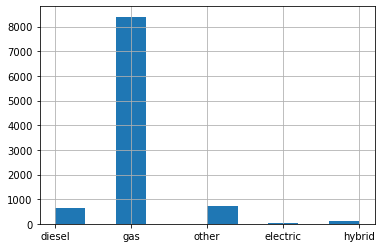

In [83]:
# посмотрим, какое распределение значений в этом поле:

df_new.fuel.hist()

In [84]:
#Посмотрим на те строки, где fuel не заполнено:

df_new[df_new.fuel.isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,image_url,description,state,posting_date,price_category,long_filled,lat_filled
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,4wd,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,2021-05-03T15:40:21-0400,medium,-74.061962,40.821805
32,7309910590,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,4977,2001.0,toyota,camry solara 2dr cpe se v6 auto (natl),NaN,6 cylinders,...,fwd,coupe,silver,https://images.craigslist.org/00F0F_ebtJlxCQjv...,***Call Us for more information at: 541-228-94...,or,2021-04-20T10:40:15-0700,low,-123.150156,44.076513
78,7314559074,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,27977,2009.0,ford,"f-150 4wd supercrew 145"" platinum",NaN,8 cylinders,...,4wd,pickup,white,https://images.craigslist.org/00L0L_khoMmqXaSJ...,***Call Us for more information at: 541-228-94...,or,2021-04-29T15:15:30-0700,high,-123.150156,44.076513
275,7315141987,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29888,2019.0,nissan,frontier crew cab 4x2 sv auto,NaN,NaN,...,rwd,NaN,white,https://images.craigslist.org/00F0F_d9wEXQuSyu...,***Call Us for more information at: 877-262-34...,hi,2021-04-30T15:50:19-1000,high,-157.896975,21.344376
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,NaN,Grand Caravan,NaN,6 cylinders,...,fwd,NaN,grey,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,2021-05-02T01:11:33-0600,high,-104.998604,39.674406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,wa,NaN,medium,-122.400579,48.275145
9488,7309365699,https://fortmyers.craigslist.org/chl/ctd/d/bra...,ft myers / SW florida,https://fortmyers.craigslist.org,14997,2010.0,ford,e-350,NaN,8 cylinders,...,rwd,van,white,https://images.craigslist.org/00606_hQvq6K6D4p...,"2010 *Ford* *E-350* 12 Passenger Van - $14,997...",fl,2021-04-19T14:01:14-0400,medium,-82.571497,27.479823
9679,7313475467,https://eugene.craigslist.org/ctd/d/eugene-201...,eugene,https://eugene.craigslist.org,9979,2012.0,chevrolet,equinox awd 4dr lt w/1lt,NaN,4 cylinders,...,NaN,SUV,silver,https://images.craigslist.org/00q0q_haS6HKqYq4...,***Call Us for more information at: 541-228-94...,or,2021-04-27T12:10:24-0700,medium,-123.150156,44.076513
9851,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012.0,honda,accord,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,2021-04-28T14:25:32-0400,low,-78.704520,41.261540


Заполним пустые значения поля fuel значениями, которые получится найти в описаниях, либо other. Т.к. если заполнять самым популярным - большая вероятность ошибиться. Доля менее популярных значений все же весьма высока (в отличие от ситуации в поле title status)

функция ниже заполнит все other, а что возможно заполнит более конкретными значениями. Прогоним ее для каждого типа топлива.

In [85]:
find_this_param(df_new, 'fuel', ['fuel:hybrid', 'fuel: hybrid', 'hybrid fuel', ' hybrid'], 'hybrid')

(16, 777, 0.0777)

In [86]:
find_this_param(df_new, 'fuel', [' gas', '.gas', ':gas'], 'gas')

(52, 725, 0.0725)

In [87]:
find_this_param(df_new, 'fuel', [' diesel', '.diesel', ':diesel'], 'diesel')

(56, 669, 0.0669)

In [88]:
find_this_param(df_new, 'fuel', ['fuel electric', 'fuel:electr', 'fuel: electr', 'electric fuel'], 'electric')

(0, 669, 0.0669)

In [89]:
# у нас было 730 other и 63 nan. Осталось 669 other. Уточнили датафрейм по топливу.
df_new.fuel.describe()

count     10000
unique        5
top         gas
freq       8454
Name: fuel, dtype: object

<AxesSubplot:>

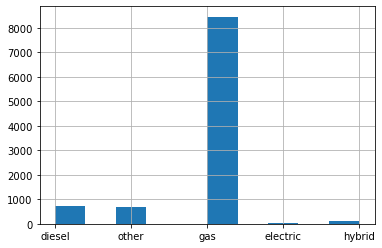

In [90]:
df_new.fuel.hist()

In [91]:
print("Количество пропущенных значений в fuel:", df_new.fuel.isna().sum())

Количество пропущенных значений в fuel: 0


#### Пропуски в поле transmission

Сначала подробно посмотрим на поле:

In [92]:
df_new['transmission'].isna().sum()

45

In [93]:
df_new['transmission'].describe()

count          9955
unique            3
top       automatic
freq           7700
Name: transmission, dtype: object

In [94]:
df_new['transmission'].value_counts()

automatic    7700
other        1624
manual        631
Name: transmission, dtype: int64

<AxesSubplot:>

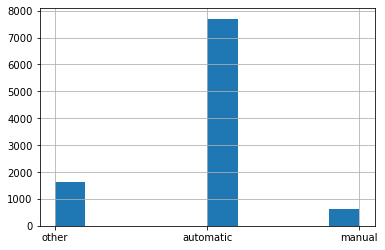

In [95]:
df_new['transmission'].hist()

In [96]:
# Т.к. в распределении заметную долю занимает неопределенное значение other, 
# заполним им же и пропущенные значения, которых всего 45шт.

df_new.transmission = df_new.transmission.fillna('other')
df_new.transmission.describe()

count         10000
unique            3
top       automatic
freq           7700
Name: transmission, dtype: object

In [97]:
# Предпримем все же попытку уточнить эти данные (other):

find_this_param(df_new, 
                'transmission', 
                ['manual transm', 'transmission:manual', 'transmission man', 'transmission: manu', 'manual transm'], 
                'manual')

(29, 1640, 0.164)

In [98]:
find_this_param(df_new, 
                'transmission', 
                ['automatic transm', 'transmission:auto', 'transmission auto', 'transmission: auto', 'automatic transm', 'autotransm'], 
                'automatic')

(153, 1487, 0.1487)

In [100]:
# распознали 182 непонятных коробки передач, и пустые заполнили. 14% - other.
print("Количество пропущенных значений в transmission:", df_new.transmission.isna().sum())

Количество пропущенных значений в transmission: 0


#### Пропуски в поле year

Сначала подробно посмотрим на поле:

In [101]:
df_new['year'].isna().sum()

36

In [102]:
df_new['year'].describe()

count    9964.000000
mean     2010.927941
std         9.672040
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

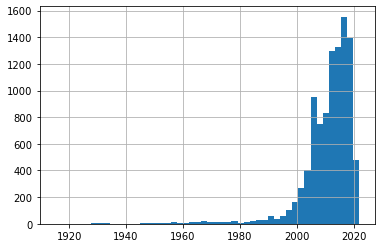

In [158]:
df_new['year'].hist(bins = 50);

In [103]:
df[df_new['year'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,NaN,500,NaN,8 cylinders,...,pickup,white,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,NaN,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,NaN,Super Duty F-350 SRW,NaN,8 cylinders,...,pickup,grey,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,NaN,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,NaN,Grand Caravan,NaN,6 cylinders,...,NaN,grey,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",NaN,co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,NaN,olet Silverado 1500,NaN,4 cylinders,...,pickup,grey,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,NaN,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,NaN,F-150,NaN,6 cylinders,...,pickup,grey,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",NaN,co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high
906,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,67900,NaN,NaN,Odyssey,NaN,6 cylinders,...,van,white,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,NaN,co,39.674406,-104.998604,2021-04-24T10:41:06-0600,high
1005,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,38900,NaN,NaN,Grand Caravan,NaN,6 cylinders,...,NaN,blue,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",NaN,co,39.674406,-104.998604,2021-04-14T10:51:36-0600,high
1217,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,24975,NaN,NaN,CR-V,NaN,4 cylinders,...,SUV,silver,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",NaN,fl,29.676827,-82.319202,2021-04-20T14:46:55-0400,high
1319,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,47900,NaN,NaN,a Sienna,NaN,6 cylinders,...,van,grey,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,NaN,co,39.674406,-104.998604,2021-04-28T10:12:14-0600,high
1846,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,35850,NaN,NaN,Transit Cargo Van,NaN,6 cylinders,...,NaN,white,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",NaN,fl,29.046240,-80.934561,2021-04-07T17:10:06-0400,high


In [104]:
# Видим выше, что очень у многих автомобилей год указан в описании. 
# Посмотрим подробнее на описания, поймем, сколько из них позволят заполнить год, а сколько останется.

df_new[df_new['year'].isna()]['description']

344      2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...
420      2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...
425      2019 *Dodge* *Grand Caravan* SE - $43,900Call ...
702      2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...
893      2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...
906      2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...
1005     2019 *Dodge* *Grand Caravan* SE - $38,900Call ...
1217     2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...
1319     2018 *Toyota* *Sienna* LE Automatic Access Sea...
1846     2020 *Ford* *Transit Cargo Van* T-250 148" WB*...
2294     2019 *Toyota* *Camry* XSE Automatic Sedan - $2...
2507     2019 *Dodge* *Grand Caravan* SE - $43,900Call ...
2632     Chevrolet Impala  * AUCTION PRICES TO THE PUBL...
2822     2019 *GMC* *Acadia* AWD 4dr SLT w/SLT-1 SUV - ...
2962     2018 *Nissan* *Maxima* SR 3.5L Midnight Editio...
3299     2018 *Jeep* *Grand Cherokee* High Altitude 4x2...
3515     2020 *Ram* *3500* RAM 3500 DUALLY 4X4 CUMMINS .

In [105]:
# Видим, что всего 3 объявления не имеют в описании указание года вначале. С ними потом отдельно поработаем.

zerolist = []
descripted_list = []
for i in df_new[df_new['year'].isna()]['description'].keys():
    if (str(df_new[df_new['year'].isna()]['description'][i])[:1] == '2') or \
    (str(df_new[df_new['year'].isna()]['description'][i])[:1] == '1'):
        descripted_list.append(i)
    else: 
        zerolist.append(i)
        
print('Вот в этих строках заполнить год не будет проблемой: ', descripted_list, '\n')
print('А вот здесь пока нет данных о годе, с ними отдельно поработаем: ', zerolist)

Вот в этих строках заполнить год не будет проблемой:  [344, 420, 425, 702, 893, 906, 1005, 1217, 1319, 1846, 2294, 2507, 2822, 2962, 3299, 3515, 3527, 3679, 4231, 6140, 6216, 6344, 7230, 7683, 7846, 7850, 8562, 8841, 9372, 9592, 9768, 9896, 10002] 

А вот здесь пока нет данных о годе, с ними отдельно поработаем:  [2632, 6755, 9430]


In [106]:
for i in descripted_list:
    df_new.loc[i,'year'] = float(df.loc[i, 'description'][:4]) 

In [107]:
df_new.loc[9896,'year'] # Проверка

2019.0

In [108]:
# Что осталось из незаполненного:

df_new[df_new['year'].isna()]['description']

2632    Chevrolet Impala  * AUCTION PRICES TO THE PUBL...
6755                                                  NaN
9430                                                  NaN
Name: description, dtype: object

In [109]:
df_new.loc[2632,'description'] # В подробном описании данного авто не вижу  явного указания года производства.

"Chevrolet Impala  * AUCTION PRICES TO THE PUBLIC! * Chevrolet Impala For Sale By High Desert Public Auction - Hesperia, CA 92345Year: Make: CHEVROLETModel / Trim: IMPALA Stock Number: 00007905This Chevrolet Impala is priced to sell fast! Call us and ask about our huge range of financing options. We work with any credit type! Read About Our  Chevrolet Impala :             \t                 Vehicle Auction OPEN TO PUBLIC(Details Below)Every SUNDAY OPEN 12pm for viewingWe start selling at 1pm17235 Darwin Ave Hesperia 92345Details -- below IG @hdpublicautoauction-Running Clean titles-70+ vehicles every auction.-ALL cars sell every Sunday, NEW inventory every week.-Buy like a dealer with no special license required.-Minors are welcome with adult, All you need to buy and bid is to be over 18 and have a valid driver's license or ID.-All vehicles are cash sell.-All vehicles are sold as is-Our auction is a no hassle sale, you know your final price-Be apart of a Live vehicle auction.-Cash only

In [110]:
df_new[df_new['year'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,image_url,description,state,posting_date,price_category,long_filled,lat_filled
2632,7314588156,https://inlandempire.craigslist.org/ctd/d/hesp...,inland empire,https://inlandempire.craigslist.org,2599,NaN,NaN,olet Impala,NaN,6 cylinders,...,NaN,NaN,white,https://images.craigslist.org/00P0P_dKsEWbujM0...,Chevrolet Impala * AUCTION PRICES TO THE PUBL...,ca,2021-04-29T16:19:54-0700,low,-117.287060,34.451930
6755,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nh,NaN,low,-71.375914,42.957300
9430,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,wa,NaN,medium,-122.400579,48.275145


In [111]:
# В строке 2632 (если поверить данным из объявления), пробега почти нет. 
# Поэтому в качестве года там можно указать год объявления. Считаем, что машина новая.

df_new.loc[2632,'year'] = 2021

In [112]:
df_new[df_new['year'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,image_url,description,state,posting_date,price_category,long_filled,lat_filled
6755,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nh,NaN,low,-71.375914,42.957300
9430,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,wa,NaN,medium,-122.400579,48.275145


In [ ]:
# Есть подозрение, что в url мы найдем нужную информацию. Проверим это:

In [113]:
df_new.loc[6755,'url'] #да, видим здесь 2012 год.

'https://nh.craigslist.org/cto/d/manchester-2012-chevrolet-impala-lt/7315259025.html'

In [114]:
df_new.loc[6755,'year'] = 2012

In [115]:
df_new.loc[9430,'url'] # а здесь видим 2011 год. Внесем эти данные в соответствующее поле.

'https://bellingham.craigslist.org/ctd/d/bellingham-2011-mercedes-benz-class-300/7208549803.html'

In [116]:
df_new.loc[9430,'year'] = 2011

In [117]:
# Проверим еще ту строку, у которой мы по пробегу это поле заполнили (вдруг там тоже в урл были данные?)

df_new.loc[2632,'url']

'https://inlandempire.craigslist.org/ctd/d/hesperia-chevrolet-impala-sunday-public/7314588156.html'

In [81]:
# Нет, в данной строке явно год нигде не был указан, поэтому оставляем 2021 на основании данных о пробеге.

In [118]:
print("Количество пропущенных значений в year:", df_new.year.isna().sum())

Количество пропущенных значений в year: 0


#### Пропуски в полях posting_date

In [119]:
df_new['posting_date'].isna().sum()

2

In [120]:
df_new[df_new['posting_date'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,image_url,description,state,posting_date,price_category,long_filled,lat_filled
6755,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,2012.0,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nh,NaN,low,-71.375914,42.957300
9430,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,2011.0,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,wa,NaN,medium,-122.400579,48.275145


Посмотрим, а какой вообще диапазон дат у нас есть?

In [121]:
df_new['posting_date'].isna().sum() # те же самые строки

2

In [122]:
df_new.posting_date.describe()

count                         9998
unique                        9957
top       2021-04-19T10:00:54-0400
freq                             2
Name: posting_date, dtype: object

In [123]:
# Выше видим, что формат данных не является датами. Для начала приведем типы столбцов к нужному формату.

df_types = df_new.copy()
df_types['date_t'] = pd.to_datetime(df_types.posting_date, utc = True)

In [124]:
df_types.head(2)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,state,posting_date,price_category,long_filled,lat_filled,date_t
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,2021-04-17T12:30:50-0400,high,-85.250000,35.060000,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,2021-05-03T15:40:21-0400,medium,-74.061962,40.821805,2021-05-03 19:40:21+00:00


In [125]:
# Необходимости в 2х столбцах с датами нет.
# Удалим лишний (posting_date)

df_types = df_types.drop(['posting_date'], axis = 1)

In [126]:
df_types.head(2)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,image_url,description,state,price_category,long_filled,lat_filled,date_t
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,4wd,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,high,-85.250000,35.060000,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,4wd,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,medium,-74.061962,40.821805,2021-05-03 19:40:21+00:00


In [127]:
# Оценим диапазон дат, которые есть:

df_types['date_t'].mean()

Timestamp('2021-04-24 03:02:46.415083008+0000', tz='UTC')

In [128]:
df_types['date_t'].max()

Timestamp('2021-05-05 03:26:24+0000', tz='UTC')

In [129]:
df_types['date_t'].min()

Timestamp('2021-04-04 07:32:35+0000', tz='UTC')

In [130]:
# Видим, что данные собраны всего за 1 месяц. Заменим отсутствующие даты - на средние:

df_types['date_t'] = df_types['date_t'].fillna(df_types['date_t'].mean())
df_types.loc[6728,'date_t'] # Проверка

Timestamp('2021-04-23 13:51:14+0000', tz='UTC')

In [131]:
df_types['date_t'].isna().sum()

0

In [132]:
print("Количество пропущенных значений в 'date_t':", df_types.date_t.isna().sum())

Количество пропущенных значений в 'date_t': 0


#### Пропуски в поле description 

In [133]:
df_types['description'].isna().sum()

2

In [134]:
df_types[df_types['description'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,image_url,description,state,price_category,long_filled,lat_filled,date_t
6755,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,2012.0,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nh,low,-71.375914,42.957300,2021-04-24 03:02:46.415083008+00:00
9430,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,2011.0,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,wa,medium,-122.400579,48.275145,2021-04-24 03:02:46.415083008+00:00


In [135]:
# description вряд ли получится на что-то нормальное заменить. Поэтому просто там поставим прочерк.

df_types['description'] = df_types['description'].fillna('-')

In [136]:
print("Количество пропущенных значений в 'description':", df_types.description.isna().sum())

Количество пропущенных значений в 'description': 0


#### Пропуски в поле image_url

In [137]:
# Посмотрим внимательнее, что в это поле вообще вставляется обычно:

df_types.image_url.head()

0    https://images.craigslist.org/00N0N_1xMPvfxRAI...
1    https://images.craigslist.org/00x0x_26jl9F0cnL...
2    https://images.craigslist.org/00y0y_eeZjWeiSfb...
3    https://images.craigslist.org/00606_iGe5iXidib...
4    https://images.craigslist.org/00V0V_3pSOiPZ3Sd...
Name: image_url, dtype: object

In [138]:
# Нам эти данные ничем не помогут, т.к. по факту там дополнительной информации нет (все, что важно, уже в полях указано).
# И по ссылкам картинок тоже уже нет.
# Удалим этот столбец

df_types = df_types.drop(['image_url'], axis = 1)
df_types.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'type', 'paint_color', 'description',
       'state', 'price_category', 'long_filled', 'lat_filled', 'date_t'],
      dtype='object')

#### Пропуски в поле odometer

In [139]:
df_types['odometer'].isna().sum()

43

In [141]:
df_types[df_types['odometer'].isna()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,description,state,price_category,long_filled,lat_filled,date_t
240,7306504389,https://bakersfield.craigslist.org/ctd/d/fresn...,bakersfield,https://bakersfield.craigslist.org,29998,2016.0,lexus,nx,excellent,NaN,...,NaN,fwd,SUV,NaN,2016 *** Lexus NX 200t F Sport SUV *** Read...,ca,high,-119.809638,36.837679,2021-04-14 02:15:45+00:00
341,7313513841,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,27495,2011.0,cadillac,cts-v coupe,excellent,8 cylinders,...,NaN,rwd,coupe,grey,2011 *** Cadillac CTS-V Coupe 2dr Cpe Coupe **...,nm,high,-106.579999,35.087703,2021-04-27 20:15:30+00:00
400,7315580028,https://fresno.craigslist.org/ctd/d/north-holl...,fresno / madera,https://fresno.craigslist.org,28995,2017.0,chevrolet,silverado 1500,excellent,6 cylinders,...,1GCRCPEH5HZ302168,rwd,NaN,white,2017 Chevrolet Silverado 1500 2WD Double Cab 1...,ca,high,-118.387533,34.190040,2021-05-02 00:03:13+00:00
564,7314899346,https://fresno.craigslist.org/ctd/d/fresno-201...,fresno / madera,https://fresno.craigslist.org,44598,2018.0,mercedes-benz,e-class,excellent,NaN,...,NaN,rwd,sedan,NaN,Drive it home today. Call (Or Text) us now !!C...,ca,high,-119.809638,36.837679,2021-04-30 17:33:51+00:00
933,7313530642,https://bakersfield.craigslist.org/ctd/d/fresn...,bakersfield,https://bakersfield.craigslist.org,33898,2015.0,NaN,Maserati Ghibli,excellent,NaN,...,NaN,4wd,sedan,NaN,2015 *** Maserati Ghibli S Q4 Sedan *** Rea...,ca,high,-119.809638,36.837679,2021-04-27 20:45:52+00:00


In [142]:
# заполним эти пустые значения данным о средних пробегах ватомобилей, произведенных в те же годы:

df_types['odometer_mean_year'] = df_new.groupby('year')['odometer'].transform('mean')
df_types[['id', 'year', 'odometer', 'odometer_mean_year']]

,id,year,odometer,odometer_mean_year
0,7308295377,2020.0,27442.0,12603.194954
1,7316380095,2016.0,60023.0,71612.454054
2,7313733749,2017.0,14048.0,53777.270471
3,7308210929,2013.0,117291.0,105836.128940
4,7316474668,2021.0,8000.0,33250.173077
...,...,...,...,...
10045,7304876387,2002.0,150000.0,147999.624161
10046,7316152972,2008.0,113573.0,139022.586957
10047,7310993818,2011.0,150184.0,126773.014862
10048,7306637427,2015.0,61943.0,85782.158610


In [143]:
df_types.loc[400, ['id', 'year', 'odometer', 'odometer_mean_year']] #Смотрим отдельную строку без пробега

id                      7315580028
year                        2017.0
odometer                       NaN
odometer_mean_year    53777.270471
Name: 400, dtype: object

In [144]:
df_types[df_types.year == 2017].odometer.mean()  #проверка, что новый столбец верно считает среднее

53777.27047146402

In [145]:
# Теперь сделаем новый столбец, который в пробег либо нормальное значение ставит, либо среднее по году

df_types['odometer_filled'] = df_types.apply(lambda x: x.odometer_mean_year if isnan(x.odometer) else x.odometer, axis = 1)

In [146]:
# Проверим строки, в которых был пробег, и в которых не было:

df_types[df_types['odometer'].isna() == False][['id', 'year', 'odometer', 'odometer_mean_year', 'odometer_filled']].head(2) 

,id,year,odometer,odometer_mean_year,odometer_filled
0,7308295377,2020.0,27442.0,12603.194954,27442.0
1,7316380095,2016.0,60023.0,71612.454054,60023.0


In [147]:
df_types[df_types['odometer'].isna()][['id', 'year', 'odometer', 'odometer_mean_year', 'odometer_filled']].head(2) 

,id,year,odometer,odometer_mean_year,odometer_filled
240,7306504389,2016.0,NaN,71612.454054,71612.454054
341,7313513841,2011.0,NaN,126773.014862,126773.014862


In [148]:
# Все верно, теперь удалим лишние столбцы.

df_types.drop(columns = ['odometer', 'odometer_mean_year'], axis = 1, inplace=True)
df_types.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,description,state,price_category,long_filled,lat_filled,date_t,odometer_filled
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,4wd,pickup,silver,Carvana is the safer way to buy a car During t...,tn,high,-85.250000,35.060000,2021-04-17 16:30:50+00:00,27442.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,4wd,SUV,black,***Call Us for more information at: 201-635-14...,nj,medium,-74.061962,40.821805,2021-05-03 19:40:21+00:00,60023.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,NaN,sedan,NaN,Carvana is the safer way to buy a car During t...,ca,high,-84.411811,33.779214,2021-04-28 10:52:20+00:00,14048.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,fwd,wagon,white,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,medium,-78.655304,35.715954,2021-04-17 14:08:57+00:00,117291.0
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,NaN,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,medium,-73.609700,40.654800,2021-05-03 22:32:06+00:00,8000.0


In [149]:
print("Количество пропущенных значений в 'odometer_filled':", df_types.odometer_filled.isna().sum())

Количество пропущенных значений в 'odometer_filled': 0


#### Пропуски в поле paint_color

In [150]:
df_types['paint_color'].isna().sum()

2950

In [151]:
df_types[df_types['paint_color'].isna()].index

Int64Index([    2,     4,     6,     8,    11,    17,    18,    19,    23,
               27,
            ...
            10022, 10023, 10024, 10025, 10027, 10030, 10035, 10039, 10042,
            10043],
           dtype='int64', length=2950)

In [152]:
df_types['paint_color'].unique()

array(['silver', 'black', nan, 'white', 'blue', 'red', 'green', 'grey',
       'custom', 'orange', 'yellow', 'brown', 'purple'], dtype=object)

Выше уже считали, в этом столбце почти 30% пропущенных значений.
Думаю, что цвет может влиять на цену, поэтому удалять столбец очень не хотелось бы.

Попробуем вытащить данные из описаний.

И можно заменить пропущенные на other, если не найдется другой способ.
Поисследуем.

In [153]:
df_types[df_types['paint_color'].isna()]['description']

2        Carvana is the safer way to buy a car During t...
4        2021 Nissan Altima Sv with Only 8 K Miles Titl...
6        2015 Ford Fusion SE, 2.5 4 cyl. automatic, air...
8        2014 Dodge Charger 4dr Sdn SXT RWD     Offered...
11       2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ...
                               ...                        
10030    2008 Ford F750 F 750 F-750 Super Duty 55ft 55 ...
10035    2008 f250 XL work truck 262k miles. Automatic ...
10039    2007 Lexus GS350 3.5 Model   Clean title 160k ...
10042    2000 Lincoln LS Base 4dr V8 Sedan -- $$3,000  ...
10043    2013 Dodge Grand Caravan SE Mini-Van   Drive i...
Name: description, Length: 2950, dtype: object

In [154]:
# Посмотрим, фигурирует ли цвет вообще в описаниях автомобилей
# Заведем список проверяемых цветов, и список индексов записей, где цвет не указан явно.

colors = ['silver', 'black', 'white', 'blue', 'red', 'green', 'grey',
       'custom', 'orange', 'yellow', 'brown', 'purple']
ids = list(df_types[df_types['paint_color'].isna()].index)


In [155]:

for i in ids:
    for c in colors:
        if df_types.loc[i,'description'].lower().find(c) != -1:
            print('В строке № ', i, ' видим на символе № ', df_types.loc[i,'description'].lower().find(c), ' упоминание цвета ', c)
        else:
            continue

В строке №  2  видим на символе №  3695  упоминание цвета  silver
В строке №  2  видим на символе №  2749  упоминание цвета  black
В строке №  2  видим на символе №  1020  упоминание цвета  red
В строке №  2  видим на символе №  123  упоминание цвета  custom
В строке №  6  видим на символе №  258  упоминание цвета  red
В строке №  8  видим на символе №  43  упоминание цвета  red
В строке №  8  видим на символе №  959  упоминание цвета  custom
В строке №  11  видим на символе №  3174  упоминание цвета  blue
В строке №  11  видим на символе №  1047  упоминание цвета  red
В строке №  17  видим на символе №  683  упоминание цвета  black
В строке №  17  видим на символе №  1207  упоминание цвета  blue
В строке №  17  видим на символе №  2280  упоминание цвета  red
В строке №  18  видим на символе №  2038  упоминание цвета  blue
В строке №  18  видим на символе №  1395  упоминание цвета  red
В строке №  29  видим на символе №  1990  упоминание цвета  black
В строке №  29  видим на символе № 

На строках с пропусками  видим, что в описаниях есть упоминания цветов, и даже не по одному разу.
Customмного где упоминается. Это кандидат на заполнение тех ячеек, где ничего придумать получше не получится.
Но надо еще в гистограмме посмотреть будет статистику custom.

А пока посмотрим детали в описаниях тех строк, где видим упоминания цветов.
Надо понять, эти цвета вообще упоминаются применительно к цвету автомобилей или чего-то еще?

In [156]:
df_types.loc[2,'description'][df_types.loc[2,'description'].find('red')-20:]

"s - no hit to your credit:http://finance.carvanaauto.com/7064005-75198Looking for more cars like this one? We have 9 Volkswagen Golf R in stock for as low as $27590!Why buy with Carvana? We have one standard: the highest. Take a look at just some of the qualifications all of our cars must meet before we list them.150-POINT INSPECTION: We put each vehicle through a 150-point inspection so that you can be 100% confident in its quality and safety. See everything that goes into our inspections at:http://www.carvanaauto.com/7064005-75198NO REPORTED ACCIDENTS: We do not sell cars that have been in a reported accident or have a frame or structural damage.7 DAY TEST OWN MONEY BACK GUARANTEE: Every Carvana car comes with a 7-day money-back guarantee. Why? It takes more than 15-minutes to make a decision on your next car. Learn more about test owning at http://about.carvanaauto.comFLEXIBLE FINANCING, TRADE INS WELCOME: We’re all about real-time financing without the middle man. Need financing? 

На первом же элементе видим, что здесь red - это вообще и не цвет. Это кусочек слова credit.
Надо это учесть

In [157]:

df_types.loc[208,'description'][df_types.loc[208,'description'].find(' white ')-50:
                                df_types.loc[208,'description'].find(' white ')+50]

'SITE WWW.CREDITCARINC.COM  Up for sale a beautiful white 2010 Range Rover Sport Super Charged. Just '

In [216]:
# А здесь - это реально нужный цвет (выше)

In [158]:
df_types.loc[303,'description'][df_types.loc[303,'description'].find(' blue ')-50:
                                df_types.loc[303,'description'].find(' blue ')+50]

' the most discerning driver with the deep polished blue exterior on this vehicle. This unit features'

In [159]:
df_types.loc[8895,'description'][df_types.loc[8895,'description'].find(' orange ')-50:
                                 df_types.loc[8895,'description'].find(' orange ')+70]

't has a 6 Cylinder engine.  Drivers love the suave orange exterior with a dark slate gray/medium slate gray interior.  B'

Посмотрев несколько записей, где 1 раз упоминается какой-то цвет,
делаем вывод, что речь действительно как правило о цвете кузова (экстерьера).

Таким образом:
1. если цвет упоминается в описании 1 раз, то в пустом поле paint_color сделаем замену именно на него.
2. если в описании несколько цветов присутствует, то ставим custom

после таких замен посмотрим, что останется, и гистограмму распределений цветов посмотрим (для понимания, что будет разумно).

In [160]:
df_types['color_new'] = df_types.paint_color
df_types.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,description,state,price_category,long_filled,lat_filled,date_t,odometer_filled,color_new
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,Carvana is the safer way to buy a car During t...,tn,high,-85.250000,35.060000,2021-04-17 16:30:50+00:00,27442.0,silver
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,***Call Us for more information at: 201-635-14...,nj,medium,-74.061962,40.821805,2021-05-03 19:40:21+00:00,60023.0,black
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,NaN,Carvana is the safer way to buy a car During t...,ca,high,-84.411811,33.779214,2021-04-28 10:52:20+00:00,14048.0,NaN
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,white,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,medium,-78.655304,35.715954,2021-04-17 14:08:57+00:00,117291.0,white
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,medium,-73.609700,40.654800,2021-05-03 22:32:06+00:00,8000.0,NaN


In [161]:
# Посмотрим детали конкретного авто: здесь видим упоминание цвета: 
# "27k milesExterior Color: SilverInterior Color: GRAYEngine"
df_types.loc[2, 'description'].lower().find(' gray')

2728

In [162]:
# Пробежимся по цветам и заполним насколько возможно,
colors = ['silver', 'black', 'white', 'blue', 'red', 'green', 'grey', 'orange', 'yellow', 'brown', 'purple', 'pink', 'violet', 'gray']

# Нам надо проверять не один вариант, а разные - т.к. в одном поле может быть много цветов. 
# И если их несколько, надо разобрать, это кастом или просто речь по цвет интерьера и экстерьера
count_colors = {}
for i in ids:
    count_colors[i] = 0
    for c in colors:
        if str(df_types.loc[i, 'description']).lower().find(c) != -1:
            count_colors[i] += 1
            
count_colors

{2: 4,
 4: 0,
 6: 1,
 8: 2,
 11: 2,
 17: 3,
 18: 2,
 19: 0,
 23: 0,
 27: 0,
 29: 4,
 34: 1,
 37: 0,
 38: 4,
 40: 3,
 43: 2,
 44: 4,
 49: 0,
 52: 2,
 53: 3,
 66: 1,
 74: 3,
 81: 3,
 92: 1,
 96: 10,
 98: 0,
 100: 3,
 104: 4,
 106: 3,
 113: 0,
 115: 3,
 129: 1,
 131: 3,
 139: 4,
 140: 2,
 141: 3,
 143: 1,
 144: 0,
 148: 2,
 151: 0,
 155: 3,
 156: 2,
 157: 3,
 161: 2,
 163: 3,
 165: 0,
 166: 4,
 167: 3,
 177: 1,
 187: 1,
 188: 0,
 196: 1,
 197: 1,
 205: 4,
 207: 1,
 208: 2,
 210: 3,
 212: 3,
 213: 0,
 215: 1,
 220: 1,
 225: 1,
 228: 3,
 231: 0,
 236: 0,
 237: 2,
 238: 4,
 240: 3,
 243: 2,
 245: 1,
 246: 0,
 247: 3,
 248: 1,
 254: 0,
 259: 3,
 267: 3,
 270: 2,
 279: 3,
 280: 0,
 281: 1,
 286: 1,
 294: 2,
 302: 3,
 303: 2,
 304: 0,
 305: 4,
 307: 4,
 314: 1,
 319: 4,
 327: 0,
 330: 2,
 331: 0,
 332: 2,
 336: 3,
 337: 3,
 338: 3,
 346: 0,
 351: 0,
 354: 1,
 355: 1,
 356: 0,
 360: 3,
 363: 0,
 373: 2,
 374: 3,
 375: 1,
 377: 2,
 392: 3,
 393: 0,
 395: 5,
 401: 0,
 405: 2,
 407: 2,
 411: 1,
 41

Выше составили словарь из индексов (строк без цвета) и числа упоминаний цветов в описаниях. Предполагаем, что когда много цветов - это custom. Но надо учитывать, что часто есть цвет экстерьера, интерьера и еще чего-то отдельно. Поэтому, прежде чем расставлять кастомные цвета, пробежимся по каждому цвету отдельно.

In [163]:
for c in colors:
    find_this_param(df_types, 
                    'color_new', 
                    ['exterior '+c, 'exterior:'+c, 'exterior: '+c, 'exterior - '+c, c+' exterior', 'exterior color '+c,
                    'exterior color: '+c, 'exterior color:'+c, 'paint color: '+c, 'paint color:'+c, c+' color exterior', 
                     c+' car', c+' automob', ],
                    c)

In [164]:
# заполнили конкретными цветами сколько-то строк. Посмотрим детали:

len(df_types[df_types.color_new =='other'])

2325

In [165]:
c = 'beige'
find_this_param(df_types, 'color_new', 
                ['exterior '+c, 'exterior:'+c, 'exterior: '+c, 'exterior - '+c, c+' exterior', 'exterior color '+c,
                 'exterior color: '+c, 'exterior color:'+c, 'paint color: '+c, 'paint color:'+c, c+' color exterior', 
                 c+' car', c+' automob', ],
                c)

(23, 2302, 0.2302)

In [166]:
c = 'custom'
find_this_param(df_types, 'color_new', 
                ['exterior '+c, 'exterior:'+c, 'exterior: '+c, 'exterior - '+c, c+' exterior', 'exterior color '+c,
                 'exterior color: '+c, 'exterior color:'+c, 'paint color: '+c, 'paint color:'+c, c+' color exterior', 
                 c+' car', c+' automob', ],
                c)

(2, 2300, 0.23)

In [167]:
find_this_param(df_types, 'color_new', 
                ['color custom', 'custom color', 'color:custom', 'color: custom'],
                'custom')

(0, 2300, 0.23)

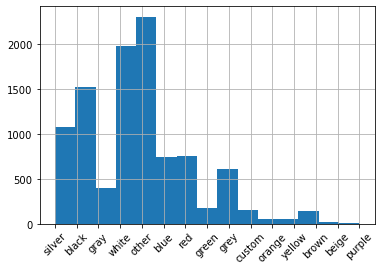

In [168]:
# 23% непонятных цветов (other) - еще поборемся за них.
df_types.color_new.hist(bins = 15)
plt.xticks(rotation = 45);

In [169]:
ids = list(df_types[df_types.color_new == 'other'].index)

In [170]:
# выше сделали новый список индексов, где нет нормального цвета. Для проверок.

#Поскольку ранее проверили всякие разные комбинации цветов со словом 'exterior' и заполнили что получилось, то
# считаем, что все строки, где явно писалось про экстерьер и интерьер, проверены.

# Теперь проверим цвета по упрощенной схеме:
# если упоминаний цветов более 2 - ставим кастом, если всего 1, то ставим цвет, который упоминается, 
# при условии, что он не часть другого слова (red-credit). А с теми, котрые останутся (2 упоминания) - позже разберемся.

set(count_colors.values()) #какое число упоминаний цветов вообще было зафиксировано.

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [171]:
colors = ['silver', 'black', 'white', 'blue', 'red', 'green', 'grey', 'orange', 'yellow', 'brown', 'purple', 'pink', 'violet', 'gray', 'beige']

for i in ids:
    if count_colors[i] > 2:
        df_types.loc[i, 'color_new'] = 'custom'
ids = list(df_types[df_types.color_new == 'other'].index)
len(ids)

1829

In [172]:
# Вот, уже осталось 18% неясных цветов. Идем далее.

for i in ids:
    if count_colors[i] == 1:
        for c in colors:
            checklist =  [' '+c, ':'+c, ': '+c, '/'+c]
            num = 0
            for d in checklist:
                if str(df_types.loc[i, 'description']).lower().find(d) != -1:
                    num +=1
                else:
                    continue
            if num >0:
                df_types.loc[i, 'color_new'] = c
            
    else:
        continue
        
len(df_types[df_types.color_new =='other'])

1622

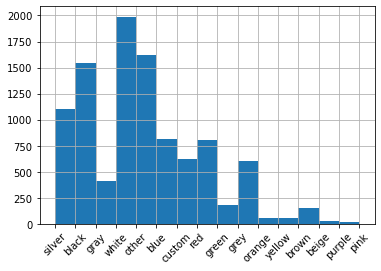

In [173]:
df_types.color_new.hist(bins = len(colors))
plt.xticks(rotation = 45);

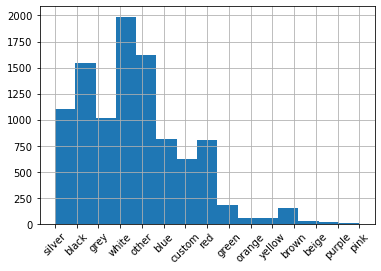

In [174]:
# осталось схлопнуть grey и gray - И будет уже нормально
for i in list(df_types[df_types.color_new == 'gray'].index):
    df_types.loc[i, 'color_new'] = 'grey'

df_types.color_new.hist(bins = len(colors))
plt.xticks(rotation = 45);

In [175]:
df_types = df_types.drop(['paint_color'], axis = 1)
df_types.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,description,state,price_category,long_filled,lat_filled,date_t,odometer_filled,color_new
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,4wd,pickup,Carvana is the safer way to buy a car During t...,tn,high,-85.250000,35.060000,2021-04-17 16:30:50+00:00,27442.0,silver
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,4wd,SUV,***Call Us for more information at: 201-635-14...,nj,medium,-74.061962,40.821805,2021-05-03 19:40:21+00:00,60023.0,black
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,NaN,sedan,Carvana is the safer way to buy a car During t...,ca,high,-84.411811,33.779214,2021-04-28 10:52:20+00:00,14048.0,grey
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,fwd,wagon,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,medium,-78.655304,35.715954,2021-04-17 14:08:57+00:00,117291.0,white
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,medium,-73.609700,40.654800,2021-05-03 22:32:06+00:00,8000.0,other


In [176]:
print("Количество пропущенных значений в color_new:", df_types.color_new.isna().sum())

Количество пропущенных значений в color_new: 0


#### Пропуски в поле drive

In [177]:
print( 'В данном поле ',df_types['drive'].isna().sum(), "пропусков, это ", 
      df_types['drive'].isna().sum()/len(df_types) * 100, '%')

В данном поле  3006 пропусков, это  30.06 %


In [178]:
df_types.drive.describe()

count     6994
unique       3
top        4wd
freq      3038
Name: drive, dtype: object

In [179]:
df_types.drive.unique()

array(['4wd', nan, 'fwd', 'rwd'], dtype=object)

<AxesSubplot:>

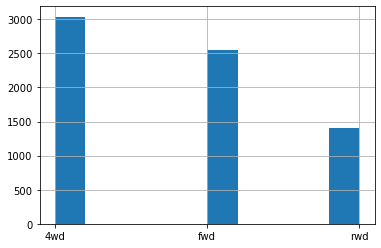

In [180]:
df_types.drive.hist() #awd отсутствует, хотя, вообще говоря, это отдельный случай.

In [181]:
ids = list(df_types[df_types['drive'].isna()].index) #список индексов с пустыми значениями

In [183]:
# Прошерстим поле description на предмет упоминания drive в строках, где поле drive - пустое.
# Добавим еще другие варианты, которые возможно не упоминались, но могут сыграть роль.

drive_kinds = ['4wd', 'fwd', 'rwd', 'awd', '4 wd', '2 wd', '2wd', 'wheel drive', 'wheeldrive']

for i in ids:
    for d in drive_kinds:
        if df_types.loc[i,'description'].lower().find(d) != -1:
            print('В строке № ', i, ' видим на символе № ', df_types.loc[i,'description'].lower().find(d), 
                  ' упоминание привода ', d)
        else:
            continue

В строке №  2  видим на символе №  2800  упоминание привода  awd
В строке №  11  видим на символе №  80  упоминание привода  fwd
В строке №  11  видим на символе №  91  упоминание привода  wheel drive
В строке №  23  видим на символе №  32  упоминание привода  4wd
В строке №  40  видим на символе №  38  упоминание привода  awd
В строке №  44  видим на символе №  297  упоминание привода  4wd
В строке №  71  видим на символе №  154  упоминание привода  fwd
В строке №  71  видим на символе №  3461  упоминание привода  wheel drive
В строке №  74  видим на символе №  471  упоминание привода  4wd
В строке №  74  видим на символе №  2889  упоминание привода  wheel drive
В строке №  77  видим на символе №  2805  упоминание привода  awd
В строке №  87  видим на символе №  4219  упоминание привода  4wd
В строке №  87  видим на символе №  2709  упоминание привода  wheel drive
В строке №  90  видим на символе №  2808  упоминание привода  awd
В строке №  94  видим на символе №  12  упоминание приво

Видим, что есть строки ,в которых упоминается краткое название и тут же присутствует 'wheel drive'
Для таких строк краткого упоминания достаточно.
Также видим строки, где 2wd сочетается с fwd или rwd - для них достаточно fwd/rwd указать.

Поэтому сначала заполним пропуски основными значениями fwd, rwd, 4wd.
А после этого уже пройдемся по вариантам: awd, 2wd, 
и потом уже формулировки с упоминанием wheel drive переберем, если останутся такие варианты.

In [184]:
# Напишем функцию перебора и поиска значений для заполнения столбца с восстановленными данными о приводе.


def find_wd(df, i, drive_kinds):
    drive = []
    count_drive = 0
    final_drive = 'other'
    for d in drive_kinds:
        if df.loc[i, 'description'].lower().find(d) != -1:
            drive.append(d)
            count_drive += 1
        else:
            continue
        
    if count_drive == 1:
        if drive[0] in set([' rwd', 'r wd', 'r-wd', '.rwd']):
            final_drive = 'rwd'
        elif drive[0] in set([' fwd', 'f wd', 'f-wd', '.fwd']):
            final_drive = 'fwd'
        else:
            final_drive = '4wd'
    elif count_drive > 1:
        if set(drive).intersection(set([' rwd', 'r wd', 'r-wd', '.rwd'])) == set(drive):
            final_drive = 'rwd'
        elif set(drive).intersection(set([' fwd', 'f wd', 'f-wd', '.fwd'])) == set(drive):
            final_drive = 'fwd'
        elif set(drive).intersection(set([' 4wd', '4 wd', '4-wd', '.4wd', '4 wheel drive', '4-wheel drive'])) == set(drive):
            final_drive = '4wd'
        else:
            print(i, ': ', 'много')
    elif count_drive == 0:
        print(i, ': ', 'пусто')
    
    return final_drive

In [185]:
drive_kinds = [' rwd', ' fwd', ' 4wd', 'f wd', '4 wd', 'r wd', 'r-wd', 'f-wd', '4-wd', '4-wheel drive', 
               '.rwd', '.fwd', '.4wd', '4 wheel drive', ]

In [186]:
df_types['drive_filled'] = df_types.drive

In [187]:
for i in ids:
    df_types.loc[i, 'drive_filled'] = find_wd(df_types, i, drive_kinds)

2 :  пусто
4 :  пусто
5 :  пусто
7 :  пусто
19 :  пусто
27 :  пусто
34 :  пусто
37 :  пусто
40 :  пусто
41 :  пусто
49 :  пусто
57 :  пусто
77 :  пусто
87 :  пусто
90 :  пусто
92 :  пусто
94 :  пусто
101 :  пусто
106 :  пусто
107 :  пусто
113 :  пусто
122 :  пусто
126 :  пусто
128 :  пусто
129 :  пусто
132 :  пусто
133 :  пусто
140 :  пусто
143 :  пусто
144 :  пусто
150 :  пусто
151 :  пусто
152 :  пусто
158 :  пусто
161 :  пусто
165 :  пусто
170 :  пусто
175 :  пусто
177 :  пусто
184 :  пусто
188 :  пусто
189 :  пусто
194 :  пусто
196 :  пусто
207 :  пусто
208 :  пусто
213 :  пусто
215 :  пусто
220 :  пусто
231 :  пусто
236 :  пусто
237 :  пусто
244 :  пусто
246 :  пусто
247 :  пусто
249 :  пусто
254 :  пусто
261 :  пусто
262 :  пусто
268 :  пусто
280 :  пусто
281 :  пусто
284 :  пусто
293 :  пусто
295 :  пусто
296 :  пусто
299 :  пусто
302 :  пусто
304 :  пусто
314 :  пусто
317 :  пусто
321 :  пусто
322 :  пусто
327 :  пусто
328 :  пусто
329 :  пусто
331 :  пусто
333 :  пусто
346 :  

In [188]:

len(df_types[df_types.drive_filled == 'other']), len(df_types[df_types.drive_filled == 'other'])/len(df_types)

(2509, 0.2509)

Число пропусков удалось снизить до 25% (было 30%). Посмотрим несколько из тех, у которых ничего не удалось найти

In [189]:
df_types.loc[2930,'description']

'2005 Toyota Tacoma 4x4  V6, 4.0L, Auto, 4 doors, 129k miles, Clean Title. Magna flow exhaust, K&N air intake, Throttle body spacer, Rigid L.E.D light bar, L.E.D headlights + fog, Optima red top battery, 33”BFG tires (New) on Method wheels. Clean inside and outside. Drives great. No issues at all. Smogged and registered. Cash only. No trades. Lowball offers will be ignored. Text if interested'

In [190]:
df_types.loc[3052,'description']

"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can get the car you want, and trade in your old one, while avoiding person-to-person contact with our friendly advocates. There are some things that can’t be put off. And if buying a car is one of them, know that we’re doing everything we can to keep you keep moving while continuing to put your health safety, and happiness first. Vehicle Stock# 2000923271📱 Want to instantly check this car’s availability? Call us at  508-443-9377Just text that stock number to 855-976-4304 or head to http://www.carvanaauto.com/7063990-74732 and plug it into the search bar!Get PRE-QUALIFIED for your auto loan in 2 minut

В принципе там могут быть еще данные.
Модифицируем нашу функцию так, чтобы она точечно данные подставляла сразу в наш датафрейм.

In [191]:
df_types[df_types.drive_filled.isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,description,state,price_category,long_filled,lat_filled,date_t,odometer_filled,color_new,drive_filled


In [192]:
df1 = df_types.copy()

In [193]:
# Пройдемся по строкам для заполнения тех значений, где явно 4wd должно быть:

find_this_param(df1, 'drive_filled', [' four wheel drive', 'four wd', 'four-wd', '4wd', '4-wd', '4 wheel-drive', 
                                   '4-wheel-drive', 'four-wheel drive', '4x4', '4x4'], '4wd')

(349, 2160, 0.216)

In [194]:
# этот прогон заполнил 349 строк значением 4wd
# проверим одно из них, где точно должен быть 4wd:

print(df1.loc[2930, 'drive_filled'])

4wd


In [195]:
find_this_param(df1, 'drive_filled', ['rear wheel drive', 'rear wd', 'rear-wd', 'rwd', 'r-wd', ' r wheel-drive', 
                                   ' r-wheel-drive', 'rear-wheel drive', ' rwd', '.rwd', '.r-wheel-drive'], 'rwd')

(22, 2138, 0.2138)

In [196]:
# еще 22 значения присвоили
# Продолжаем поиск неучтенных приводов:

find_this_param(df1, 'drive_filled', ['front wheel drive', 'front wd', 'front-wd', 'fwd', 'f-wd', ' f wheel-drive', 
                                   ' f-wheel-drive', 'front-wheel drive', ' fwd', '.fwd', '.f-wheel-drive', 
                                   'front-wd', 'frontwd', 'front-wheel-drive', 'front w drive', 'front wheel', 
                                   'front-wheel', 'fr wd'], 'fwd')

(116, 2022, 0.2022)

In [197]:
# снизили число пропусков уже до 20%.
# движемся дальше:

find_this_param(df1, 'drive_filled', ['2 wheel drive', '2 wd', '2-wd', '2wd', '2-wd', '2 wheel-drive', 
                                   '2-wheel-drive', '2-wheel drive', ' 2wd', '.2wd', '.2-wheel-drive', 
                                   ' 2-wd', '2wd', 'two-wheel-drive', '2 w drive', '2 wheel', 
                                   '2-wheel', 'two wd'], '2wd')

(57, 1965, 0.1965)

In [198]:
find_this_param(df1, 
             'drive_filled', 
             ['a wheel drive', 'a wd', 'a-wd', 'awd', 'a-wd', 'a wheel-drive', 
              'a-wheel-drive', 'a-wheel drive', ' awd', '.awd', '.a-wheel-drive', 
              ' a-wd', 'awd', 'a-wheel-drive', 'a w drive', 'a wheel', 
              'a-wheel', 'all wd', 'all-wheel', 'all wheel', 'allwd', 'all wd', 'all-wd', 'all w d'], 
             'awd')

(598, 1367, 0.1367)

<AxesSubplot:>

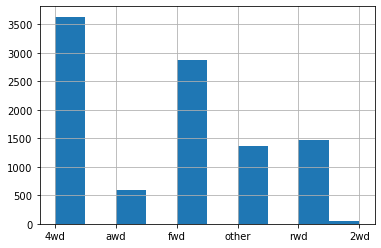

In [199]:
# до 13% снижено число пропусков. 
# Перебрали уже все что можно. Посмотрим гистограмму.
df1.drive_filled.hist()


In [200]:
# Остановимся на этом. 13% other, зато 87% заполнено. 17% непонятных значений удалось выявить и заполнить.

df1 = df1.drop(['drive'], axis = 1)
df1.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,description,state,price_category,long_filled,lat_filled,date_t,odometer_filled,color_new,drive_filled
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,Carvana is the safer way to buy a car During t...,tn,high,-85.250000,35.060000,2021-04-17 16:30:50+00:00,27442.0,silver,4wd
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,***Call Us for more information at: 201-635-14...,nj,medium,-74.061962,40.821805,2021-05-03 19:40:21+00:00,60023.0,black,4wd
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,Carvana is the safer way to buy a car During t...,ca,high,-84.411811,33.779214,2021-04-28 10:52:20+00:00,14048.0,grey,awd
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,medium,-78.655304,35.715954,2021-04-17 14:08:57+00:00,117291.0,white,fwd
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,medium,-73.609700,40.654800,2021-05-03 22:32:06+00:00,8000.0,other,other


In [201]:
print("Количество пропущенных значений в drive_filled:", df1.drive_filled.isna().sum())

Количество пропущенных значений в drive_filled: 0


In [202]:
df_types = df1.copy() #возвращаемся к предыдущему названию df для удобства.
df_types.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'VIN', 'type', 'description', 'state', 'price_category',
       'long_filled', 'lat_filled', 'date_t', 'odometer_filled', 'color_new',
       'drive_filled'],
      dtype='object')

#### Пропуски в поле vin

In [203]:
print( 'В данном поле ', df_types['VIN'].isna().sum(), "пропусков, это ", 
      df_types['VIN'].isna().sum()/len(df_types) * 100,  '%')

В данном поле  3938 пропусков, это  39.379999999999995 %


Все VIN уникальны.
поэтому очень маловероятно, что они нам помогут в нашей задаче.

И пропусков 40% - это очень много. Удалим это поле.

In [204]:
df_types = df_types.drop(['VIN'], axis = 1)

In [205]:
df_types.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'type', 'description', 'state', 'price_category',
       'long_filled', 'lat_filled', 'date_t', 'odometer_filled', 'color_new',
       'drive_filled'],
      dtype='object')

#### Пропуски в поле cylinders

In [206]:
print( 'В данном поле ', df_types['cylinders'].isna().sum(), "пропусков, это ", 
      df_types['cylinders'].isna().sum()/len(df_types)* 100,  '%')

В данном поле  4080 пропусков, это  40.8 %


In [207]:
df_types['cylinders'].unique()

array([nan, '6 cylinders', '4 cylinders', '8 cylinders', '3 cylinders',
       '5 cylinders', 'other', '10 cylinders', '12 cylinders'],
      dtype=object)

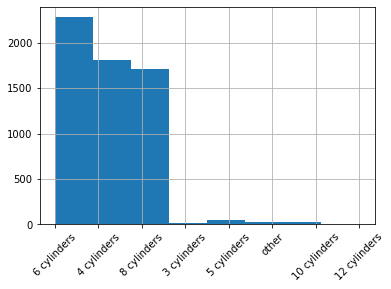

In [208]:
df_types['cylinders'].hist(bins = 8)
plt.xticks(rotation = 45);

In [209]:
df_types['cylinders_filled'] = df_types['cylinders'] #для заполнения цилиндров создадим новый столбец
df_types['cylinders_filled']

0                NaN
1        6 cylinders
2                NaN
3                NaN
4        4 cylinders
            ...     
10045    4 cylinders
10046    6 cylinders
10047    4 cylinders
10048    6 cylinders
10049    8 cylinders
Name: cylinders_filled, Length: 10000, dtype: object

In [210]:
# в новом столбце есть значения Other или nan. Сначала заменим все на other, а потом будем применять к ним функцию.

df_types['cylinders_filled'] = df_types['cylinders_filled'].fillna('other')



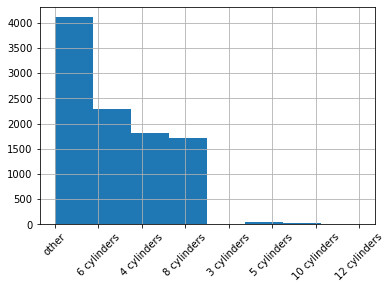

In [211]:
df_types['cylinders_filled'].hist(bins = 8)
plt.xticks(rotation = 45); # вот такая картина образовалась, когда поставили Other.

In [212]:
# заполнимвместо Other 6 cylinders где это значение фигурирует в описании

find_this_param(df_types, 
             'cylinders_filled', 
             ['6 cylinders', '6cyl', '6 cyl', '6-cyl', 'six cyl', 'six-cyl'], 
             '6 cylinders')

(207, 3898, 0.3898)

In [213]:
find_this_param(df_types, 
             'cylinders_filled', 
             ['4 cylinders', '4cyl', '4 cyl', '4-cyl', 'four cyl', 'four-cyl'], 
             '4 cylinders')

(317, 3581, 0.3581)

In [214]:
find_this_param(df_types, 
             'cylinders_filled', 
             ['8 cylinders', '8cyl', '8 cyl', '8-cyl', 'eight cyl', 'eight-cyl'], 
             '8 cylinders')

(148, 3433, 0.3433)

In [215]:
find_this_param(df_types, 
             'cylinders_filled', 
             ['3 cylinders', '3cyl', '3 cyl', '3-cyl', 'three cyl', 'three-cyl'], 
             '3 cylinders')

(15, 3418, 0.3418)

In [216]:
find_this_param(df_types, 
             'cylinders_filled', 
             ['5 cylinders', '5cyl', '5 cyl', '5-cyl', 'five cyl', 'five-cyl'], 
             '5 cylinders')

(15, 3403, 0.3403)

In [217]:
find_this_param(df_types, 
             'cylinders_filled', 
             ['10 cylinders', '10cyl', '10 cyl', '10-cyl', 'ten cyl', 'ten-cyl'], 
             '10 cylinders')

(7, 3396, 0.3396)

In [218]:
find_this_param(df_types, 
             'cylinders_filled', 
             ['12 cylinders', '12cyl', '12 cyl', '12-cyl', 'twelve cyl', 'twelve-cyl'], 
             '12 cylinders')

(0, 3396, 0.3396)

In [219]:
find_this_param(df_types, 
             'cylinders_filled', 
             [' 2 cylinders', ' 2cyl', ' 2 cyl', ' 2-cyl', 'two cyl', 'two-cyl', '.2cyl', '.2 cyl'], 
             '2 cylinders')

(0, 3396, 0.3396)

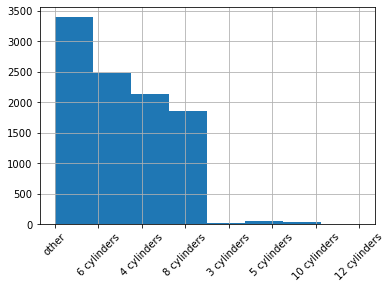

In [220]:
df_types.cylinders_filled.hist(bins = 8) #все еще много other - 34%, Но вроде все перебрали. Остановимся на этом.
plt.xticks(rotation = 45);

In [221]:
df_types = df_types.drop(['cylinders'], axis = 1)
df_types.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'fuel', 'title_status', 'transmission', 'type',
       'description', 'state', 'price_category', 'long_filled', 'lat_filled',
       'date_t', 'odometer_filled', 'color_new', 'drive_filled',
       'cylinders_filled'],
      dtype='object')

In [222]:
print("Количество пропущенных значений в cylinders_filled:", df_types.cylinders_filled.isna().sum())

Количество пропущенных значений в cylinders_filled: 0


#### Пропуски в поле condition

In [223]:
print( 'В данном поле ', df_types['condition'].isna().sum(), "пропусков, это ", 
      df_types['condition'].isna().sum()/len(df_types)* 100,  '%')

В данном поле  3766 пропусков, это  37.66 %


In [224]:
df_types['condition'].unique()

array(['good', nan, 'new', 'excellent', 'like new', 'fair', 'salvage'],
      dtype=object)

In [225]:

df_types['condition_filled'] = df_types['condition'] #для заполнения цилиндров создадим новый столбец
df_types['condition_filled']

0        good
1         NaN
2        good
3         NaN
4         new
         ... 
10045    good
10046    good
10047     NaN
10048    good
10049    good
Name: condition_filled, Length: 10000, dtype: object

In [226]:

df_types['condition_filled'] = df_types['condition_filled'].fillna('other')
df_types['condition_filled'].unique()

array(['good', 'other', 'new', 'excellent', 'like new', 'fair', 'salvage'],
      dtype=object)

<AxesSubplot:>

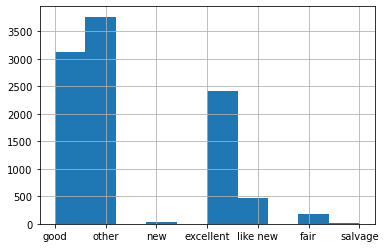

In [227]:
df_types['condition_filled'].hist()

In [228]:
# Попробуем заполнить пропуски с помощью нашей функции:

find_this_param(df_types, 
             'condition_filled', 
             ['condition: used', 'second hand', ], 
             'used')

(1033, 2733, 0.2733)

In [229]:
# на удивление нашлось масса упоминаний этих двух фраз. заполнили 10% сразу.
# Продолжим заполнять.


find_this_param(df_types, 
             'condition_filled', 
             ['condition: new', 'new condition', ], 
             'new')

(12, 2721, 0.2721)

In [230]:

find_this_param(df_types, 
             'condition_filled', 
             ['condition: exellent', 'exellent condition', 'great condition', 'condition: great', 'condition: brand new',
             'brand new condition', 'brand new', 'great condition', 'condition: great', 'condition:great', 'condition:exellent'], 
             'exellent')

(181, 2540, 0.254)

In [231]:
find_this_param(df_types, 
             'condition_filled', 
             ['condition: good', 'good condition', 'normal condition', 'condition: normal', 'condition:good', 'condition:normal'], 
             'good')

(38, 2502, 0.2502)

In [232]:
find_this_param(df_types, 
             'condition_filled', 
             ['condition: like new', 'like new condition', 'almost new condition', 'condition: almost new', 
             'like new car', 'almost new car', 'as new', 'condition:like new', 'condition:almost new'], 
             'like new')

(13, 2489, 0.2489)

In [233]:
find_this_param(df_types, 
             'condition_filled', 
             ['condition: salvage', 'salvage condition', 'condition:salv'], 
             'salvage')

(0, 2489, 0.2489)

In [234]:
find_this_param(df_types, 
             'condition_filled', 
             ['condition: fair', 'fair condition', 'some defect', 'need service', 'needs service', 'has defect', 'wuth defect', 'some damage', 
              'mechanical defect', 'cosmetical defect', 'mechanical damage', 'cosmetic damag', 'couple scratches', 'some scratches'], 
             'fair')

(1, 2488, 0.2488)

In [235]:

find_this_param(df_types, 
             'condition_filled', 
             ['condition: very good', 'very good condition', 'condition:very good'], 
             'very good')

(0, 2488, 0.2488)

In [236]:
find_this_param(df_types, 
             'condition_filled', 
             ['condition: bad', 'condition:bad','bad condition', 'terrible condition', 'condition: terrible', 
              'condition:terrible', 'condition:bad', 'need repair', 'needs repair'], 
             'bad')

(1, 2487, 0.2487)

In [237]:
find_this_param(df_types, 
             'condition_filled', 
             ['no scratch', 'without scratch', 'not scratch'], 
             'good')

(1, 2486, 0.2486)

In [238]:
find_this_param(df_types, 
             'condition_filled', 
             ['no damage', 'without damag', 'not damag'], 
             'good')

(7, 2479, 0.2479)

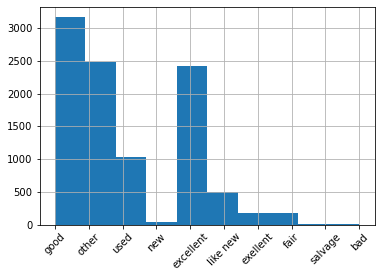

In [239]:
df_types.condition_filled.hist(bins = 10)
plt.xticks(rotation = 45);

In [240]:
df_types = df_types.drop(['condition'], axis = 1)
df_types.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'title_status', 'transmission', 'type', 'description',
       'state', 'price_category', 'long_filled', 'lat_filled', 'date_t',
       'odometer_filled', 'color_new', 'drive_filled', 'cylinders_filled',
       'condition_filled'],
      dtype='object')

In [241]:
print("Количество пропущенных значений в condition_filled:", df_types.condition_filled.isna().sum())

Количество пропущенных значений в condition_filled: 0


#### Пропуски в поле type

In [242]:
print( 'В данном поле ', df_types['type'].isna().sum(), "пропусков, это ", 
      df_types['type'].isna().sum()/len(df_types)* 100,  '%')

В данном поле  2194 пропусков, это  21.94 %


In [243]:
df_types.type.unique()

array(['pickup', 'SUV', 'sedan', 'wagon', nan, 'coupe', 'hatchback',
       'van', 'mini-van', 'other', 'convertible', 'truck', 'bus',
       'offroad'], dtype=object)

In [244]:
df_types['type_filled'] = df_types.type.copy()

In [245]:
df_types['type_filled'] = df_types['type_filled'].fillna('other')

In [246]:
find_this_param(df_types, 'type_filled', ['pickup', 'pick up', 'pick-up'] ,'pickup')

(265, 2446, 0.2446)

In [247]:
find_this_param(df_types, 'type_filled', ['suv', 'sport utility vehicle', 'sport-utility'] ,'SUV')

(537, 1909, 0.1909)

In [248]:
find_this_param(df_types, 'type_filled', ['coupe'] ,'coupe')

(80, 1829, 0.1829)

In [249]:
find_this_param(df_types, 'type_filled', ['hatchback', 'hatch back', 'hatch-back'] ,'hatchback')

(30, 1799, 0.1799)

In [250]:
find_this_param(df_types, 'type_filled', ['minivan', 'mini-van', 'mini van'] ,'mini-van')

(35, 1764, 0.1764)

In [251]:
find_this_param(df_types, 'type_filled', ['van'] ,'van')

(283, 1481, 0.1481)

In [252]:
find_this_param(df_types, 'type_filled', ['convertible'] ,'convertible')

(32, 1449, 0.1449)

In [253]:
find_this_param(df_types, 'type_filled', ['truck'] ,'truck')

(258, 1191, 0.1191)

In [254]:
find_this_param(df_types, 'type_filled', ['bus'] ,'bus')

(49, 1142, 0.1142)

In [255]:
find_this_param(df_types, 'type_filled', ['offroad', 'off road', 'off-road'] ,'offroad')

(10, 1132, 0.1132)

In [256]:
find_this_param(df_types, 'type_filled', ['sedan'] ,'sedan')

(82, 1050, 0.105)

In [257]:
find_this_param(df_types, 'type_filled', ['wagon'] ,'wagon')

(13, 1037, 0.1037)

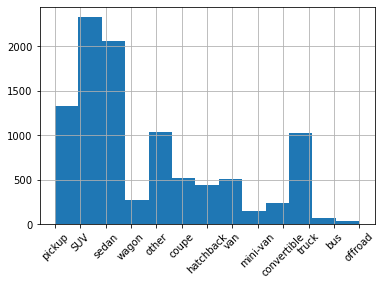

In [258]:
df_types.type_filled.hist(bins = 13)
plt.xticks(rotation = 45);

In [259]:
# число непонятных типов снизилось до 10%, их оставим other.

df_types = df_types.drop(['type'], axis = 1)

In [260]:
df_types.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,title_status,...,price_category,long_filled,lat_filled,date_t,odometer_filled,color_new,drive_filled,cylinders_filled,condition_filled,type_filled
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,clean,...,high,-85.250000,35.060000,2021-04-17 16:30:50+00:00,27442.0,silver,4wd,other,good,pickup
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,other,clean,...,medium,-74.061962,40.821805,2021-05-03 19:40:21+00:00,60023.0,black,4wd,6 cylinders,other,SUV
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,clean,...,high,-84.411811,33.779214,2021-04-28 10:52:20+00:00,14048.0,grey,awd,other,good,sedan
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,clean,...,medium,-78.655304,35.715954,2021-04-17 14:08:57+00:00,117291.0,white,fwd,other,used,wagon
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,clean,...,medium,-73.609700,40.654800,2021-05-03 22:32:06+00:00,8000.0,other,other,4 cylinders,new,other


In [261]:
print("Количество пропущенных значений в type_filled:", df_types.type_filled.isna().sum())

Количество пропущенных значений в type_filled: 0


In [262]:
len(df_types[df_types.type_filled == 'other'])/len(df_types)

0.1037

#### Пропуски в поле manufacturer

In [263]:
print( 'В данном поле ', df_types['manufacturer'].isna().sum(), "пропусков, это ", 
      df_types['manufacturer'].isna().sum()/len(df_types)* 100,  '%')

В данном поле  382 пропусков, это  3.82 %


In [264]:
df_types['manufacturer'].unique()

array(['ram', 'ford', 'volkswagen', 'toyota', 'nissan', 'bmw', 'honda',
       'dodge', 'mitsubishi', 'fiat', 'lincoln', 'chevrolet', 'saturn',
       nan, 'mini', 'cadillac', 'jeep', 'kia', 'mazda', 'buick', 'lexus',
       'subaru', 'audi', 'rover', 'hyundai', 'gmc', 'mercedes-benz',
       'acura', 'chrysler', 'volvo', 'alfa-romeo', 'porsche', 'pontiac',
       'tesla', 'ferrari', 'mercury', 'infiniti', 'jaguar', 'datsun',
       'harley-davidson'], dtype=object)

In [265]:
df_types['manuf'] = df_types.manufacturer

In [266]:
df_types['manuf'] = df_types['manuf'].fillna('other')

In [267]:
for i in ['ram', 'ford', 'volkswagen', 'toyota', 'nissan', 'bmw', 'honda',
          'dodge', 'mitsubishi', 'fiat', 'lincoln', 'chevrolet', 'saturn',
           'cadillac', 'jeep', 'kia', 'mazda', 'buick', 'lexus',
          'subaru', 'audi', 'rover', 'hyundai', 'gmc', 'mercedes-benz',
          'acura', 'chrysler', 'volvo', 'alfa-romeo', 'porsche', 'pontiac',
          'tesla', 'ferrari', 'mercury', 'infiniti', 'jaguar', 'datsun','harley-davidson']:
    find_this_param(df_types, 'manuf', [i] , i)


In [268]:
#заполнили примерно половину, остальное other (160)

df_types[df_types['manuf'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,title_status,...,long_filled,lat_filled,date_t,odometer_filled,color_new,drive_filled,cylinders_filled,condition_filled,type_filled,manuf


In [269]:
df_types[df_types['manuf'] == 'other']

,id,url,region,region_url,price,year,manufacturer,model,fuel,title_status,...,long_filled,lat_filled,date_t,odometer_filled,color_new,drive_filled,cylinders_filled,condition_filled,type_filled,manuf
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1970.0,NaN,oldsmobile 442,gas,clean,...,-89.273400,43.098400,2021-04-25 15:10:43+00:00,111111.0,white,rwd,8 cylinders,excellent,convertible,other
201,7316027370,https://monterey.craigslist.org/cto/d/salinas-...,monterey bay,https://monterey.craigslist.org,2500,2005.0,NaN,Voltswagon Beetle,gas,clean,...,-121.659600,36.667700,2021-05-03 01:15:46+00:00,112432.0,black,fwd,4 cylinders,fair,convertible,other
217,7314009784,https://nashville.craigslist.org/ctd/d/greenbr...,nashville,https://nashville.craigslist.org,8000,2007.0,NaN,THOMAS SCHOOL BUS,diesel,clean,...,-86.791400,36.422900,2021-04-28 20:08:19+00:00,147971.0,yellow,rwd,6 cylinders,good,bus,other
244,7316204732,https://richmond.craigslist.org/ctd/d/burkevil...,richmond,https://richmond.craigslist.org,19999,1995.0,NaN,Emergency One Fire Truck,diesel,clean,...,-78.196100,37.195200,2021-05-03 15:09:24+00:00,91659.0,red,other,other,excellent,truck,other
256,7311408835,https://longisland.craigslist.org/cto/d/rocky-...,long island,https://longisland.craigslist.org,4800,2006.0,NaN,chysler 300,gas,clean,...,-72.935700,40.949200,2021-04-23 16:40:15+00:00,65000.0,blue,rwd,6 cylinders,excellent,sedan,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9528,7309207129,https://norfolk.craigslist.org/ctd/d/chesapeak...,norfolk / hampton roads,https://norfolk.craigslist.org,3450,2005.0,NaN,scion xa,gas,clean,...,-76.221293,36.807234,2021-04-19 14:16:16+00:00,185485.0,grey,fwd,4 cylinders,excellent,sedan,other
9677,7302874246,https://janesville.craigslist.org/ctd/d/janesv...,janesville,https://janesville.craigslist.org,1000,2020.0,NaN,Janesville,gas,clean,...,-89.002500,42.668300,2021-04-06 22:52:24+00:00,1.0,other,other,other,other,SUV,other
9786,7312725638,https://altoona.craigslist.org/ctd/d/latrobe-1...,altoona-johnstown,https://altoona.craigslist.org,7950,1966.0,NaN,AMC Ambassador,gas,clean,...,-79.410300,40.292600,2021-04-26 12:32:06+00:00,76000.0,other,other,other,other,sedan,other
9799,7308174823,https://southjersey.craigslist.org/ctd/d/trent...,south jersey,https://southjersey.craigslist.org,10395,2008.0,NaN,HUMMER H3,gas,clean,...,-74.749874,40.185945,2021-04-17 12:47:20+00:00,157778.0,white,4wd,5 cylinders,excellent,SUV,other


In [270]:
find_this_param(df_types, 'manuf', 'suzuki' , 'suzuki') #вот эту марку не увидела в списке, и как видим, она почти все пропуски закрыла.

(158, 2, 0.0002)

In [271]:
# последние 2 марки проверим еще

df_types[df_types.manuf == 'other'][['description', 'model']]

,description,model
6755,-,nan
9430,-,nan


In [272]:
df_types[df_types.manuf == 'other']

,id,url,region,region_url,price,year,manufacturer,model,fuel,title_status,...,long_filled,lat_filled,date_t,odometer_filled,color_new,drive_filled,cylinders_filled,condition_filled,type_filled,manuf
6755,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,2012.0,NaN,nan,other,clean,...,-71.375914,42.957300,2021-04-24 03:02:46.415083008+00:00,111834.525253,other,other,other,other,other,other
9430,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,2011.0,NaN,nan,other,clean,...,-122.400579,48.275145,2021-04-24 03:02:46.415083008+00:00,126773.014862,other,other,other,other,other,other


In [380]:
# эти 2 пусть остаются other. Про них не сказать особо ничего

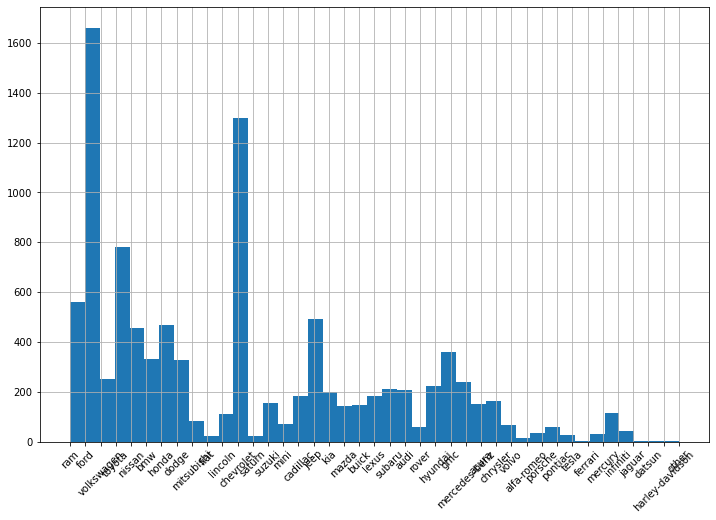

In [273]:
df_types.manuf.hist(figsize = (12,8), bins = len(df_types.manuf.unique()))
plt.xticks(rotation = 45);

Всех производителей заполнили

In [274]:
df_types = df_types.drop(['manufacturer'], axis = 1)
df_types.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'model', 'fuel',
       'title_status', 'transmission', 'description', 'state',
       'price_category', 'long_filled', 'lat_filled', 'date_t',
       'odometer_filled', 'color_new', 'drive_filled', 'cylinders_filled',
       'condition_filled', 'type_filled', 'manuf'],
      dtype='object')

In [275]:
print("Количество пропущенных значений в manuf:", df_types.manuf.isna().sum())

Количество пропущенных значений в manuf: 0


#### Общая проверка пропусков

<AxesSubplot:>

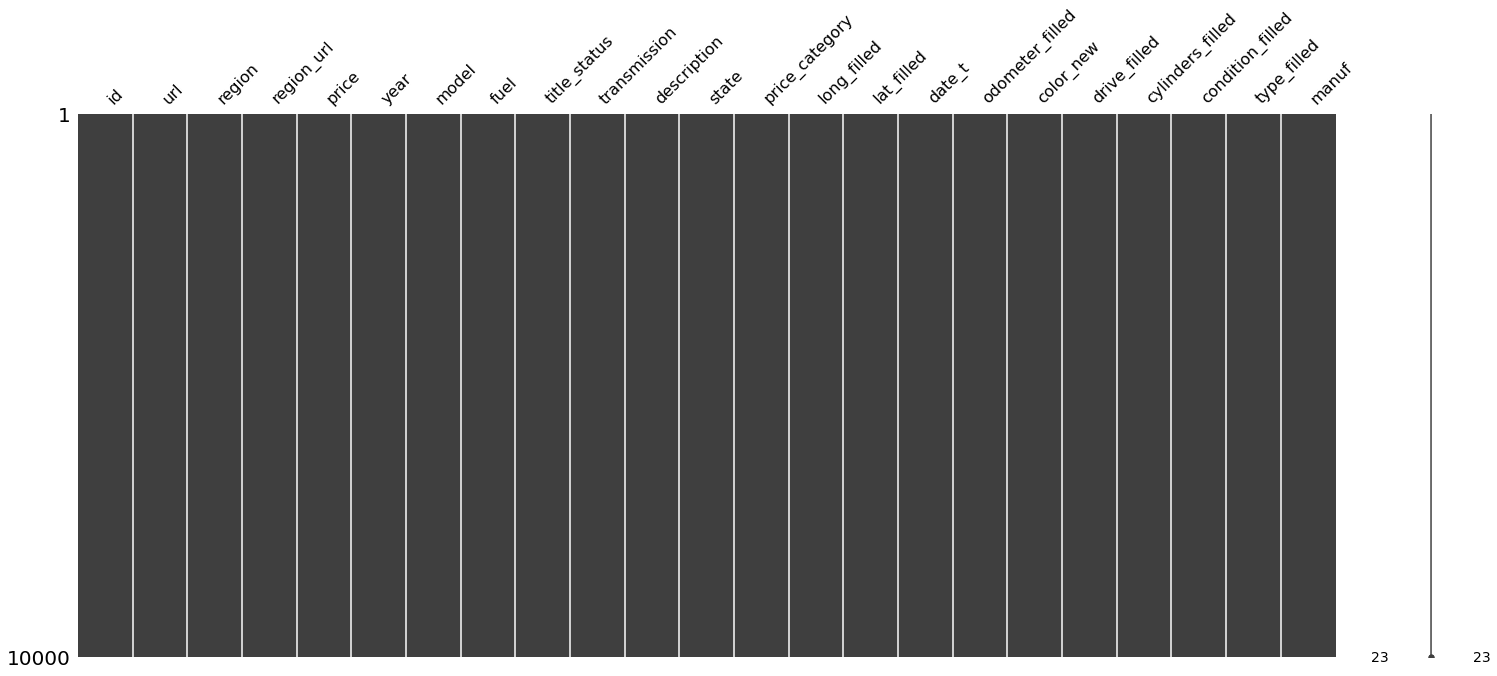

In [276]:
msno.matrix(df_types)

Все пропуски заполнены.

In [277]:
print_useful_rows_info(df_types)

Количество полностью заполненных объектов из всей выборки: 10000
Процент полностью заполненных объектов из всей выборки: 100.0


In [278]:
df_types.to_csv('data/df_filled.csv')

На всякий случай сохранили файл с заполненными данными в папке data

### Приведение типов данных

In [279]:
df_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10049
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                10000 non-null  int64              
 1   url               10000 non-null  object             
 2   region            10000 non-null  object             
 3   region_url        10000 non-null  object             
 4   price             10000 non-null  int64              
 5   year              10000 non-null  float64            
 6   model             10000 non-null  object             
 7   fuel              10000 non-null  object             
 8   title_status      10000 non-null  object             
 9   transmission      10000 non-null  object             
 10  description       10000 non-null  object             
 11  state             10000 non-null  object             
 12  price_category    10000 non-null  object             
 13  l

In [392]:
# Столбец date_t был приведен к нужному типу ранее.
# Год можно привести к целым числам:

df_types.year = df_types.year.astype(int)
df_types.year.dtype

dtype('int32')

In [280]:
# Приведем к категориальному типу данных поля, где они точно категориальные:

category_features = ['title_status', 'transmission', 'price_category', 'region', 'fuel',
                    'state', 'color_new', 'drive_filled', 'cylinders_filled', 'condition_filled',
                     'type_filled', 'manuf']

for feature in category_features:
    df_types[feature] = df_types[feature].astype('category')
    
df_types.dtypes

id                                int64
url                              object
region                         category
region_url                       object
price                             int64
year                            float64
model                            object
fuel                           category
title_status                   category
transmission                   category
description                      object
state                          category
price_category                 category
long_filled                     float64
lat_filled                      float64
date_t              datetime64[ns, UTC]
odometer_filled                 float64
color_new                      category
drive_filled                   category
cylinders_filled               category
condition_filled               category
type_filled                    category
manuf                          category
dtype: object

Типы привели к приличному виду. Переименуем столбцы и идем дальше.

In [281]:
df_types = df_types.rename(columns = {'type_filled': 'type', 'odometer_filled': 'odometer', 'color_new': 'paint_color', 
                           'drive_filled': 'drive', 'cylinders_filled':'cylinders', 'condition_filled': 'condition',
                          'date_t': 'date', 'lat_filled':'lat', 'long_filled': 'long'})
df_types.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'model', 'fuel',
       'title_status', 'transmission', 'description', 'state',
       'price_category', 'long', 'lat', 'date', 'odometer', 'paint_color',
       'drive', 'cylinders', 'condition', 'type', 'manuf'],
      dtype='object')

In [283]:
df_types = df_types.rename(columns = {'manuf': 'manufacturer'})
df_types.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'model', 'fuel',
       'title_status', 'transmission', 'description', 'state',
       'price_category', 'long', 'lat', 'date', 'odometer', 'paint_color',
       'drive', 'cylinders', 'condition', 'type', 'manufacturer'],
      dtype='object')

In [284]:
df_types.to_csv('data/df_types_filled.csv') # и сохраним в файл

### Аномалии и выбросы

Проверим поля: price, year, odometer.

#### Year

In [285]:
df_types.year.describe()

count    10000.000000
mean      2010.956600
std          9.667092
min       1915.000000
25%       2008.000000
50%       2013.000000
75%       2017.000000
max       2022.000000
Name: year, dtype: float64

In [286]:
# медиана далековато от среднего. Скорее всего есть выбросы снизу, которые вносят большую погрешность.
# (50%-квартиль - это как раз медиана)

In [287]:
# Посмотрим границы для нормальных значений года выпуска:

def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [288]:
boundaries = calculate_outliers(df_types.year)
boundaries

(1994.5, 2030.5)

In [289]:
is_outlier = (df_types.year < boundaries[0]) | (df_types.year> boundaries[1]) 
is_outlier.sum()

394

In [290]:
# 394 объявления попадают за рамки нормальных значений.
# Их доля:

is_outlier.sum() / len(df_types)

0.0394

In [291]:
df_types[is_outlier].price_category.value_counts()

low       181
medium    135
high       78
Name: price_category, dtype: int64

<AxesSubplot:>

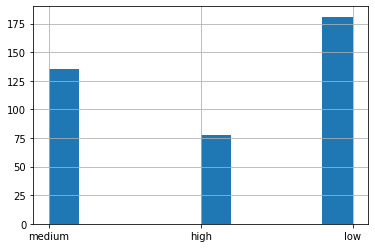

In [292]:
df_types[is_outlier].price_category.hist()

In [293]:
# видим, что аномалии по году - из разных ценовых категорий, нельзя сказать .что они все в какой-то одной.
# заменим аномалии на нижнюю границу нормального интервала (т.к. все аномалии - из старых лет)

df_types.loc[is_outlier, 'year'] = int(boundaries[0])
df_types.loc[is_outlier, 'year']

13       1994.0
21       1994.0
57       1994.0
66       1994.0
106      1994.0
          ...  
9934     1994.0
9969     1994.0
9993     1994.0
10021    1994.0
10040    1994.0
Name: year, Length: 394, dtype: float64

In [294]:
df_types.year.describe() 

count    10000.00000
mean      2011.69540
std          6.52065
min       1994.00000
25%       2008.00000
50%       2013.00000
75%       2017.00000
max       2022.00000
Name: year, dtype: float64

In [295]:
# среднее стало чуть выше, минимум стал нижней границей нормального интервала. СКО стало сильно меньше.
# Зато квантили не изменились, логично.

#### Price

In [296]:
df_types.price.describe().apply(lambda x: f"{x:0.3f}")

count       10000.000
mean        20678.415
std        124623.020
min           500.000
25%          7900.000
50%         15749.500
75%         27990.000
max      12345678.000
Name: price, dtype: object

<AxesSubplot:>

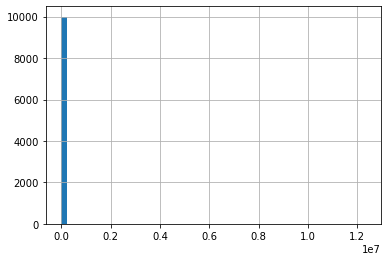

In [297]:
# Судя по всему, здесь есть знатные выбросы среди максимальных значений (минимум 1)

df_types.price.hist(bins = 50)

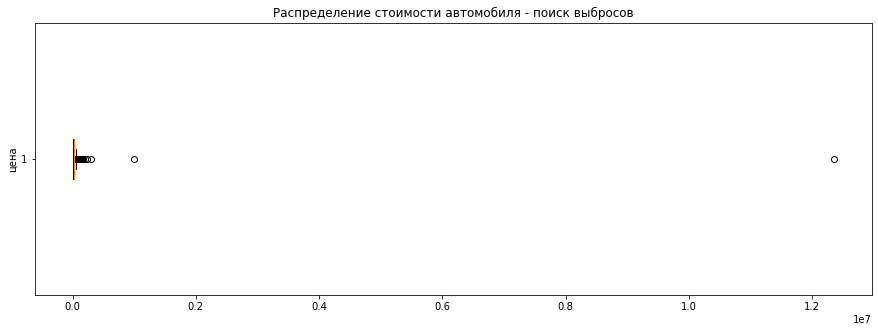

In [298]:
# Не видим ничего - слишком огромный выброс, размывает данные.
# Посмотрим по-другому:

fig, ax = plt.subplots(figsize = (15, 5))
ax.boxplot(df_types.price, vert=False)
ax.set_ylabel('цена')
ax.set_title('Распределение стоимости автомобиля - поиск выбросов');

In [299]:
# Вот он, сильный выброс по цене.

# Выведем границы нормальных значений для цены:

boundaries = calculate_outliers(df_types.price)
boundaries

(-22235.0, 58125.0)

In [300]:
is_outlier = (df_types.price < boundaries[0]) | (df_types.price> boundaries[1]) 
is_outlier.sum(), is_outlier.sum() / len(df_types)

(215, 0.0215)

In [301]:
# 215 выбросов по цене, 2% строк - с выбросами

df_vybrosy_price = df_types[is_outlier]
df_vybrosy_price

,id,url,region,region_url,price,year,model,fuel,title_status,transmission,...,long,lat,date,odometer,paint_color,drive,cylinders,condition,type,manufacturer
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1994.0,oldsmobile 442,gas,clean,automatic,...,-89.273400,43.098400,2021-04-25 15:10:43+00:00,111111.0,white,rwd,8 cylinders,excellent,convertible,suzuki
33,7304521734,https://kpr.craigslist.org/ctd/d/pasco-2019-fo...,kennewick-pasco-richland,https://kpr.craigslist.org,79999,2019.0,f450 deisel power stroke,diesel,clean,automatic,...,-119.128015,46.234838,2021-04-10 02:46:04+00:00,41759.0,white,4wd,8 cylinders,other,truck,ford
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1994.0,coe,gas,clean,automatic,...,-117.908500,33.680100,2021-04-29 17:49:29+00:00,1.0,red,other,8 cylinders,excellent,truck,ford
96,7311450619,https://wenatchee.craigslist.org/ctd/d/kittita...,wenatchee,https://wenatchee.craigslist.org,58995,2020.0,wrangler,gas,clean,automatic,...,-120.516300,46.999600,2021-04-23 17:43:27+00:00,17799.0,custom,4wd,4 cylinders,like new,SUV,jeep
144,7305640478,https://siouxfalls.craigslist.org/ctd/d/gilber...,sioux falls / SE SD,https://siouxfalls.craigslist.org,59900,2014.0,f550 xl,diesel,clean,automatic,...,-88.436783,42.117274,2021-04-12 15:34:12+00:00,156000.0,other,other,other,other,van,ford
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017.0,xts,gas,clean,automatic,...,-95.940800,36.126200,2021-05-03 21:37:36+00:00,47000.0,silver,4wd,8 cylinders,like new,SUV,rover
10004,7315493686,https://palmsprings.craigslist.org/ctd/d/fonta...,palm springs,https://palmsprings.craigslist.org,68995,2016.0,2500,diesel,clean,automatic,...,-117.455310,34.107220,2021-05-01 20:40:57+00:00,61130.0,black,4wd,6 cylinders,used,pickup,ram
10020,7314385254,https://spokane.craigslist.org/ctd/d/puyallup-...,spokane / coeur d'alene,https://spokane.craigslist.org,86977,2017.0,f450 super duty crew cab,diesel,clean,automatic,...,-122.291776,47.197304,2021-04-29 17:03:19+00:00,16806.0,other,4wd,8 cylinders,excellent,pickup,ford
10027,7307184389,https://holland.craigslist.org/ctd/d/otsego-20...,holland,https://holland.craigslist.org,61022,2020.0,sierra 1500,gas,clean,automatic,...,-85.661948,42.448987,2021-04-15 15:05:47+00:00,5894.0,custom,4wd,8 cylinders,other,truck,gmc


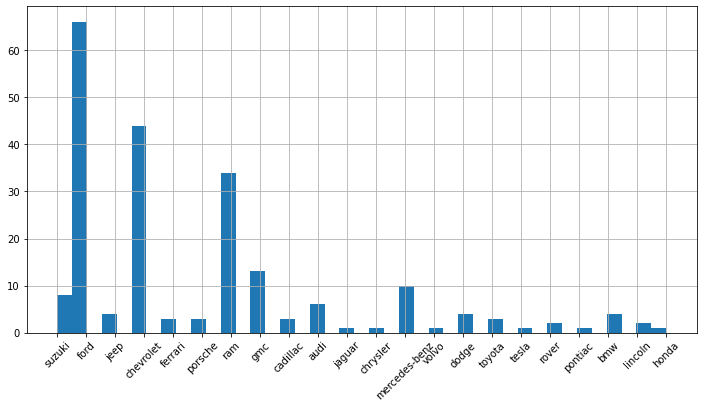

In [302]:
df_vybrosy_price.manufacturer.hist(figsize = (12,6), bins = len(df_types.manufacturer.unique()))
plt.xticks(rotation=45);

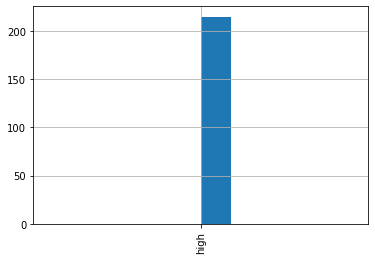

In [303]:
df_vybrosy_price.price_category.hist();
plt.xticks(rotation=90);

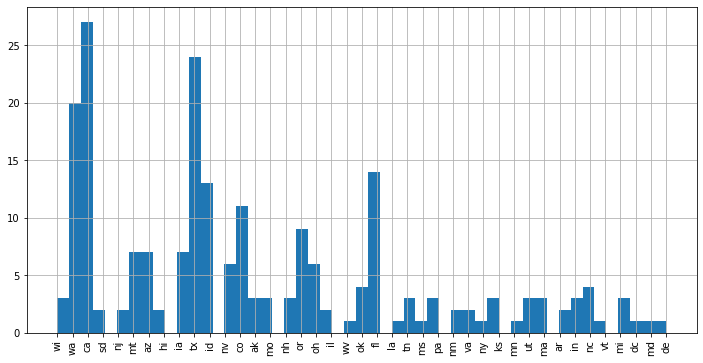

In [304]:
df_vybrosy_price.state.hist(figsize = (12,6), bins = len(df_types.state.unique()));
plt.xticks(rotation=90);

In [305]:
# Видим, что есть выделяющиеся по выбросам штаты и марки автомобилей. Поизучаем еще:

df_vybrosy_price.sort_values('price', ascending = False).head(15)

,id,url,region,region_url,price,year,model,fuel,title_status,transmission,...,long,lat,date,odometer,paint_color,drive,cylinders,condition,type,manufacturer
6352,7302112231,https://akroncanton.craigslist.org/ctd/d/canto...,akron / canton,https://akroncanton.craigslist.org,12345678,2019.0,es,gas,clean,automatic,...,-81.440800,40.846500,2021-04-05 16:26:23+00:00,100000.0,black,4wd,8 cylinders,good,truck,chevrolet
9838,7305237859,https://delaware.craigslist.org/cto/d/delaware...,delaware,https://delaware.craigslist.org,1000000,2022.0,Any make any model,diesel,clean,other,...,-75.595700,39.572500,2021-04-11 17:51:42+00:00,364747.0,other,other,other,other,other,ram
5682,7313998757,https://winchester.craigslist.org/ctd/d/manass...,winchester,https://winchester.craigslist.org,304995,2021.0,911,gas,clean,automatic,...,-77.461754,38.762669,2021-04-28 19:49:25+00:00,22.0,white,awd,6 cylinders,used,convertible,porsche
292,7310897583,https://tucson.craigslist.org/ctd/d/tucson-201...,tucson,https://tucson.craigslist.org,239995,2017.0,488 gtb,gas,clean,automatic,...,-110.878886,32.236075,2021-04-22 16:38:59+00:00,6012.0,red,rwd,8 cylinders,other,coupe,ferrari
6141,7315323093,https://daytona.craigslist.org/ctd/d/orlando-2...,daytona beach,https://daytona.craigslist.org,197999,2015.0,Lamborghini Huracan,gas,clean,other,...,-81.396429,28.466088,2021-05-01 15:48:44+00:00,33875.0,green,other,10 cylinders,excellent,coupe,ram
9204,7306718413,https://desmoines.craigslist.org/ctd/d/portlan...,des moines,https://desmoines.craigslist.org,163540,2020.0,es,other,clean,automatic,...,-122.579192,45.494265,2021-04-14 16:26:24+00:00,6318.0,custom,fwd,8 cylinders,other,other,mercedes-benz
8876,7313664504,https://austin.craigslist.org/cto/d/austin-sup...,austin,https://austin.craigslist.org,150000,2006.0,Peterbilt 378,diesel,clean,manual,...,-97.682700,30.364900,2021-04-28 02:01:28+00:00,1234.0,white,other,other,excellent,truck,suzuki
4256,7316319465,https://portland.craigslist.org/clc/ctd/d/glad...,portland,https://portland.craigslist.org,149990,2015.0,sprinter 3500 airs,diesel,clean,automatic,...,-122.605132,45.382346,2021-05-03 18:04:09+00:00,49291.0,silver,4wd,other,used,pickup,mercedes-benz
9063,7314817013,https://sandiego.craigslist.org/csd/ctd/d/dall...,san diego,https://sandiego.craigslist.org,139950,2017.0,Mclaren 570GT W/ Upgrades,gas,clean,automatic,...,-96.804400,32.790400,2021-04-30 15:20:20+00:00,13000.0,custom,rwd,8 cylinders,other,coupe,ram
6591,7312384300,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,129999,2018.0,maybach s560,gas,clean,automatic,...,-81.394800,28.463700,2021-04-25 16:58:01+00:00,6000.0,black,4wd,8 cylinders,like new,sedan,mercedes-benz


In [306]:
# Здесь видим 2 самых дорогих автомобиля далеко оторвались от всех остальных. Остальные имеют меньший отрыв.
# Тем не менее, у нас 2% аномалий по цене, для анализа данных и построения модели, все их "срежем" до верхней границы нормы

df_types.loc[is_outlier, 'price'] = int(boundaries[1])
df_types.loc[is_outlier].sort_values('price', ascending = False).head(15)

,id,url,region,region_url,price,year,model,fuel,title_status,transmission,...,long,lat,date,odometer,paint_color,drive,cylinders,condition,type,manufacturer
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,58125,1994.0,oldsmobile 442,gas,clean,automatic,...,-89.273400,43.098400,2021-04-25 15:10:43+00:00,111111.0,white,rwd,8 cylinders,excellent,convertible,suzuki
6607,7302170672,https://tulsa.craigslist.org/ctd/d/tulsa-2019-...,tulsa,https://tulsa.craigslist.org,58125,2019.0,q8 premium sport utility 4d,other,clean,automatic,...,-95.910000,36.120000,2021-04-05 17:51:31+00:00,20126.0,black,awd,other,good,SUV,audi
6805,7312232294,https://stockton.craigslist.org/cto/d/manteca-...,stockton,https://stockton.craigslist.org,58125,2016.0,mack,diesel,clean,manual,...,-121.234400,37.780800,2021-04-25 06:09:42+00:00,425000.0,pink,other,other,good,other,suzuki
6809,7310967230,https://westernmass.craigslist.org/ctd/d/new-l...,western massachusetts,https://westernmass.craigslist.org,58125,2020.0,silverado 3500hd,diesel,clean,automatic,...,-73.377300,42.475900,2021-04-22 18:29:43+00:00,27831.0,white,4wd,8 cylinders,excellent,truck,chevrolet
6812,7312319171,https://austin.craigslist.org/ctd/d/buda-2019-...,austin,https://austin.craigslist.org,58125,2019.0,f-350,diesel,clean,automatic,...,-97.839307,30.064714,2021-04-25 14:53:03+00:00,68269.0,white,4wd,other,used,pickup,ford
6821,7316526215,https://honolulu.craigslist.org/big/ctd/d/lynn...,hawaii,https://honolulu.craigslist.org,58125,2016.0,silverado 2500hd high,diesel,clean,automatic,...,-122.321640,47.812470,2021-05-04 00:26:45+00:00,62226.0,custom,4wd,8 cylinders,other,truck,chevrolet
6829,7311166433,https://fayar.craigslist.org/ctd/d/clinton-lik...,fayetteville,https://fayar.craigslist.org,58125,2020.0,m4,gas,clean,automatic,...,-93.785000,38.401800,2021-04-23 01:15:38+00:00,4013.0,grey,rwd,other,other,convertible,bmw
6910,7303230903,https://wichitafalls.craigslist.org/ctd/d/norm...,wichita falls,https://wichitafalls.craigslist.org,58125,2019.0,silverado,gas,clean,automatic,...,-97.484100,35.199000,2021-04-07 18:03:13+00:00,1118.0,other,4wd,8 cylinders,like new,truck,chevrolet
6931,7307188245,https://jacksonville.craigslist.org/ctd/d/vero...,jacksonville,https://jacksonville.craigslist.org,58125,2018.0,f250 king ranch,diesel,clean,automatic,...,-80.392300,27.588500,2021-04-15 15:11:45+00:00,53334.0,white,4wd,8 cylinders,excellent,truck,ford
6971,7312614023,https://columbiamo.craigslist.org/ctd/d/clinto...,columbia / jeff city,https://columbiamo.craigslist.org,58125,2020.0,m4,gas,clean,automatic,...,-93.773440,38.382623,2021-04-26 00:45:39+00:00,4013.0,grey,rwd,other,other,convertible,bmw


In [307]:
#заменили выбросы по цене на верхнюю границу нормального интервала

df_types.price.describe()

count    10000.000000
mean     18968.015200
std      13695.842545
min        500.000000
25%       7900.000000
50%      15749.500000
75%      27990.000000
max      58125.000000
Name: price, dtype: float64

#### Odometer

In [308]:
df_types.odometer.describe()

count    1.000000e+04
mean     9.570633e+04
std      8.651582e+04
min      0.000000e+00
25%      3.905450e+04
50%      8.854300e+04
75%      1.370000e+05
max      3.245000e+06
Name: odometer, dtype: float64

<AxesSubplot:>

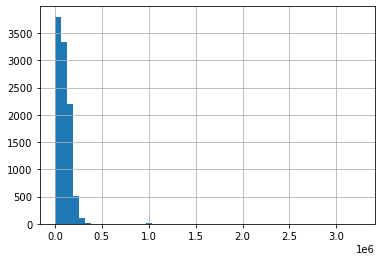

In [309]:
df_types.odometer.hist(bins = 50)

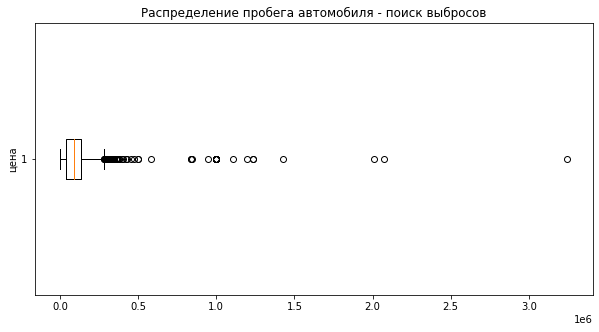

In [310]:
# явно есть выбросы.
# Проверим еще boxplot.

fig, ax = plt.subplots(figsize = (10, 5))
ax.boxplot(df_types.odometer, vert=False)
ax.set_ylabel('цена')
ax.set_title('Распределение пробега автомобиля - поиск выбросов');

In [311]:
boundaries = calculate_outliers(df_types.odometer)
boundaries

(-107863.75, 283918.25)

In [312]:
is_outlier = (df_types.odometer < boundaries[0]) | (df_types.odometer> boundaries[1]) 
is_outlier.sum(), is_outlier.sum() / len(df_types)

(91, 0.0091)

Есть выбросы. Надо их срезать

In [313]:
df_types.loc[is_outlier, 'odometer'] = int(boundaries[1])
df_types.loc[is_outlier].sort_values('odometer', ascending = False).head(15)

,id,url,region,region_url,price,year,model,fuel,title_status,transmission,...,long,lat,date,odometer,paint_color,drive,cylinders,condition,type,manufacturer
27,7311516735,https://easttexas.craigslist.org/cto/d/lufkin-...,tyler / east TX,https://easttexas.craigslist.org,17000,2003.0,3500,diesel,clean,automatic,...,-94.646900,31.270000,2021-04-23 19:27:25+00:00,283918.0,other,4wd,other,other,other,dodge
6996,7315228342,https://minneapolis.craigslist.org/wsh/ctd/d/l...,minneapolis / st paul,https://minneapolis.craigslist.org,2499,2005.0,accord ex-l,gas,clean,automatic,...,-92.771301,44.954215,2021-05-01 12:11:09+00:00,283918.0,other,fwd,6 cylinders,good,sedan,honda
6889,7313162052,https://littlerock.craigslist.org/cto/d/hope-f...,little rock,https://littlerock.craigslist.org,7500,2005.0,F-250 4X4,diesel,clean,automatic,...,-93.606800,33.673600,2021-04-27 02:03:40+00:00,283918.0,black,4wd,8 cylinders,good,pickup,ford
6837,7312581664,https://saginaw.craigslist.org/cto/d/bay-city-...,saginaw-midland-baycity,https://saginaw.craigslist.org,4000,2000.0,2500,gas,clean,automatic,...,-83.953000,43.608800,2021-04-25 23:21:29+00:00,283918.0,grey,4wd,8 cylinders,fair,truck,gmc
6836,7313373665,https://sanantonio.craigslist.org/cto/d/san-an...,san antonio,https://sanantonio.craigslist.org,15995,2008.0,f-350 dually diesel 4x4,diesel,clean,automatic,...,-98.613700,29.649500,2021-04-27 16:28:59+00:00,283918.0,white,4wd,other,like new,pickup,ford
6805,7312232294,https://stockton.craigslist.org/cto/d/manteca-...,stockton,https://stockton.craigslist.org,58125,2016.0,mack,diesel,clean,manual,...,-121.234400,37.780800,2021-04-25 06:09:42+00:00,283918.0,pink,other,other,good,other,suzuki
6787,7312674681,https://indianapolis.craigslist.org/cto/d/ande...,indianapolis,https://indianapolis.craigslist.org,950,2005.0,altima,gas,clean,automatic,...,-85.653600,40.130900,2021-04-26 04:59:41+00:00,283918.0,other,other,4 cylinders,other,sedan,nissan
6783,7316252969,https://portland.craigslist.org/grg/cto/d/unde...,portland,https://portland.craigslist.org,12000,2009.0,silverado 2500 hd,gas,clean,automatic,...,-121.539100,45.671100,2021-05-03 16:24:07+00:00,283918.0,white,4wd,6 cylinders,good,truck,chevrolet
6668,7316810207,https://stlouis.craigslist.org/cto/d/saint-lou...,"st louis, MO",https://stlouis.craigslist.org,10000,2010.0,benz,diesel,clean,automatic,...,-90.274500,38.524400,2021-05-04 17:24:09+00:00,283918.0,white,other,other,other,truck,mercedes-benz
6513,7316239615,https://richmond.craigslist.org/cto/d/south-hi...,richmond,https://richmond.craigslist.org,800,1997.0,accord,gas,clean,manual,...,-78.153400,36.712400,2021-05-03 16:04:00+00:00,283918.0,black,other,4 cylinders,fair,other,honda


In [314]:
df_types.odometer.describe()

count     10000.000000
mean      93359.895824
std       63253.791076
min           0.000000
25%       39054.500000
50%       88543.000000
75%      137000.000000
max      283918.000000
Name: odometer, dtype: float64

<AxesSubplot:>

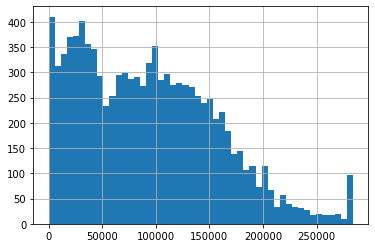

In [315]:
df_types.odometer.hist(bins = 50)

In [316]:
df_clean = df_types.copy() # очищенный df сохраняем в отдельную переменную для дальнейшей работы.

In [317]:
df_types.to_csv('data/df_clean_types_filled.csv') # и сохраним в файл

## Data Visualisation

### Зависимости данных

#### цена/ возраст авто

In [318]:
year_price_df = df_clean.groupby(['year'], as_index = False).agg({'price':'mean'}).rename(columns = {'price':'price_mean'})
year_price_df.head()

,year,price_mean
0,1994.0,14433.571066
1,1995.0,9610.060606
2,1996.0,9362.960000
3,1997.0,7213.666667
4,1998.0,6528.672727


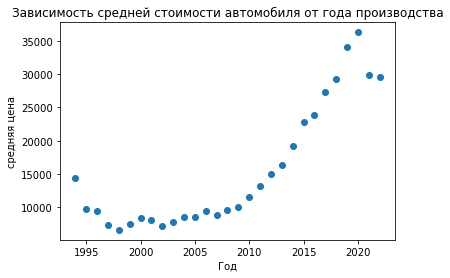

In [319]:
plt.figure()
plt.scatter(year_price_df['year'], year_price_df['price_mean'])
plt.title('Зависимость средней стоимости автомобиля от года производства')
plt.xlabel('Год')
plt.ylabel('средняя цена');

In [320]:
# Видим зависимость цены от года производства. 
# Чем новее авто - тем выше стоимость, за исключением очень старых и очень новых автомобилей.

In [321]:
year_count_df = df_clean.groupby(['year'], as_index = False).count().rename(columns = {'id':'count'})[['year','count']]
year_count_df

,year,count
0,1994.0,394
1,1995.0,33
2,1996.0,25
3,1997.0,45
4,1998.0,55
5,1999.0,82
6,2000.0,79
7,2001.0,123
8,2002.0,149
9,2003.0,185


In [322]:
# данных за 2022 слишком мало, они статистически не значимы. Уберем их.
df_clean2 = df_clean[df_clean['year']< 2022]
df_clean2.head()

,id,url,region,region_url,price,year,model,fuel,title_status,transmission,...,long,lat,date,odometer,paint_color,drive,cylinders,condition,type,manufacturer
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,2500 crew cab big horn,diesel,clean,other,...,-85.250000,35.060000,2021-04-17 16:30:50+00:00,27442.0,silver,4wd,other,good,pickup,ram
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,explorer 4wd 4dr xlt,other,clean,automatic,...,-74.061962,40.821805,2021-05-03 19:40:21+00:00,60023.0,black,4wd,6 cylinders,other,SUV,ford
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,golf r hatchback,gas,clean,other,...,-84.411811,33.779214,2021-04-28 10:52:20+00:00,14048.0,grey,awd,other,good,sedan,volkswagen
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,rav4,gas,clean,automatic,...,-78.655304,35.715954,2021-04-17 14:08:57+00:00,117291.0,white,fwd,other,used,wagon,toyota
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,altima,gas,clean,automatic,...,-73.609700,40.654800,2021-05-03 22:32:06+00:00,8000.0,other,other,4 cylinders,new,other,nissan


In [323]:
year_price_df2 = df_clean2.groupby(['year'], as_index = False).agg({'price':'mean'}).rename(columns = {'price':'price_mean'})
year_price_df2.head()

,year,price_mean
0,1994.0,14433.571066
1,1995.0,9610.060606
2,1996.0,9362.960000
3,1997.0,7213.666667
4,1998.0,6528.672727


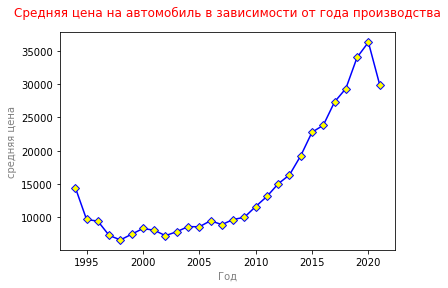

In [324]:
plt.plot(year_price_df2['year'], year_price_df2['price_mean'], color = 'blue', marker = 'D', markerfacecolor = 'yellow')
plt.title('Средняя цена на автомобиль в зависимости от года производства', pad = 16, color = 'red')
plt.xlabel('Год', color = 'gray')
plt.ylabel('средняя цена', color = 'gray');

In [325]:
# На почищенных данных, видим сильную взаимосвязь у сгруппированных данных по годам.
year_price_df2['year'].corr(year_price_df2['price_mean'])

0.8337027518495514

In [326]:
df_clean2.year.corr(df_clean2.price) # а если просто смотреть корреляцию по датафрейму (без группировки и усреднения) - там связь слабее

0.5311004967501453

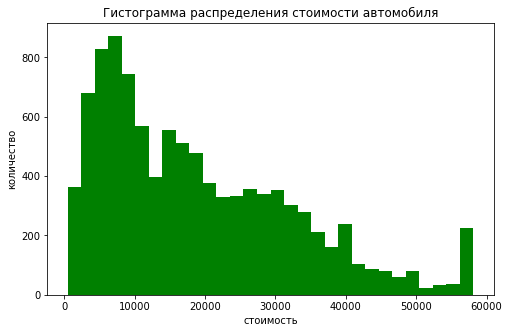

In [327]:
plt.figure(figsize = (8,5))
plt.hist(df_clean2['price'], color = 'green', bins = 30)
plt.title('Гистограмма распределения стоимости автомобиля')
plt.xlabel('стоимость')
plt.ylabel('количество');

#### цена/пробег

In [328]:
df_clean2.info() # Вспомним, какие у нас столбцы есть.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 10049
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9997 non-null   int64              
 1   url             9997 non-null   object             
 2   region          9997 non-null   category           
 3   region_url      9997 non-null   object             
 4   price           9997 non-null   int64              
 5   year            9997 non-null   float64            
 6   model           9997 non-null   object             
 7   fuel            9997 non-null   category           
 8   title_status    9997 non-null   category           
 9   transmission    9997 non-null   category           
 10  description     9997 non-null   object             
 11  state           9997 non-null   category           
 12  price_category  9997 non-null   category           
 13  long            9997 non-null   

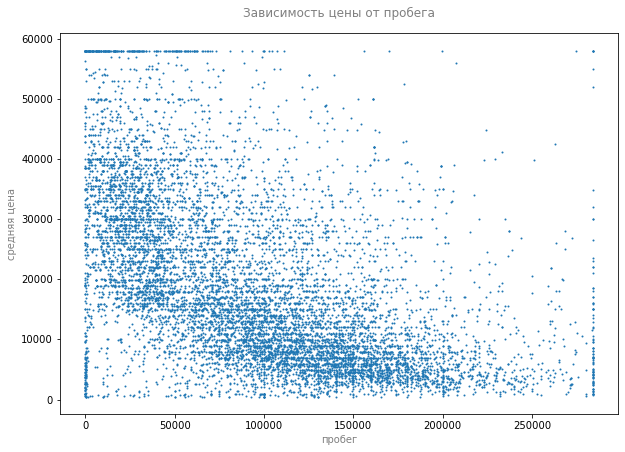

In [329]:
# Интересно посмотреть на зависимость цены от пробега
plt.figure(figsize = (10,7))
plt.scatter(df_clean2['odometer'], df_clean2['price'], s=1.0)
plt.title('Зависимость цены от пробега', pad = 16, color = 'gray')
plt.xlabel('пробег', color = 'gray')
plt.ylabel('средняя цена', color = 'gray');

In [481]:
# Некая зависимость есть (цена/пробег), обратная.
# Благодаря тонкому маркеру, видно, где концентрация точек выше.

In [330]:
# коэфф Пирсона также показывает слабую обратную корреляцию между пробегом и ценой:

df_clean2['odometer'].corr(df_clean2['price']) 

-0.5316364015582549

In [331]:
# То есть если бы мы сделали группировку по пробегу (диапазонами пробегов, например), 
# явно была бы зависимость похожая, как и по годам - только обратная.
# Т.к. очевидно, что пробег и возраст авто имеют обратную зависимость довольно сильную.

#### цена/широта/долгота

In [332]:
df_clean2['lat'].corr(df_clean2['price']) 

-0.014956715938859617

In [333]:
df_clean2['long'].corr(df_clean2['price']) 

-0.07763371746950734

Здесь заметных зависимостей не видно

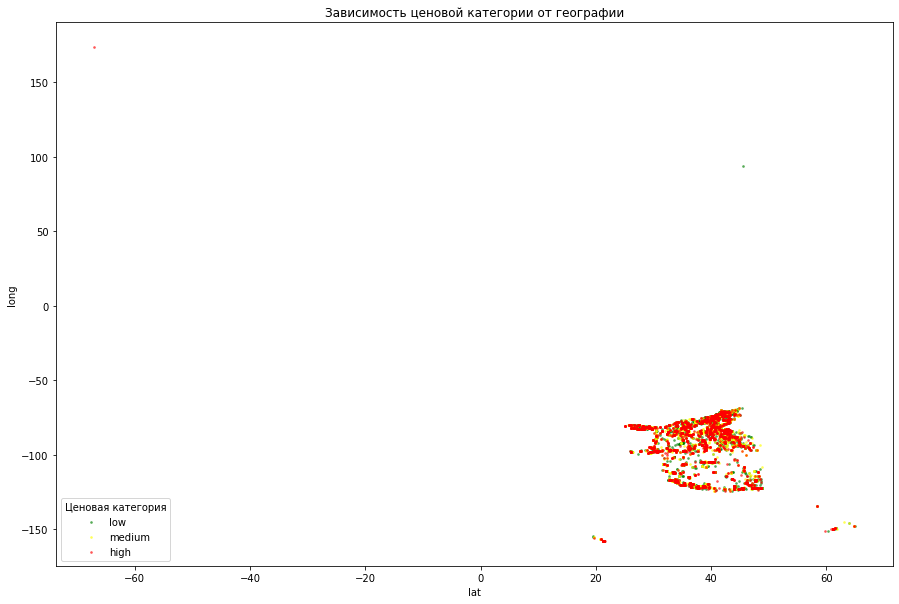

In [334]:
colors = {'low':'green', 'medium': 'yellow', 'high': 'red'}
fig, ax = plt.subplots(figsize = (15, 10))
for price_category in colors:
    color = colors[price_category]
    data = df_clean2[df_clean2['price_category'] == price_category]
    ax.scatter(data['lat'], data['long'], color = color, alpha = 0.5, s= 3.0)
plt.xlabel('lat')
plt.ylabel('long')
plt.title('Зависимость ценовой категории от географии')
plt.legend(colors, title = 'Ценовая категория', loc = 'lower left');

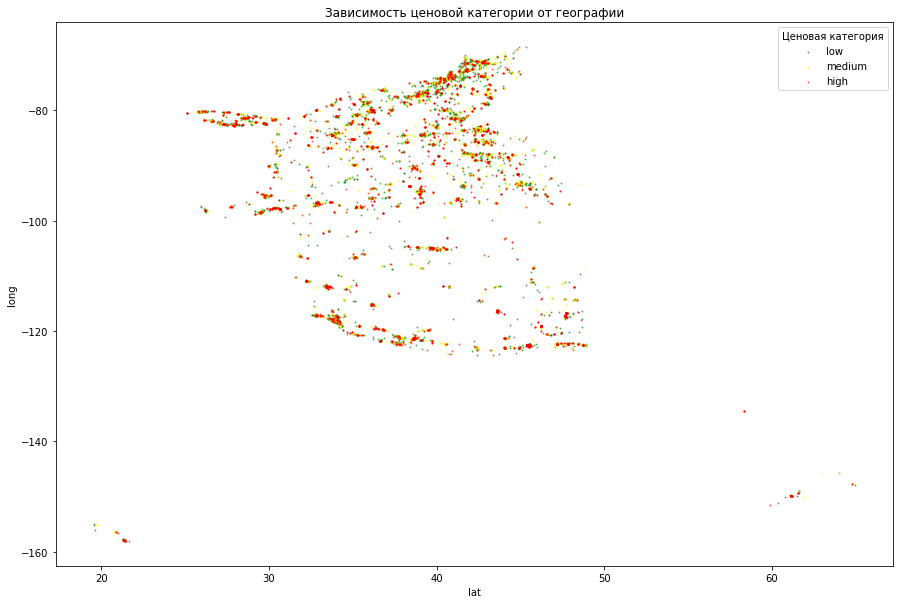

In [335]:
# видно не очень хорошо, т.к. пара выбросов с дальними координатами мешает.
# Уберем их:

fig, ax = plt.subplots(figsize = (15, 10))
for price_category in colors:
    color = colors[price_category]
    data = df_clean2[(df_clean2['price_category'] == price_category)&(df_clean2['lat'] > 0 )\
                     &(df_clean2['long'] < 0 )]
    ax.scatter(data['lat'], data['long'], color = color, alpha = 0.5, s= 1.0)
plt.xlabel('lat')
plt.ylabel('long')
plt.title('Зависимость ценовой категории от географии')
plt.legend(colors, title = 'Ценовая категория', loc = 'upper right');

Это примерно как на карте. Видим, что все ценовые категории географически раскиданы по всем областям присутствия, нет явно выраженных цветовых участков. Зато явно выделяются области, где в принципе больше объявлений о продаже машин.

#### цена/топливо

In [336]:
year_price_df3 = df_clean2.groupby(['fuel'], as_index = False).agg({'price':'mean'}).rename(columns = {'price':'price_mean'})
year_price_df3.head()

,fuel,price_mean
0,diesel,32722.357345
1,electric,27723.681818
2,gas,17114.186465
3,hybrid,14347.008065
4,other,28065.956652


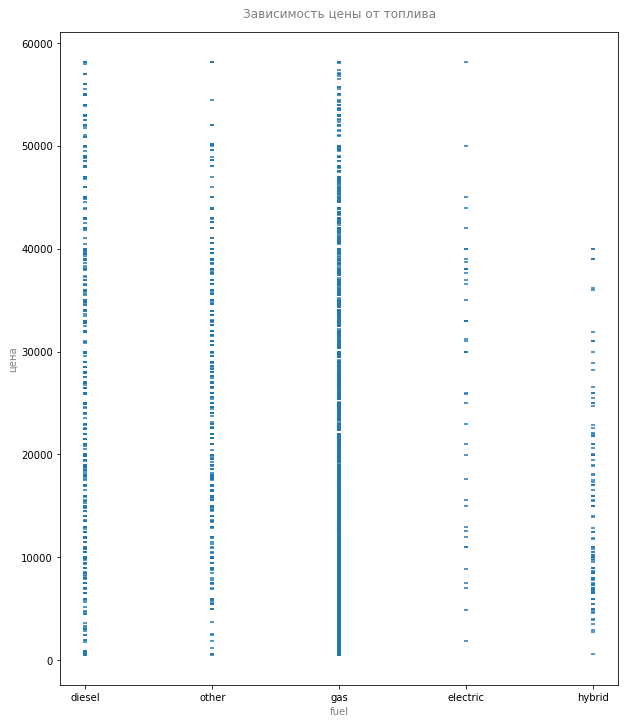

In [337]:
plt.figure(figsize = (10,12))
plt.scatter(df_clean2['fuel'], df_clean2['price'], s= 10.0, marker = '_')
plt.title('Зависимость цены от топлива', pad = 16, color = 'gray')
plt.xlabel('fuel', color = 'gray')
plt.ylabel('цена', color = 'gray');

Text(0, 0.5, 'средняя цена')

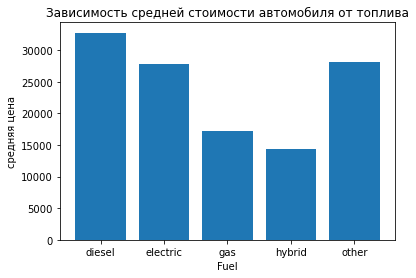

In [338]:
plt.figure()
plt.bar(year_price_df3['fuel'], year_price_df3['price_mean'])
plt.title('Зависимость средней стоимости автомобиля от топлива')
plt.xlabel('Fuel')
plt.ylabel('средняя цена')

Видим из этих диаграмм, что в топливе средние цены заметно различаются, но при этом разбег цен для всех видов топлива очень широкий: гибридные не бывают слишком дорогими, электромобили - тоже редко, а остальные виды топлива встречаются во всех ценовых категориях


#### Статус/ценовая категория

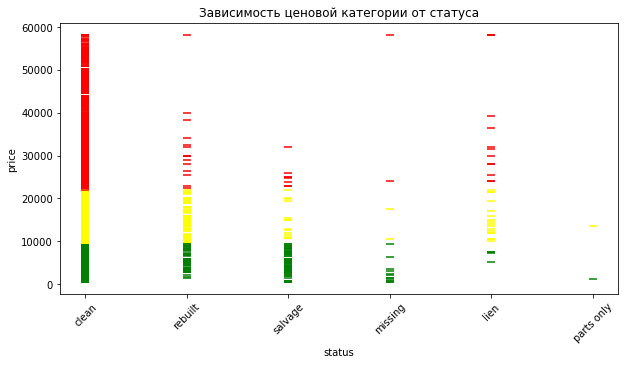

In [339]:
fig, ax = plt.subplots(figsize = (10, 5))
for price_category in colors:
    color = colors[price_category]
    data = df_clean2[(df_clean2['price_category'] == price_category)]
    ax.scatter(data['title_status'], data['price'], color = color,  s= 50.0, marker = '_')
plt.xlabel('status')
plt.ylabel('price')
plt.title('Зависимость ценовой категории от статуса')
plt.xticks(rotation = 45);

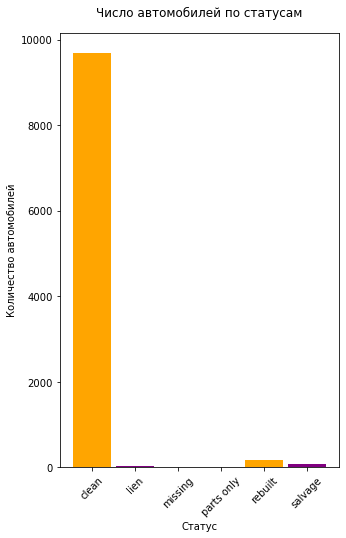

In [340]:
status_count_df = df_clean2.groupby(['title_status'], as_index = False).count().rename(columns = {'id':'count'})[['title_status', 'count']]

plt.figure(figsize = (5, 8))
plt.bar(status_count_df['title_status'], status_count_df['count'],width = 0.9, color = ['orange', 'purple'] )
plt.title('Число автомобилей по статусам', pad = 16)
plt.xlabel('Статус')
plt.ylabel('Количество автомобилей')
plt.xticks(rotation = 45);

### Производители

In [341]:
manuf_count_df = df_clean2.groupby(['manufacturer'], as_index = False).count().rename(columns = {'id':'count'})[['manufacturer', 'count']]
manuf_count_df.head()

,manufacturer,count
0,acura,151
1,alfa-romeo,14
2,audi,207
3,bmw,332
4,buick,149


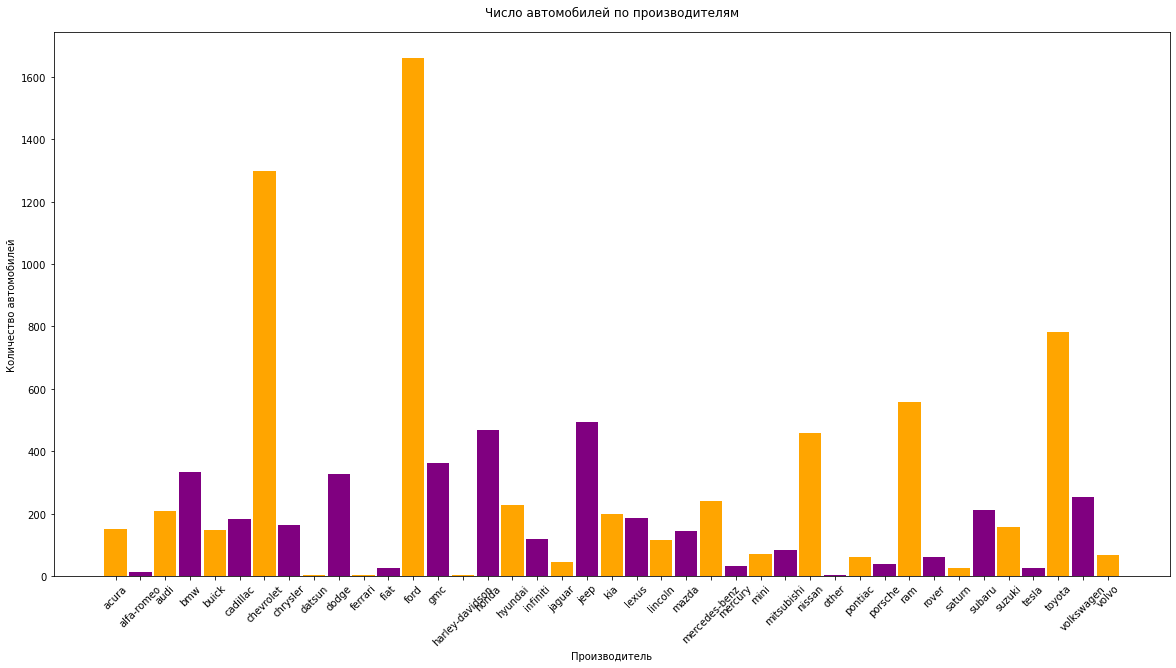

In [342]:
plt.figure(figsize = (20, 10))
plt.bar(manuf_count_df['manufacturer'], manuf_count_df['count'],width = 0.9, color = ['orange', 'purple'] )
plt.title('Число автомобилей по производителям', pad = 16)
plt.xlabel('Производитель')
plt.ylabel('Количество автомобилей')
plt.xticks(rotation = 45);

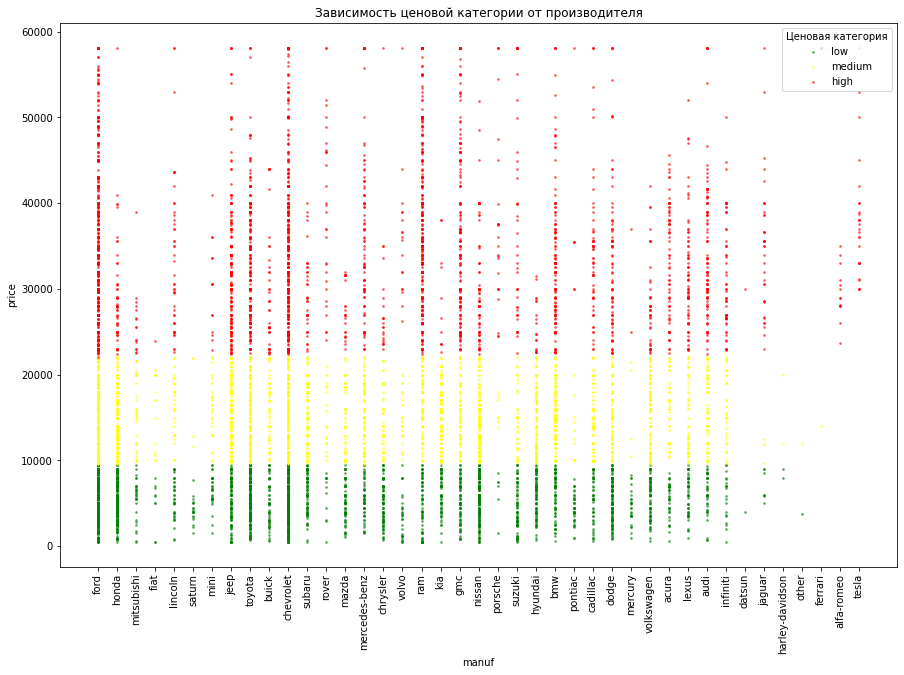

In [343]:
# По числу авто - больше всего фордов, кадиллаков и тойот.
# По цене их еще сравним.

fig, ax = plt.subplots(figsize = (15, 10))
for price_category in colors:
    color = colors[price_category]
    data = df_clean2[(df_clean2['price_category'] == price_category)]
    ax.scatter(data['manufacturer'], data['price'], color = color, alpha = 0.5, s= 3.0)
plt.xlabel('manuf')
plt.ylabel('price')
plt.title('Зависимость ценовой категории от производителя')
plt.legend(colors, title = 'Ценовая категория', loc = 'upper right');
plt.xticks(rotation = 90);

### Коробки передач

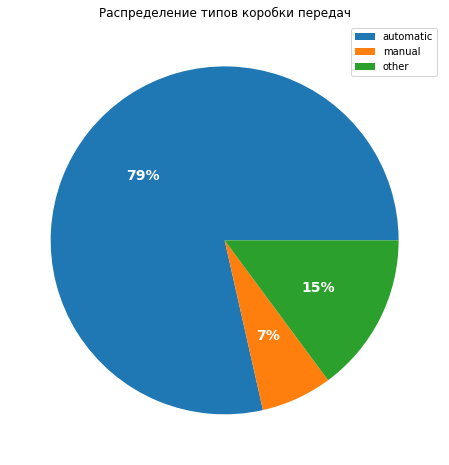

In [344]:
transm_count_df = df_clean2.groupby(['transmission'], as_index = False).count().rename(columns = {'id':'count'})[['transmission','count']]

plt.figure(figsize = (12, 8))
plt.pie(transm_count_df['count'], labels = transm_count_df['transmission'], labeldistance = None, autopct = '%1.0f%%', textprops=dict(color="w", weight = 'bold', fontsize = 14))
plt.legend()
plt.title('Распределение типов коробки передач');

### Матрица корреляций (heatmap)

In [345]:
df_clean2.corr()

,id,price,year,long,lat,odometer
id,1.000000,-0.088582,-0.096535,-0.100721,-0.079029,0.048112
price,-0.088582,1.000000,0.531100,-0.077634,-0.014957,-0.531636
year,-0.096535,0.531100,1.000000,0.007753,-0.032676,-0.504622
long,-0.100721,-0.077634,0.007753,1.000000,-0.164626,0.008419
lat,-0.079029,-0.014957,-0.032676,-0.164626,1.000000,0.025184
odometer,0.048112,-0.531636,-0.504622,0.008419,0.025184,1.000000


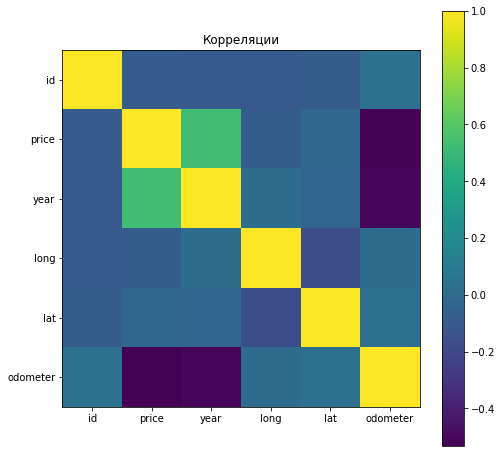

In [346]:
plt.figure(figsize = (8,8))
cols = df_clean2.corr().columns.tolist()
plt.imshow(df_clean2.corr())
plt.title('Корреляции')
plt.xticks(range(0, len(cols)),cols)
plt.yticks(range(0, len(cols)),cols)
plt.colorbar()
plt.show()

Из этой матрицы видим в принципе то же самое, что уже выше выяснили:
цена и год связаны, год и пробег - очевидно связаны, цена и пробег - также связаны.

## Feature Engineering

Для удобства дальнейшей работы с датафреймом, переименуем его, и вспомним, что в нем есть:



In [347]:
data = df_clean2.copy()
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'model', 'fuel',
       'title_status', 'transmission', 'description', 'state',
       'price_category', 'long', 'lat', 'date', 'odometer', 'paint_color',
       'drive', 'cylinders', 'condition', 'type', 'manufacturer'],
      dtype='object')

In [348]:
data.describe()

,id,price,year,long,lat,odometer
count,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,7.311542e+09,18964.842353,2011.692308,-94.046099,38.578292,93341.505476
std,4.477721e+06,13691.187451,6.519184,18.098574,5.832012,63221.729871
min,7.208550e+09,500.000000,1994.000000,-158.069300,-67.144243,0.000000
25%,7.308189e+09,7900.000000,2008.000000,-108.572700,34.832550,39058.000000
50%,7.312759e+09,15749.000000,2013.000000,-87.947800,39.256400,88542.000000
75%,7.315275e+09,27990.000000,2017.000000,-80.740000,42.402740,137000.000000
max,7.317090e+09,58125.000000,2021.000000,173.885502,64.947500,283918.000000


In [349]:
for col in data.columns:
    print(col, ' - ', data[col].nunique(), 'уникальных значений', '\n')

id  -  9997 уникальных значений 

url  -  9997 уникальных значений 

region  -  393 уникальных значений 

region_url  -  405 уникальных значений 

price  -  2087 уникальных значений 

year  -  28 уникальных значений 

model  -  3465 уникальных значений 

fuel  -  5 уникальных значений 

title_status  -  6 уникальных значений 

transmission  -  3 уникальных значений 

description  -  9843 уникальных значений 

state  -  51 уникальных значений 

price_category  -  3 уникальных значений 

long  -  5130 уникальных значений 

lat  -  5097 уникальных значений 

date  -  9909 уникальных значений 

odometer  -  6956 уникальных значений 

paint_color  -  15 уникальных значений 

drive  -  6 уникальных значений 

cylinders  -  8 уникальных значений 

condition  -  10 уникальных значений 

type  -  13 уникальных значений 

manufacturer  -  41 уникальных значений 



In [350]:
data.shape # ранее убирали строки с авто 2022 года, поэтому менее 10 тыс строк.

(9997, 23)

### Сокращенная модель автомобиля

In [351]:
# Заведем короткий столбец с названием модели

data['short_model'] = data.model.str.lower().str.split(' ').str[0]

# И сразу проверим, не попались ли там строки, начинающиеся с пробела

data[data['short_model'] == ''].short_model.sum()

0

In [352]:
# Строка с коротким названием модели создалась, пустых значений нет

data.short_model.nunique()

938

In [353]:
# в 3,5 раза сократилось число моделей в датафрейме.

data.short_model.value_counts()

silverado    416
wrangler     210
grand        210
f-150        208
1500         206
            ... 
mazda6i        1
soul+          1
525i           1
defender       1
durangon       1
Name: short_model, Length: 938, dtype: int64

### Признак длины описания

In [354]:
data['desc_len'] = data.apply(lambda x: len(x.description), axis = 1)
data.head()

,id,url,region,region_url,price,year,model,fuel,title_status,transmission,...,date,odometer,paint_color,drive,cylinders,condition,type,manufacturer,short_model,desc_len
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,2500 crew cab big horn,diesel,clean,other,...,2021-04-17 16:30:50+00:00,27442.0,silver,4wd,other,good,pickup,ram,2500,4482
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,explorer 4wd 4dr xlt,other,clean,automatic,...,2021-05-03 19:40:21+00:00,60023.0,black,4wd,6 cylinders,other,SUV,ford,explorer,968
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,golf r hatchback,gas,clean,other,...,2021-04-28 10:52:20+00:00,14048.0,grey,awd,other,good,sedan,volkswagen,golf,4286
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,rav4,gas,clean,automatic,...,2021-04-17 14:08:57+00:00,117291.0,white,fwd,other,used,wagon,toyota,rav4,3241
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,altima,gas,clean,automatic,...,2021-05-03 22:32:06+00:00,8000.0,other,other,4 cylinders,new,other,nissan,altima,538


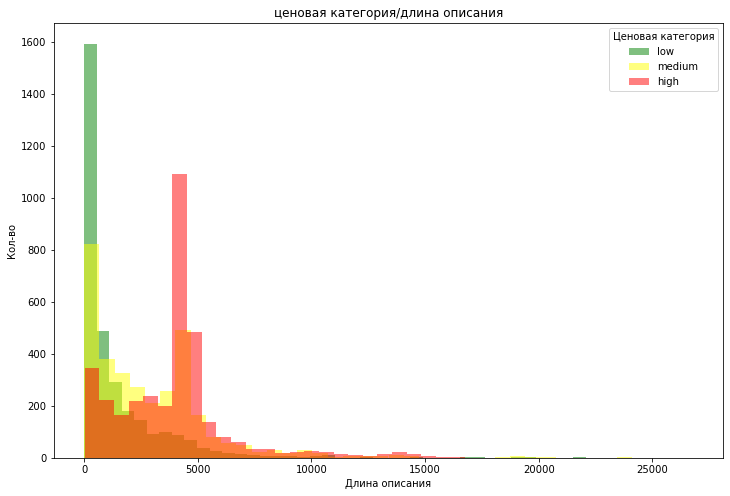

In [355]:
# Посмотрим, на связь длины описания и ценовую категорию:

fig, ax = plt.subplots(figsize = (12, 8))
for price_category in colors:
    color = colors[price_category]
    data1 = data[data['price_category'] == price_category]
    ax.hist(data1['desc_len'], color = color, alpha = 0.5, bins = 40)
plt.xlabel('Длина описания')
plt.ylabel('Кол-во')
plt.title('ценовая категория/длина описания')
plt.legend(colors, title = 'Ценовая категория');

In [173]:
# Распределение по ценовым категориям явно различается, признак может быть полезен для моделирования

### Возрастная категория 

In [356]:
# Заведем новый категориальный столбец "возрастная категория авто":

data['age_category'] =  data.apply(lambda x: "new" if x.year > 2013 else ("old" if x.year < 2006 else "average"), axis=1)
data['age_category'] = data['age_category'].astype('category')
data['age_category']

0            new
1            new
2            new
3        average
4            new
          ...   
10045        old
10046    average
10047    average
10048        new
10049        new
Name: age_category, Length: 9997, dtype: category
Categories (3, object): ['average', 'new', 'old']

In [357]:
data['short_model'] = data['short_model'].astype('category')
data['age_category'] = data['age_category'].astype('category')

### Категориальные данные

In [358]:
data.dtypes

id                              int64
url                            object
region                       category
region_url                     object
price                           int64
year                          float64
model                          object
fuel                         category
title_status                 category
transmission                 category
description                    object
state                        category
price_category               category
long                          float64
lat                           float64
date              datetime64[ns, UTC]
odometer                      float64
paint_color                  category
drive                        category
cylinders                    category
condition                    category
type                         category
manufacturer                 category
short_model                  category
desc_len                        int64
age_category                 category
dtype: objec

In [359]:
data[['short_model', 'title_status', 'transmission', 'price_category', 'region', 'fuel',
      'state', 'paint_color', 'drive', 'cylinders', 'condition', 'type', 'manufacturer', 'age_category']].nunique()

short_model       938
title_status        6
transmission        3
price_category      3
region            393
fuel                5
state              51
paint_color        15
drive               6
cylinders           8
condition          10
type               13
manufacturer       41
age_category        3
dtype: int64

In [360]:
data_ohe = data.copy()

In [361]:
ohe = OneHotEncoder(sparse = False)
ohe

OneHotEncoder(sparse=False)

In [362]:
data1 = data[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'fuel', 'age_category', 
              'paint_color', 'drive', 'cylinders', 'condition', 'type']]

In [363]:
data1.head()

,short_model,transmission,region,manufacturer,state,title_status,fuel,age_category,paint_color,drive,cylinders,condition,type
0,2500,other,chattanooga,ram,tn,clean,diesel,new,silver,4wd,other,good,pickup
1,explorer,automatic,north jersey,ford,nj,clean,other,new,black,4wd,6 cylinders,other,SUV
2,golf,other,reno / tahoe,volkswagen,ca,clean,gas,new,grey,awd,other,good,sedan
3,rav4,automatic,fayetteville,toyota,nc,clean,gas,average,white,fwd,other,used,wagon
4,altima,automatic,new york city,nissan,ny,clean,gas,new,other,other,4 cylinders,new,other


In [364]:
ohe.fit(data1) 

OneHotEncoder(sparse=False)

In [365]:
ohe_tranform_data = ohe.transform(data1)
ohe_tranform_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [366]:
ohe_tranform_data.shape

(9997, 1492)

In [367]:
ohelist = ohe.get_feature_names_out()
ohelist

array(['short_model_-benz', 'short_model_1', 'short_model_124', ...,
       'type_truck', 'type_van', 'type_wagon'], dtype=object)

In [369]:
data_ohe[ohelist] = ohe_tranform_data.copy() 

In [370]:
data_ohe.head()

,id,url,region,region_url,price,year,model,fuel,title_status,transmission,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,2500 crew cab big horn,diesel,clean,other,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,explorer 4wd 4dr xlt,other,clean,automatic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,golf r hatchback,gas,clean,other,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,rav4,gas,clean,automatic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,altima,gas,clean,automatic,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [371]:
ohe.inverse_transform(ohe_tranform_data) #обратное преобразование посмотрим

array([['2500', 'other', 'chattanooga', ..., 'other', 'good', 'pickup'],
       ['explorer', 'automatic', 'north jersey', ..., '6 cylinders',
        'other', 'SUV'],
       ['golf', 'other', 'reno / tahoe', ..., 'other', 'good', 'sedan'],
       ...,
       ['a3', 'automatic', 'salem', ..., '4 cylinders', 'other', 'wagon'],
       ['cayenne', 'automatic', 'madison', ..., '6 cylinders', 'good',
        'wagon'],
       ['1500', 'other', 'norfolk / hampton roads', ..., '8 cylinders',
        'good', 'pickup']], dtype=object)

Категориальные данные преобразовали в новые фичи

### Нормализация данных

In [372]:
# Стандартизируем числовые фичи.

data2 = data[['lat', 'long', 'year', 'odometer', 'desc_len']]
data2.head()

,lat,long,year,odometer,desc_len
0,35.060000,-85.250000,2020.0,27442.0,4482
1,40.821805,-74.061962,2016.0,60023.0,968
2,33.779214,-84.411811,2017.0,14048.0,4286
3,35.715954,-78.655304,2013.0,117291.0,3241
4,40.654800,-73.609700,2021.0,8000.0,538


In [373]:
std_scaler = StandardScaler()

In [374]:
std_scaler.fit(data2)

StandardScaler()

In [375]:
std_scaled = std_scaler.transform(data2)
std_scaled

array([[-0.60330259,  0.48603489,  1.27440926, -1.04240744,  0.60640831],
       [ 0.38470857,  1.10423815,  0.6608048 , -0.5270367 , -0.65932567],
       [-0.82292663,  0.53234963,  0.81420592, -1.25427558,  0.5358096 ],
       ...,
       [ 1.08846365, -1.5989161 , -0.10620077,  0.8991424 , -0.68057732],
       [ 0.76328535,  0.25684537,  0.50740369, -0.49666588,  0.30456281],
       [-0.32722626,  0.98057371,  0.81420592, -0.90828545,  0.60676851]])

In [377]:
data_ohe[['lat_std', 'long_std', 'year_std', 'odometer_std', 'desc_len_std']] = std_scaled.copy()
data_ohe.head()

,id,url,region,region_url,price,year,model,fuel,title_status,transmission,...,type_pickup,type_sedan,type_truck,type_van,type_wagon,lat_std,long_std,year_std,odometer_std,desc_len_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,2500 crew cab big horn,diesel,clean,other,...,1.0,0.0,0.0,0.0,0.0,-0.603303,0.486035,1.274409,-1.042407,0.606408
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,explorer 4wd 4dr xlt,other,clean,automatic,...,0.0,0.0,0.0,0.0,0.0,0.384709,1.104238,0.660805,-0.527037,-0.659326
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,golf r hatchback,gas,clean,other,...,0.0,1.0,0.0,0.0,0.0,-0.822927,0.532350,0.814206,-1.254276,0.535810
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,rav4,gas,clean,automatic,...,0.0,0.0,0.0,0.0,1.0,-0.490822,0.850430,0.200601,0.378836,0.159403
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,altima,gas,clean,automatic,...,0.0,0.0,0.0,0.0,0.0,0.356071,1.129228,1.427810,-1.349944,-0.814211


In [378]:
df_ml = data_ohe.drop(['lat', 'long', 'year', 'odometer', 'desc_len', 'short_model', 'title_status', 'transmission', 'region', 'fuel',
      'state', 'paint_color', 'drive', 'cylinders', 'condition', 'type', 'manufacturer', 'age_category'],axis = 1)
df_ml.columns

Index(['id', 'url', 'region_url', 'price', 'model', 'description',
       'price_category', 'date', 'short_model_-benz', 'short_model_1',
       ...
       'type_pickup', 'type_sedan', 'type_truck', 'type_van', 'type_wagon',
       'lat_std', 'long_std', 'year_std', 'odometer_std', 'desc_len_std'],
      dtype='object', length=1505)

In [379]:
df_ml = df_ml.drop(['id', 'url', 'region_url', 'price'], axis = 1)

In [380]:
df_ml = df_ml.drop(['model'], axis = 1)

In [381]:
df_ml = df_ml.drop(['description'], axis = 1)

In [382]:
df_ml.columns

Index(['price_category', 'date', 'short_model_-benz', 'short_model_1',
       'short_model_124', 'short_model_128i', 'short_model_135i',
       'short_model_1500', 'short_model_163869', 'short_model_1928',
       ...
       'type_pickup', 'type_sedan', 'type_truck', 'type_van', 'type_wagon',
       'lat_std', 'long_std', 'year_std', 'odometer_std', 'desc_len_std'],
      dtype='object', length=1499)

In [383]:
# Т.к. все даты объявлений - за 1 месяц практичесик, то скорее всего это не влияет на ценовую категорию авто.
# Даты тоже уберем..

df_ml = df_ml.drop(['date'], axis = 1)

In [384]:
df_ml.to_csv('data/df_prepared.csv')

### Можно еще найти фичи?

In [385]:
# Возможно есть еще фичи, которые можно вытащить из описаний исходного датафрейма. Попробуме проверить паруз гипотез.

# Зададим функцию, которая поможет нам быстро проверить пару гипотез, можно ли вытащить еще какую-то фичу из описаний:

def find_feature_in_description(df, feature_words):
    
    feature_word_count = {w:0 for w in feature_words}  # в этот словарь соберется статистика по словам из feature_words о числе их упоминаний
    feature_count = 0  # в эту переменную соберем статистику - сколько строк содержат хоть одно упоминание слов данной фичи
    
    indicator_feature_in_i = 0 # рабочий индикатор функции
    
    for i in df.index:
        for word in feature_words:
            if str(df.loc[i, 'description']).lower().find(word) != -1:
                feature_word_count[word] +=1
                indicator_feature_in_i = 1
                
        feature_count = feature_count + indicator_feature_in_i
        indicator_feature_in_i = 0
    return feature_count, feature_word_count
            

In [386]:
# проверим срочную продажу
find = find_feature_in_description(data, ['sell fast', 'hot sale', 'fast sale', 'fast sell', 'urgent sale', 
                                   'quick sale', 'sell urgent', 'sell quick', 'sell urgent'])
print(find)

if find[0]< 5000:
    print('This feature can not be generated, information is not enough')
else:
    print('Well... may be that is a good idea. Lets think about it!')

(89, {'sell fast': 52, 'hot sale': 0, 'fast sale': 1, 'fast sell': 0, 'urgent sale': 0, 'quick sale': 12, 'sell urgent': 0, 'sell quick': 24})
This feature can not be generated, information is not enough


In [387]:
# проверим инфо о двигателях

find = find_feature_in_description(data, ['engine', 'motor'])
print(find)

if find[0]< 5000:
    print('This feature can not be generated, information is not enough')
else:
    print('Well... may be that is a good idea. Lets think about it!')

(7007, {'engine': 6605, 'motor': 1698})
Well... may be that is a good idea. Lets think about it!


In [388]:
# Проверим еще интерьер

find = find_feature_in_description(data, ['interior'])
print(find)

if find[0]< 5000:
    print('This feature can not be generated, information is not enough')
else:
    print('Well... may be that is a good idea. Lets think about it!')

(5857, {'interior': 5857})
Well... may be that is a good idea. Lets think about it!


In [389]:
# проверим способы оплаты
find = find_feature_in_description(data, ['only cash', 'any credit type', 'credit card', 'checks', 'debits', 'check', 'debit', 'loan',
                                          'no check', 'pay method', 'transaction', 'paying method', 'no cash', 'any pay type', 'no loan',
                                          ' cash', 'credit', 'no debit', 'no credit',  'any paying method', 'any pay method', 'any transaction'])
print(find)

if find[0]< 5000:
    print('This feature can not be generated, information is not enough')
else:
    print('Well... may be that is a good idea. Lets think about it!')

(5906, {'only cash': 4, 'any credit type': 2, 'credit card': 239, 'checks': 92, 'debits': 0, 'check': 3868, 'debit': 63, 'loan': 2450, 'no check': 52, 'pay method': 0, 'transaction': 191, 'paying method': 0, 'no cash': 2, 'any pay type': 0, 'no loan': 1, ' cash': 1123, 'credit': 4985, 'no debit': 1, 'no credit': 1834, 'any paying method': 0, 'any pay method': 0, 'any transaction': 1})
Well... may be that is a good idea. Lets think about it!


In [390]:
# проверим сборы
find = find_feature_in_description(data, [' tax', ':tax', '.tax', 'includes tax', 'excludes tax', 'taxes included', 'taxes excluded',
                                         'tax included', 'tax excluded', 'with tax', 'no tax'])
print(find)

if find[0]< 5000:
    print('This feature can not be generated, information is not enough')
else:
    print('Well... may be that is a good idea. Lets think about it!')

(3636, {' tax': 3635, ':tax': 0, '.tax': 2, 'includes tax': 4, 'excludes tax': 1668, 'taxes included': 1, 'taxes excluded': 0, 'tax included': 0, 'tax excluded': 0, 'with tax': 6, 'no tax': 11})
This feature can not be generated, information is not enough


In [391]:
# проверим interior

find = find_feature_in_description(data, ['interior', 'interior color', 'interior material', 'interior is'])
print(find)

if find[0]< 5000:
    print('This feature can not be generated, information is not enough')
else:
    print('Well... may be that is a good idea. Lets think about it!')

(5857, {'interior': 5857, 'interior color': 3455, 'interior material': 1, 'interior is': 211})
Well... may be that is a good idea. Lets think about it!


In [392]:
# и проверим контактные данные
find = find_feature_in_description(data, ['call us', 'phone', 'phone number', 'telephone'])
print(find)

if find[0]< 5000:
    print('This feature can not be generated, information is not enough')
else:
    print('Well... may be that is a good idea. Lets think about it!')

(4804, {'call us': 2974, 'phone': 3904, 'phone number': 2101, 'telephone': 1702})
This feature can not be generated, information is not enough


In [393]:
# Торг уместен?

find = find_feature_in_description(data, ['bargaining is appropriate', 'no trade', 'trade is appropriate', 'reduce price', 'bargain'])
print(find)

if find[0]< 5000:
    print('This feature can not be generated, information is not enough')
else:
    print('Well... may be that is a good idea. Lets think about it!')

(77, {'bargaining is appropriate': 0, 'no trade': 66, 'trade is appropriate': 0, 'reduce price': 0, 'bargain': 11})
This feature can not be generated, information is not enough


#### Engine

In [394]:
data.loc[3052,'description']

"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can get the car you want, and trade in your old one, while avoiding person-to-person contact with our friendly advocates. There are some things that can’t be put off. And if buying a car is one of them, know that we’re doing everything we can to keep you keep moving while continuing to put your health safety, and happiness first. Vehicle Stock# 2000923271📱 Want to instantly check this car’s availability? Call us at  508-443-9377Just text that stock number to 855-976-4304 or head to http://www.carvanaauto.com/7063990-74732 and plug it into the search bar!Get PRE-QUALIFIED for your auto loan in 2 minut

In [395]:
string = str(data.loc[1,'description']).lower()

In [396]:
result = re.findall(r'engine.*(\d{1}.\d{1}l{1})',string)
result

[]

In [397]:
data['engine'] = data.apply(lambda _: 'other', axis=1)


In [398]:
data

,id,url,region,region_url,price,year,model,fuel,title_status,transmission,...,paint_color,drive,cylinders,condition,type,manufacturer,short_model,desc_len,age_category,engine
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,2500 crew cab big horn,diesel,clean,other,...,silver,4wd,other,good,pickup,ram,2500,4482,new,other
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,explorer 4wd 4dr xlt,other,clean,automatic,...,black,4wd,6 cylinders,other,SUV,ford,explorer,968,new,other
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,golf r hatchback,gas,clean,other,...,grey,awd,other,good,sedan,volkswagen,golf,4286,new,other
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,rav4,gas,clean,automatic,...,white,fwd,other,used,wagon,toyota,rav4,3241,average,other
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,altima,gas,clean,automatic,...,other,other,4 cylinders,new,other,nissan,altima,538,new,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002.0,rav4,gas,clean,automatic,...,white,4wd,4 cylinders,good,SUV,toyota,rav4,1710,old,other
10046,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008.0,wrangler,gas,clean,other,...,grey,4wd,6 cylinders,good,SUV,jeep,wrangler,948,average,other
10047,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011.0,a3 2.0t premium plus pzev,gas,clean,automatic,...,black,fwd,4 cylinders,other,wagon,audi,a3,909,average,other
10048,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015.0,cayenne,hybrid,clean,automatic,...,brown,4wd,6 cylinders,good,wagon,porsche,cayenne,3644,new,other


In [399]:
for i in list(data.index):
    if len(re.findall(r'engine.{0,20}(\d{1}\.\d{1}l{1})[\.\,\;\s]',str(data.loc[i,'description']).lower()))>0:
        data.loc[i,'engine'] = re.findall(r'engine.{0,20}(\d{1}\.\d{1}l{1})[\.\,\;\s]',str(data.loc[i,'description']).lower())[0]
    else:
        continue

In [400]:
data[data.engine != 'other']

,id,url,region,region_url,price,year,model,fuel,title_status,transmission,...,paint_color,drive,cylinders,condition,type,manufacturer,short_model,desc_len,age_category,engine
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,2500 crew cab big horn,diesel,clean,other,...,silver,4wd,other,good,pickup,ram,2500,4482,new,6.7l
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,golf r hatchback,gas,clean,other,...,grey,awd,other,good,sedan,volkswagen,golf,4286,new,2.0l
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,rav4,gas,clean,automatic,...,white,fwd,other,used,wagon,toyota,rav4,3241,average,2.5l
8,7315031640,https://grandrapids.craigslist.org/ctd/d/wyomi...,grand rapids,https://grandrapids.craigslist.org,14000,2014.0,charger,gas,clean,automatic,...,grey,rwd,other,used,sedan,dodge,charger,1823,new,3.6l
13,7317089086,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,14995,1994.0,e-series van universal by glaval designer luxu...,gas,clean,automatic,...,blue,rwd,8 cylinders,other,van,ford,e-series,2874,old,5.8l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10043,7315504125,https://appleton.craigslist.org/ctd/d/fond-du-...,appleton-oshkosh-FDL,https://appleton.craigslist.org,8999,2013.0,grand caravan,gas,clean,automatic,...,custom,fwd,other,excellent,mini-van,dodge,grand,4854,average,3.6l
10046,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008.0,wrangler,gas,clean,other,...,grey,4wd,6 cylinders,good,SUV,jeep,wrangler,948,average,3.8l
10047,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011.0,a3 2.0t premium plus pzev,gas,clean,automatic,...,black,fwd,4 cylinders,other,wagon,audi,a3,909,average,2.0l
10048,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015.0,cayenne,hybrid,clean,automatic,...,brown,4wd,6 cylinders,good,wagon,porsche,cayenne,3644,new,3.0l


In [401]:
# заполнили 39% объемов двигателя. Попробуем еще с помощью motor:

for i in list(data[data.engine == 'other'].index):
    if len(re.findall(r'motor.{0,20}(\d{1}\.\d{1}l{1})[\.\,\;\s]',str(data.loc[i,'description']).lower()))>0:
        data.loc[i,'engine'] = re.findall(r'motor.{0,20}(\d{1}\.\d{1}l{1})[\.\,\;\s]',str(data.loc[i,'description']).lower())[0]
    else:
        continue

In [402]:
data[data.engine != 'other']

,id,url,region,region_url,price,year,model,fuel,title_status,transmission,...,paint_color,drive,cylinders,condition,type,manufacturer,short_model,desc_len,age_category,engine
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,2500 crew cab big horn,diesel,clean,other,...,silver,4wd,other,good,pickup,ram,2500,4482,new,6.7l
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,golf r hatchback,gas,clean,other,...,grey,awd,other,good,sedan,volkswagen,golf,4286,new,2.0l
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,rav4,gas,clean,automatic,...,white,fwd,other,used,wagon,toyota,rav4,3241,average,2.5l
8,7315031640,https://grandrapids.craigslist.org/ctd/d/wyomi...,grand rapids,https://grandrapids.craigslist.org,14000,2014.0,charger,gas,clean,automatic,...,grey,rwd,other,used,sedan,dodge,charger,1823,new,3.6l
13,7317089086,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,14995,1994.0,e-series van universal by glaval designer luxu...,gas,clean,automatic,...,blue,rwd,8 cylinders,other,van,ford,e-series,2874,old,5.8l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10043,7315504125,https://appleton.craigslist.org/ctd/d/fond-du-...,appleton-oshkosh-FDL,https://appleton.craigslist.org,8999,2013.0,grand caravan,gas,clean,automatic,...,custom,fwd,other,excellent,mini-van,dodge,grand,4854,average,3.6l
10046,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008.0,wrangler,gas,clean,other,...,grey,4wd,6 cylinders,good,SUV,jeep,wrangler,948,average,3.8l
10047,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011.0,a3 2.0t premium plus pzev,gas,clean,automatic,...,black,fwd,4 cylinders,other,wagon,audi,a3,909,average,2.0l
10048,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015.0,cayenne,hybrid,clean,automatic,...,brown,4wd,6 cylinders,good,wagon,porsche,cayenne,3644,new,3.0l


In [403]:
# Теперь сделаем то же самое, но для целых чисел литража:

for i in list(data[data.engine == 'other'].index):
    if len(re.findall(r'engine.{0,20}(\d{1,2}l{1})[\.\,\;\s]',str(data.loc[i,'description']).lower()))>0:
        data.loc[i,'engine'] = re.findall(r'engine.{0,20}(\d{1,2}l{1})[\.\,\;\s]',str(data.loc[i,'description']).lower())[0]
    else:
        continue

In [404]:
for i in list(data[data.engine == 'other'].index):
    if len(re.findall(r'motor.{0,20}(\d{1,2}l{1})[\.\,\;\s]',str(data.loc[i,'description']).lower()))>0:
        data.loc[i,'engine'] = re.findall(r'motor.{0,20}(\d{1,2}l{1})[\.\,\;\s]',str(data.loc[i,'description']).lower())[0]
    else:
        continue

In [405]:
data[data.engine != 'other']

,id,url,region,region_url,price,year,model,fuel,title_status,transmission,...,paint_color,drive,cylinders,condition,type,manufacturer,short_model,desc_len,age_category,engine
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,2500 crew cab big horn,diesel,clean,other,...,silver,4wd,other,good,pickup,ram,2500,4482,new,6.7l
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,golf r hatchback,gas,clean,other,...,grey,awd,other,good,sedan,volkswagen,golf,4286,new,2.0l
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,rav4,gas,clean,automatic,...,white,fwd,other,used,wagon,toyota,rav4,3241,average,2.5l
8,7315031640,https://grandrapids.craigslist.org/ctd/d/wyomi...,grand rapids,https://grandrapids.craigslist.org,14000,2014.0,charger,gas,clean,automatic,...,grey,rwd,other,used,sedan,dodge,charger,1823,new,3.6l
13,7317089086,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,14995,1994.0,e-series van universal by glaval designer luxu...,gas,clean,automatic,...,blue,rwd,8 cylinders,other,van,ford,e-series,2874,old,5.8l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10043,7315504125,https://appleton.craigslist.org/ctd/d/fond-du-...,appleton-oshkosh-FDL,https://appleton.craigslist.org,8999,2013.0,grand caravan,gas,clean,automatic,...,custom,fwd,other,excellent,mini-van,dodge,grand,4854,average,3.6l
10046,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008.0,wrangler,gas,clean,other,...,grey,4wd,6 cylinders,good,SUV,jeep,wrangler,948,average,3.8l
10047,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011.0,a3 2.0t premium plus pzev,gas,clean,automatic,...,black,fwd,4 cylinders,other,wagon,audi,a3,909,average,2.0l
10048,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015.0,cayenne,hybrid,clean,automatic,...,brown,4wd,6 cylinders,good,wagon,porsche,cayenne,3644,new,3.0l


In [406]:
data[data.engine == 'other']

,id,url,region,region_url,price,year,model,fuel,title_status,transmission,...,paint_color,drive,cylinders,condition,type,manufacturer,short_model,desc_len,age_category,engine
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,explorer 4wd 4dr xlt,other,clean,automatic,...,black,4wd,6 cylinders,other,SUV,ford,explorer,968,new,other
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,altima,gas,clean,automatic,...,other,other,4 cylinders,new,other,nissan,altima,538,new,other
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012.0,1 series 128i coupe 2d,other,clean,other,...,black,other,other,good,coupe,bmw,1,4851,average,other
6,7316793777,https://desmoines.craigslist.org/ctd/d/martens...,des moines,https://desmoines.craigslist.org,6700,2015.0,fusion se,gas,clean,automatic,...,other,fwd,4 cylinders,good,other,ford,fusion,344,new,other
7,7311645793,https://roanoke.craigslist.org/ctd/d/roanoke-2...,roanoke,https://roanoke.craigslist.org,3990,2003.0,accord,gas,clean,automatic,...,white,other,6 cylinders,other,SUV,honda,accord,1533,old,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10039,7315173150,https://orangecounty.craigslist.org/cto/d/foun...,orange county,https://orangecounty.craigslist.org,10500,2007.0,gs350,gas,clean,automatic,...,blue,other,6 cylinders,excellent,sedan,lexus,gs350,405,average,other
10040,7316175335,https://orangecounty.craigslist.org/cto/d/hunt...,orange county,https://orangecounty.craigslist.org,1575,1994.0,1988 Nisan,gas,clean,manual,...,red,rwd,4 cylinders,good,coupe,nissan,1988,692,old,other
10041,7314767318,https://kalamazoo.craigslist.org/ctd/d/otsego-...,kalamazoo,https://kalamazoo.craigslist.org,20995,2013.0,f-150,gas,clean,automatic,...,blue,4wd,other,used,van,ford,f-150,4441,average,other
10044,7305898015,https://fayar.craigslist.org/ctd/d/lowell-2015...,fayetteville,https://fayar.craigslist.org,22900,2015.0,1500,diesel,clean,automatic,...,red,4wd,other,other,pickup,ram,1500,786,new,other


In [407]:
data.engine.unique()

array(['6.7l', 'other', '2.0l', '2.5l', '3.6l', '5.8l', '7.5l', '5.4l',
       '1.6l', '5.3l', '2.4l', '4.3l', '3.5l', '3.2l', '0l', '5.7l',
       '6.2l', '1.8l', '1.5l', '6.4l', '4.4l', '3.0l', '5.6l', '1.4l',
       '1.7l', '6.6l', '6.0l', '2l', '2.3l', '3.3l', '4.0l', '3.7l',
       '5.5l', '8.1l', '5.9l', '5.0l', '4.8l', '3.9l', '6.8l', '3.8l',
       '4.7l', '7.0l', '4.6l', '6.1l', '3.4l', '2.7l', '3l', '1.3l',
       '1.0l', '2.2l', '4l', '7.6l', '4.2l', '1.9l', '2.9l', '2.1l',
       '6.3l', '7.3l', '2.8l', '2.6l', '6l', '4.9l', '7.4l', '1.2l',
       '7.2l', '8.0l', '5l', '7.7l'], dtype=object)

In [408]:
data.loc[215, 'description'] # вот пример другого формата данных о двигателе

'$17,995  Fully Restored 1977 Jeep Wrangler CJ5 Almost every part brand new. Only 2 owners.  Engine 304 V8  Front 8,000lb wench  BRAND new shocks, tires, rims, lift kit, brakes, leaf springs, gas tank, brake lines, radiator, gas tank, bumpers, seat belts, carpet, console, Bimini cover, tonneau cover, windshield, lights.  Literally almost every part brand new.   38302 miles  Call for more details -  show contact info'

In [409]:


for i in list(data[data.engine == 'other'].index):
    if len(re.findall(r'\s(\d{1}\.\d{1}l{1})[\.\,\;\s]',str(data.loc[i,'description']).lower()))>0:
        data.loc[i,'engine'] = re.findall(r'\s(\d{1}\.\d{1}l{1})[\.\,\;\s]',str(data.loc[i,'description']).lower())[0]
    else:
        continue

In [410]:
data[data.engine == 'other'].shape

(5054, 27)

In [411]:
data.engine.unique()

array(['6.7l', '2.3l', '2.0l', '2.5l', 'other', '3.6l', '5.8l', '7.5l',
       '5.4l', '1.6l', '5.3l', '2.4l', '4.3l', '3.5l', '1.4l', '3.2l',
       '4.5l', '0l', '5.7l', '2.7l', '4.8l', '6.2l', '1.8l', '1.5l',
       '6.4l', '4.4l', '6.6l', '3.0l', '5.6l', '1.7l', '4.6l', '6.0l',
       '2l', '3.3l', '4.0l', '4.2l', '3.7l', '5.5l', '8.1l', '5.9l',
       '5.0l', '3.9l', '6.8l', '3.8l', '3.4l', '7.6l', '4.7l', '7.0l',
       '6.1l', '3l', '1.3l', '1.0l', '7.3l', '2.2l', '2.8l', '4l', '1.2l',
       '5.2l', '1.9l', '2.9l', '2.1l', '6.3l', '2.6l', '6l', '4.9l',
       '7.4l', '7.2l', '8.0l', '5l', '6.5l', '7.7l'], dtype=object)

In [412]:
for i in list(data[data.engine == 'other'].index):
    if len(re.findall(r'[\s\:](\d{1}l{1})[\.\,\;\s]',str(data.loc[i,'description']).lower()))>0:
        data.loc[i,'engine'] = re.findall(r'[\s\:](\d{1}l{1})[\.\,\;\s]',str(data.loc[i,'description']).lower())[0]
    else:
        continue

In [413]:
data[data.engine == 'other'].shape

(5046, 27)

In [414]:
data.engine.unique()

array(['6.7l', '2.3l', '2.0l', '2.5l', 'other', '3.6l', '5.8l', '7.5l',
       '5.4l', '1.6l', '5.3l', '2.4l', '4.3l', '3.5l', '1.4l', '3.2l',
       '4.5l', '0l', '5.7l', '2.7l', '4.8l', '6.2l', '1.8l', '1.5l',
       '6.4l', '4.4l', '6.6l', '3.0l', '5.6l', '1.7l', '4.6l', '6.0l',
       '2l', '3.3l', '4.0l', '4.2l', '3.7l', '5.5l', '8.1l', '5.9l',
       '5.0l', '3.9l', '6.8l', '3.8l', '3.4l', '7.6l', '4.7l', '7.0l',
       '6.1l', '3l', '1.3l', '1.0l', '7.3l', '2.2l', '2.8l', '4l', '1.2l',
       '5.2l', '1.9l', '2.9l', '2.1l', '6.3l', '2.6l', '6l', '4.9l',
       '7.4l', '7.2l', '8.0l', '5l', '6.5l', '8l', '7.7l'], dtype=object)

In [415]:
# с оставшимися (там еще точно есть) - мы отвяжемся от литров и просто набор данных после слова "engine" вытащим.

for i in list(data[data.engine == 'other'].index):
    if len(re.findall(r'engine[\:\s]{1,2}(\d{1,3})[\.\,\;\s]',str(data.loc[i,'description']).lower()))>0:
        data.loc[i,'engine'] = re.findall(r'engine[\:\s]{1,2}(\d{1,3})[\.\,\;\s]',str(data.loc[i,'description']).lower())[0]
    else:
        continue

In [416]:
data[data.engine == 'other'].shape

(4849, 27)

In [417]:
data.engine.unique()

array(['6.7l', '2.3l', '2.0l', '2.5l', 'other', '3.6l', '5.8l', '7.5l',
       '5.4l', '1.6l', '6', '5.3l', '4', '2.4l', '3', '4.3l', '3.5l',
       '1.4l', '3.2l', '4.5l', '0l', '5.7l', '2.7l', '4.8l', '6.2l',
       '1.8l', '1.5l', '6.4l', '4.4l', '6.6l', '3.0l', '5.6l', '1.7l',
       '4.6l', '6.0l', '2l', '3.3l', '304', '4.0l', '4.2l', '3.7l',
       '5.5l', '8.1l', '5.9l', '5.0l', '3.9l', '2', '5', '6.8l', '3.8l',
       '3.4l', '1', '7.6l', '4.7l', '7.0l', '6.1l', '8', '3l', '1.3l',
       '1.0l', '7.3l', '7', '2.2l', '2.8l', '4l', '1.2l', '5.2l', '1.9l',
       '2.9l', '0', '2.1l', '6.3l', '2.6l', '285', '6l', '272', '107',
       '39', '100', '4.9l', '7.4l', '191', '350', '425', '168', '7.2l',
       '8.0l', '5l', '6.5l', '8l', '64', '10', '7.7l', '129'],
      dtype=object)

In [418]:
for i in list(data[data.engine == 'other'].index):
    if len(re.findall(r'motor[\:\s]{1,2}(\d{1,3})[\.\,\;\s]',str(data.loc[i,'description']).lower()))>0:
        data.loc[i,'engine'] = re.findall(r'motor[\:\s]{1,2}(\d{1,3})[\.\,\;\s]',str(data.loc[i,'description']).lower())[0]
    else:
        continue

In [419]:
data[data.engine == 'other'].shape

(4844, 27)

In [420]:
data.engine.unique()

array(['6.7l', '2.3l', '2.0l', '2.5l', 'other', '3.6l', '5.8l', '7.5l',
       '5.4l', '1.6l', '6', '5.3l', '4', '2.4l', '3', '4.3l', '3.5l',
       '1.4l', '3.2l', '4.5l', '0l', '5.7l', '2.7l', '4.8l', '6.2l',
       '1.8l', '1.5l', '6.4l', '4.4l', '6.6l', '3.0l', '5.6l', '1.7l',
       '4.6l', '6.0l', '2l', '3.3l', '304', '4.0l', '4.2l', '3.7l',
       '5.5l', '8.1l', '5.9l', '5.0l', '3.9l', '2', '5', '6.8l', '3.8l',
       '3.4l', '1', '7.6l', '4.7l', '7.0l', '6.1l', '8', '153', '3l',
       '1.3l', '1.0l', '7.3l', '7', '2.2l', '2.8l', '4l', '1.2l', '5.2l',
       '1.9l', '2.9l', '0', '2.1l', '6.3l', '2.6l', '285', '6l', '272',
       '107', '39', '500', '100', '4.9l', '7.4l', '191', '350', '425',
       '168', '7.2l', '8.0l', '5l', '6.5l', '8l', '64', '10', '7.7l',
       '129'], dtype=object)

<AxesSubplot:>

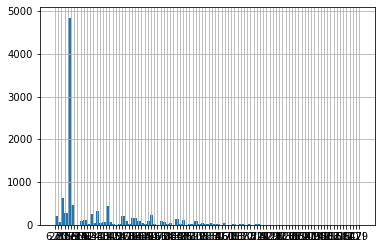

In [421]:
data.engine.hist(bins = data.engine.nunique())

In [422]:
for i in list(data[data.engine == 'other'].index):
    if len(re.findall(r'[\s\:](\d{1}\.\d{1}\sl{1})[\.\,\;\s]',str(data.loc[i,'description']).lower()))>0:
        data.loc[i,'engine'] = re.findall(r'[\s\:](\d{1}\.\d{1}\sl{1})[\.\,\;\s]',str(data.loc[i,'description']).lower())[0]
    else:
        continue

In [423]:
data[data.engine == 'other'].shape

(4791, 27)

In [424]:
data.engine.unique()

array(['6.7l', '2.3l', '2.0l', '2.5l', 'other', '3.6l', '5.8l', '7.5l',
       '5.4l', '1.6l', '6', '5.3l', '4', '2.4l', '3', '4.3l', '3.7 l',
       '3.5l', '1.4l', '3.2l', '4.5l', '0l', '5.7l', '2.7l', '4.8l',
       '6.2l', '1.8l', '1.5l', '6.4l', '4.4l', '6.6l', '3.0l', '5.6l',
       '6.7 l', '1.7l', '1.8 l', '4.6l', '6.0l', '2l', '3.3l', '304',
       '4.0l', '4.2l', '3.7l', '5.5l', '8.1l', '5.9l', '5.0l', '3.9l',
       '2', '5', '6.8l', '3.8l', '3.4l', '1', '7.6l', '4.7l', '7.0l',
       '6.1l', '1.6 l', '8', '153', '3l', '1.3l', '1.0l', '7.3l', '3.6 l',
       '7', '2.2l', '2.8l', '4l', '4.6 l', '1.2l', '5.2l', '1.9l', '2.9l',
       '2.5 l', '6.8 l', '5.7 l', '0', '2.1l', '6.3l', '3.0 l', '7.2 l',
       '2.3 l', '2.6l', '285', '6l', '272', '107', '39', '500', '5.4 l',
       '100', '4.9l', '7.4l', '191', '5.3 l', '4.8 l', '6.5 l', '3.5 l',
       '2.4 l', '2.0 l', '3.4 l', '350', '2.7 l', '5.2 l', '425', '168',
       '7.2l', '8.0l', '5.9 l', '5l', '6.5l', '8l', '64', '4.7 l

In [425]:
# Сейчас немного причешем эти значения и приведем к нужному виду.

In [426]:
for i in data[data.engine != 'other'].index:
    if data.loc[i,'engine'].find('l') != -1:
        data.loc[i, 'engine'] = data.loc[i, 'engine'][0]+'-'+ data.loc[i, 'engine'][0]+'.9 l'
        
for i in data[data.engine != 'other'].index:
    if data.loc[i,'engine'].find('l') == -1:
        data.loc[i, 'engine'] = 'other'
data.engine.unique()

array(['6-6.9 l', '2-2.9 l', 'other', '3-3.9 l', '5-5.9 l', '7-7.9 l',
       '1-1.9 l', '4-4.9 l', '0-0.9 l', '8-8.9 l'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

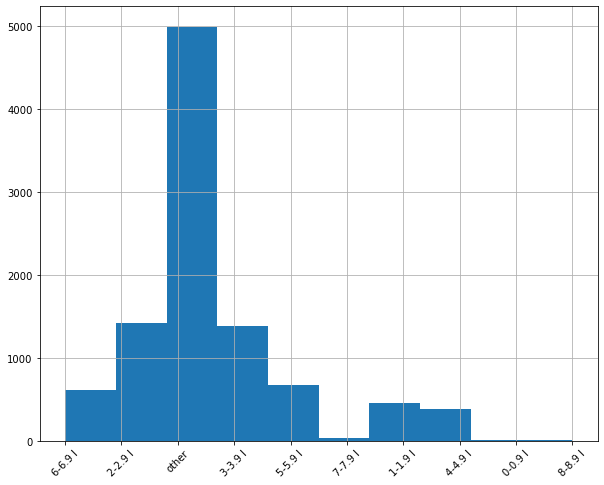

In [427]:
data.engine.hist(figsize = (10,8), bins = data.engine.nunique())
plt.xticks(rotation = 45)

In [428]:
# половину раскидали по литражу крупными интервалами. ПРименим OneHotEncoder

ohe1 = OneHotEncoder(sparse = False)
ohe1

OneHotEncoder(sparse=False)

In [429]:
ohe1.fit(data[['engine']]) 

OneHotEncoder(sparse=False)

In [430]:
ohe1_tranform_data = ohe1.transform(data[['engine']])
ohe1_tranform_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [431]:
ohelist1 = ohe1.get_feature_names_out()

In [432]:
ohelist1

array(['engine_0-0.9 l', 'engine_1-1.9 l', 'engine_2-2.9 l',
       'engine_3-3.9 l', 'engine_4-4.9 l', 'engine_5-5.9 l',
       'engine_6-6.9 l', 'engine_7-7.9 l', 'engine_8-8.9 l',
       'engine_other'], dtype=object)

In [433]:
df_ml[ohelist1] = ohe1_tranform_data.copy()

In [434]:
df_ml.head()

,price_category,short_model_-benz,short_model_1,short_model_124,short_model_128i,short_model_135i,short_model_1500,short_model_163869,short_model_1928,short_model_1951,...,engine_0-0.9 l,engine_1-1.9 l,engine_2-2.9 l,engine_3-3.9 l,engine_4-4.9 l,engine_5-5.9 l,engine_6-6.9 l,engine_7-7.9 l,engine_8-8.9 l,engine_other
0,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Вот. Добавили информацию о двигателях.

#### Interior information

А здесь сделаем очень простой параметр: есть данные об интерьере/нет данных об интерьере.

Такое решение связано с тем, что даже для двигателя, у которого вроде бы 70% инфо можно найти, удалось адекватно вытянуть лишь половину. У интерьера показатель сильно меньше. И данные там могут быть совсем разные - материал, цвет, доп.оборудование и прочее. Сделаем просто индикатор 1/0. Его не придется даже нормировать.

In [435]:
df_ml1 = df_ml.copy()
df_ml1['interior_info'] = df_ml1.apply(lambda _: 0, axis=1)
df_ml1.interior_info

0        0
1        0
2        0
3        0
4        0
        ..
10045    0
10046    0
10047    0
10048    0
10049    0
Name: interior_info, Length: 9997, dtype: int64

In [436]:
df_ml1['desc'] = data['description'].copy()

In [437]:
df_ml1.desc

0        Carvana is the safer way to buy a car During t...
1        ***Call Us for more information at: 201-635-14...
2        Carvana is the safer way to buy a car During t...
3        2013 Toyota RAV4 XLE 4dr SUV     Offered by: R...
4        2021 Nissan Altima Sv with Only 8 K Miles Titl...
                               ...                        
10045    Transmission:Automatic Exterior Color:WHITE In...
10046    2008 Jeep Wrangler X  Offered by: R&L Auto -- ...
10047    2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...
10048    2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...
10049    Carvana is the safer way to buy a car During t...
Name: desc, Length: 9997, dtype: object

In [438]:
for i in df_ml1.index:
    if df_ml1.loc[i, 'desc'].lower().find('interior') >= 0:
        df_ml1.loc[i, 'interior_info'] = 1
    else:
        df_ml1.loc[i, 'interior_info'] = 0
df_ml1.interior_info.describe()

count    9997.000000
mean        0.585876
std         0.492595
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: interior_info, dtype: float64

In [439]:
df_ml1.interior_info.value_counts()

1    5857
0    4140
Name: interior_info, dtype: int64

In [440]:
df_ml1.describe()

,short_model_-benz,short_model_1,short_model_124,short_model_128i,short_model_135i,short_model_1500,short_model_163869,short_model_1928,short_model_1951,short_model_1954,...,engine_1-1.9 l,engine_2-2.9 l,engine_3-3.9 l,engine_4-4.9 l,engine_5-5.9 l,engine_6-6.9 l,engine_7-7.9 l,engine_8-8.9 l,engine_other,interior_info
count,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,...,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,0.000100,0.001400,0.000100,0.000100,0.000200,0.020606,0.000100,0.000100,0.000100,0.000100,...,0.045514,0.142443,0.138342,0.038311,0.067620,0.062019,0.003501,0.001400,0.499450,0.585876
std,0.010002,0.037398,0.010002,0.010002,0.014144,0.142069,0.010002,0.010002,0.010002,0.010002,...,0.208438,0.349521,0.345275,0.191957,0.251106,0.241201,0.059069,0.037398,0.500025,0.492595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [441]:
print(df_ml1.columns)

Index(['price_category', 'short_model_-benz', 'short_model_1',
       'short_model_124', 'short_model_128i', 'short_model_135i',
       'short_model_1500', 'short_model_163869', 'short_model_1928',
       'short_model_1951',
       ...
       'engine_2-2.9 l', 'engine_3-3.9 l', 'engine_4-4.9 l', 'engine_5-5.9 l',
       'engine_6-6.9 l', 'engine_7-7.9 l', 'engine_8-8.9 l', 'engine_other',
       'interior_info', 'desc'],
      dtype='object', length=1510)


Пока оставим такие фичи. Если будет необходимость что-то добавить, можно будет подумать над paying_info, и датой/временем размещения объявления. Но сейчас это кажется не настолько важным, попробуем построить модели на имеющихся данных, которых уже очень немало.

In [442]:
df = df_ml1.drop(['desc'],axis = 1)

In [443]:
df.to_csv('data/prepared_df_for_ml.csv')

# Modeling

## MLP Classifier

### Параметры по умолчанию

Подготовленный датафрейм - df. Разбиваем выборку на х, у, тестовую и тренировочную выборки:

In [444]:
x = df.drop(['price_category'], axis=1)
y = df['price_category']

In [445]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state = 7)

In [446]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((6997, 1508), (3000, 1508), (6997,), (3000,))

In [447]:
mlp = MLPClassifier(random_state = 7)
mlp.fit(train_x, train_y)

MLPClassifier(random_state=7)

In [448]:
pred_mlp = mlp.predict(test_x)
accuracy_score(test_y, pred_mlp)

0.786

In [449]:
pred_mlp_train = mlp.predict(train_x)
accuracy_score(train_y, pred_mlp_train)

1.0

### Тюнинг модели

In [450]:
mlp = MLPClassifier(random_state = 7, hidden_layer_sizes =  (100, 100))

In [451]:
mlp.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=7)

In [452]:
pred_mlp = mlp.predict(test_x)
accuracy_score(test_y, pred_mlp)

0.7903333333333333

In [453]:
pred_mlp_train = mlp.predict(train_x)
accuracy_score(train_y, pred_mlp_train)

1.0

In [454]:
# ну увеличили точность до 79% - на полпроцента с помощью 100 внутренних слоев. Попробуем еще немного потюнить, вдруг получится.

In [455]:
mlp1 = MLPClassifier(random_state = 7, learning_rate = 'invscaling', hidden_layer_sizes=(100, 100), epsilon = 1e-9)

In [456]:
mlp1.fit(train_x, train_y)

MLPClassifier(epsilon=1e-09, hidden_layer_sizes=(100, 100),
              learning_rate='invscaling', random_state=7)

In [457]:
pred_mlp1 = mlp1.predict(test_x)
accuracy_score(test_y, pred_mlp1)

0.7936666666666666

In [458]:
mlp1 = MLPClassifier(random_state = 7,  hidden_layer_sizes=(100, 100), batch_size=100)

In [459]:
mlp1.fit(train_x, train_y)

MLPClassifier(batch_size=100, hidden_layer_sizes=(100, 100), random_state=7)

In [460]:
pred_mlp1 = mlp1.predict(test_x)
accuracy_score(test_y, pred_mlp1)

0.793

Вот такой тюнинг приблизил нас к 80%! (еще немного попробуем вывести повыше)

In [461]:
mlp2 = MLPClassifier(random_state = 7,  hidden_layer_sizes=(100, 100), batch_size=50)
mlp2.fit(train_x, train_y)

MLPClassifier(batch_size=50, hidden_layer_sizes=(100, 100), random_state=7)

In [462]:
pred_mlp2 = mlp2.predict(test_x)
accuracy_score(test_y, pred_mlp2)

0.799

Оценка почти 80% при таких параметрах вышла.

In [467]:
mlp3 = MLPClassifier(random_state = 7,  hidden_layer_sizes=(110, 110), batch_size=50)
mlp3.fit(train_x, train_y)

MLPClassifier(batch_size=50, hidden_layer_sizes=(110, 110), random_state=7)

In [468]:
pred_mlp3 = mlp3.predict(test_x)
accuracy_score(test_y, pred_mlp3)

0.8046666666666666

Думаю, на этом остановимся с MLPClassifier.

In [469]:
confusion_matrix(test_y, pred_mlp3)

array([[907,   9, 133],
       [ 20, 776, 157],
       [111, 156, 731]], dtype=int64)

Модель многослойного персептрона показывает точность 80,46% на тестовой выборке. Кросс-валидацию проведем ниже после построения остальных моделей ML

## RandomForest

### Параметры по умолчанию

In [470]:
rf_clf = RandomForestClassifier(random_state = 7)

In [471]:
rf_clf.fit(train_x, train_y)

RandomForestClassifier(random_state=7)

In [472]:
rf_clf_predict = rf_clf.predict(test_x)
accuracy_score(test_y, rf_clf_predict)

0.803

RandomForest на обычных параметрах отрабатывает почти не хуже тюнингованного персептрона... Посмотрим, что будет если случайный лес еще потюнить

In [473]:
rf_clf_predict_train = rf_clf.predict(train_x)
accuracy_score(train_y, rf_clf_predict_train)

1.0

In [887]:
# Проверили тренировочную выборку. На ней, как и ожидалось, все хорошо предсказывает

### Тюнинг модели

In [474]:
rf_clf1 = RandomForestClassifier(random_state = 7, n_estimators = 500)

In [475]:
rf_clf1.fit(train_x, train_y)

RandomForestClassifier(n_estimators=500, random_state=7)

In [476]:
rf_clf_predict1 = rf_clf1.predict(test_x)
accuracy_score(test_y, rf_clf_predict1)

0.8053333333333333

In [891]:
# немного выгадали за счет 500 деревьев. Еще попробуем.

In [477]:
rf_clf1 = RandomForestClassifier(random_state = 7, n_estimators = 500, bootstrap = False)

In [478]:
rf_clf1.fit(train_x, train_y)

RandomForestClassifier(bootstrap=False, n_estimators=500, random_state=7)

In [479]:
rf_clf_predict1 = rf_clf1.predict(test_x)
accuracy_score(test_y, rf_clf_predict1)

0.813

Добились 81.3%. Попытки изменить параметры как-то еще более высокой точности не дадут (проверила). Оставим так.

In [485]:
rf_clf_predict_train1 = rf_clf1.predict(train_x)
accuracy_score(train_y, rf_clf_predict_train1)

1.0

In [486]:
confusion_matrix(test_y, rf_clf_predict1)

array([[915,  20, 114],
       [ 10, 823, 120],
       [122, 175, 701]], dtype=int64)

Остановимся на этом, случайный лес дал точность на тестовой выборке 81,3%

## LogisticRegression

### Параметры по умолчанию

In [487]:
logreg = LogisticRegression(random_state=7, max_iter = 500)

In [488]:
logreg.fit(train_x, train_y)

LogisticRegression(max_iter=500, random_state=7)

In [489]:
lr_predict = logreg.predict(test_x)
accuracy_score(test_y,lr_predict)

0.7716666666666666

In [490]:
lr_predict_train = logreg.predict(train_x)
accuracy_score(train_y,lr_predict_train)

0.8683721594969273

In [491]:
# на тренировочной выборке показывает 86,8%, на тестовой 77,2%. Попробуем усилить.

### Тюнинг модели

In [499]:
logreg1 = LogisticRegression(random_state=7, max_iter = 1000, C = 10)
logreg1.fit(train_x, train_y)

LogisticRegression(C=10, max_iter=1000, random_state=7)

In [500]:
lr_predict1 = logreg1.predict(test_x)
accuracy_score(test_y,lr_predict1)

0.7756666666666666

In [501]:
lr_predict_train1 = logreg1.predict(train_x)
accuracy_score(train_y,lr_predict_train1)

0.8993854509075317

In [495]:
# Стало получше - почти 90% на тренировочной и 77,5% на тестовой, попробуем еще немного вытащить точность повыше.

Для логистической регрессии пока остановимся на этом. Тестовая выборка 77,56%, тренировочная 89,93%

# Evaluation

## Cross-validation

### Многослойный персептрон:

In [502]:
cross_val_score(mlp3, x, y, cv = 4)

array([0.8016    , 0.80832333, 0.81392557, 0.81112445])

In [504]:
cross_val_mlp = [0.8016, 0.80832333, 0.81392557, 0.81112445] #сохраним в переменную

In [505]:
print('Средний accuracy score: ', numpy.mean(cross_val_mlp))
print('Среднеквадратичное отклонение accuracy score: ', numpy.std(cross_val_mlp))

Средний accuracy score:  0.8087433374999999
Среднеквадратичное отклонение accuracy score:  0.004575175061149987


### Случайный лес:

In [506]:
cross_val_rf = cross_val_score(rf_clf1, x, y, cv = 4)
cross_val_rf

array([0.8028    , 0.81512605, 0.81672669, 0.80952381])

In [507]:
print('Средний accuracy score: ', numpy.mean(cross_val_rf))
print('Среднеквадратичное отклонение accuracy score: ', numpy.std(cross_val_rf))

Средний accuracy score:  0.8110441376550619
Среднеквадратичное отклонение accuracy score:  0.005459638815046987


### Логистическая регрессия

In [508]:
cross_val_lr = cross_val_score(logreg1, x, y, cv = 4)
cross_val_lr

array([0.7776    , 0.77871148, 0.7795118 , 0.77871148])

In [509]:
print('Средний accuracy score: ', numpy.mean(cross_val_lr))
print('Среднеквадратичное отклонение accuracy score: ', numpy.std(cross_val_lr))

Средний accuracy score:  0.778633693477391
Среднеквадратичное отклонение accuracy score:  0.0006803867426894363


## Выбор лучшей модели

По итогам кросс-валидации видим, что переобучения моделей нет, они на всех фолдах показывают эффективность с небольшим отклонением от среднего. Лучшие результаты (прогнозирования) показал RandomTree.

Обучать на полных данных будем случайный лес.

## Обучение выбранной модели на полном датасете:

In [510]:
rf_clf1.fit(x, y)

RandomForestClassifier(bootstrap=False, n_estimators=500, random_state=7)

In [511]:
filename = 'finalmodel.pickle'

In [512]:
with open(filename, 'wb') as file:
    pickle.dump(rf_clf1, file)